# Estimate S using wf simulations

In [75]:
##wf simulations to just produce s values (not f1, f2), can input multiple ne values with multiple generations
wfs_bs_simp=function(x, ne=c(598), gen=1, smin=-1, smax=1){
    ##determine direction of maf change  to determine outliers
    f2s=replicate(100, mapply(wfs_byf1_variablene_s,  x[,2], MoreArgs = list(gen=gen, ne=ne, h=0.5, smin=-1, smax=1)))
    f2s=as.data.frame(f2s)
    snp=x[1,1]
    f2s$SNP=snp
    out=f2s
return(out)

}

# gen: the number of generations to simulate
# ne: the effective population size (in number of alleles) for each sampled generation; length(n) == gen
wfs_byf1_variablene_s <- function(f1=0.5, gen=2, ne=c(1000,10), h=0.5, smin=-1, smax=1){ 
#using bootstrapped values as f1 and f2. comparing f2 to simulated f2s. 
	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
    ##for some reason angsd gave some bootstrapped f1s that are > 1...so round to 1. 
    if(f1>1) f1=round(f1)
	#print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,ne[i],x)/ne[i]
		#print(paste(x,p))
	}
	f2 <- p
	
	# return values
	out = c(f1,f2, s)
        return(out)
}


In [76]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #order by closest values
        simfull$diff=abs(simfull$V1 - f2bs)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull[1:1000, 4] + 1
    }
    out=simfull
return(out)
}


In [24]:
#only need to do this for significant snps
comPvaluesChrNJNY50sig_out=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv", row.names=1)

In [25]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NJNY50_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs")
nj_files = list.files( pattern="NJ_")
NJ=lapply(nj_files, read.table, header=T)

In [26]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NYUnoout_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs/")
ny_files = list.files( pattern="NY_")
NY=lapply(ny_files, read.table, header=T)

In [27]:
NJ_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NJ)
NY_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NJ)

In [ ]:
lapply(NJ, `[`, 2, )

In [77]:
NJ_f2s=lapply(NJ_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NJ_f2s=lapply(NJ_f2s, t)
NJ_f2s=lapply(NJ_f2s, as.data.frame)
tNJ_f2s=lapply(NJ_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [ ]:
lapply(tNJ_f2s, `[`, 2, )

In [78]:
#f1s and simulated f2s for 2056629
head(tNJ_f2s[12])

,V1,V2,V3,SNP
V1,0.999997,1,-0.02842389,2056629
V2,0.999995,1,-0.75065952,2056629
V3,0.999995,1,-0.29574076,2056629
V4,0.999992,1,-0.42299062,2056629
V5,0.999997,1,-0.13569708,2056629
V6,0.999998,1,-0.89454791,2056629
V7,0.999998,1,-0.49472481,2056629
V8,0.999997,1,0.46124743,2056629
V9,0.999999,1,0.86374740,2056629
V10,0.999997,1,-0.62135839,2056629


In [79]:
#simulated f2s for SNp 11932
head(tNJ_f2s[1])

,V1,V2,V3,SNP
V1,4e-06,0,-0.23266918,11932
V2,4e-06,0,0.67801423,11932
V3,5e-06,0,-0.15516773,11932
V4,4e-06,0,0.71171341,11932
V5,5e-06,0,-0.65375312,11932
V6,6e-06,0,0.74752390,11932
V7,4e-06,0,-0.16850490,11932
V8,5e-06,0,-0.42706253,11932
V9,6e-06,0,-0.35359535,11932
V10,6e-06,0,-0.32297757,11932


In [29]:
NY_f2s=lapply(NY_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [30]:
#Add count column and count up number of times a simulated f2 is in the top 1k closest to a given bootstrapped f2. 
NY_f2scount=mapply(wfs_bs_s_count, NY_sig, tNY_f2s, SIMPLIFY=FALSE)
NJ_f2scount=mapply(wfs_bs_s_count, NJ_sig, tNJ_f2s, SIMPLIFY=FALSE)

In [16]:
#sample based on count data produced to get 1000 s values 
sNJ=lapply(NJ_f2scount, function(x){sample(x$V2, 1000, replace = FALSE, prob = x$count)})
sNY=lapply(NY_f2scount, function(x){sample(x$V2, 1000, replace = FALSE, prob = x$count)})

Doesnt work when f1 is 0 or 1. 

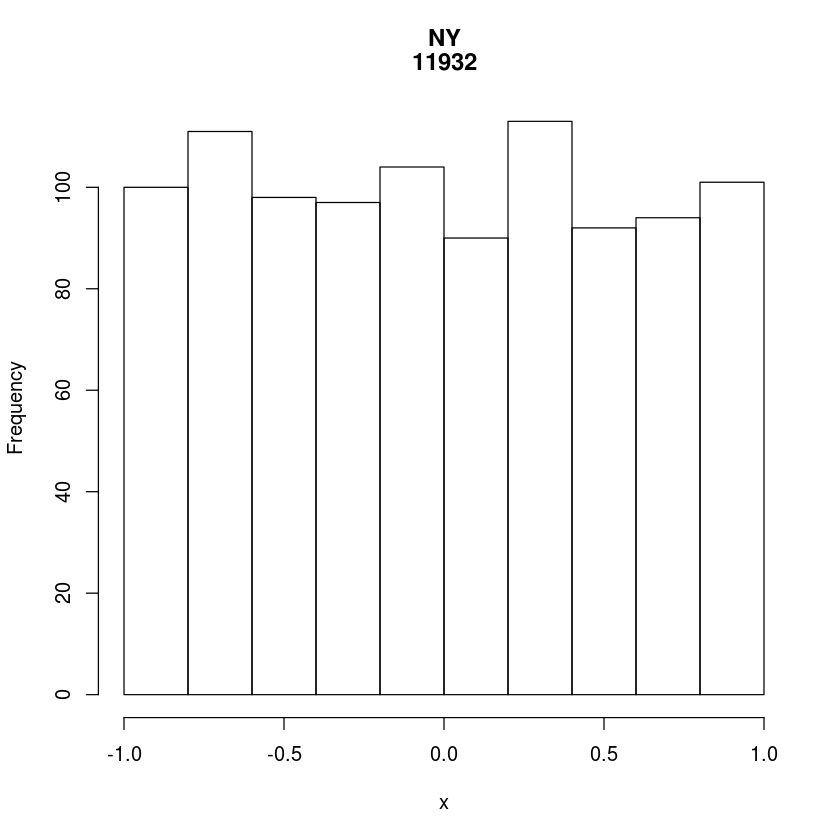

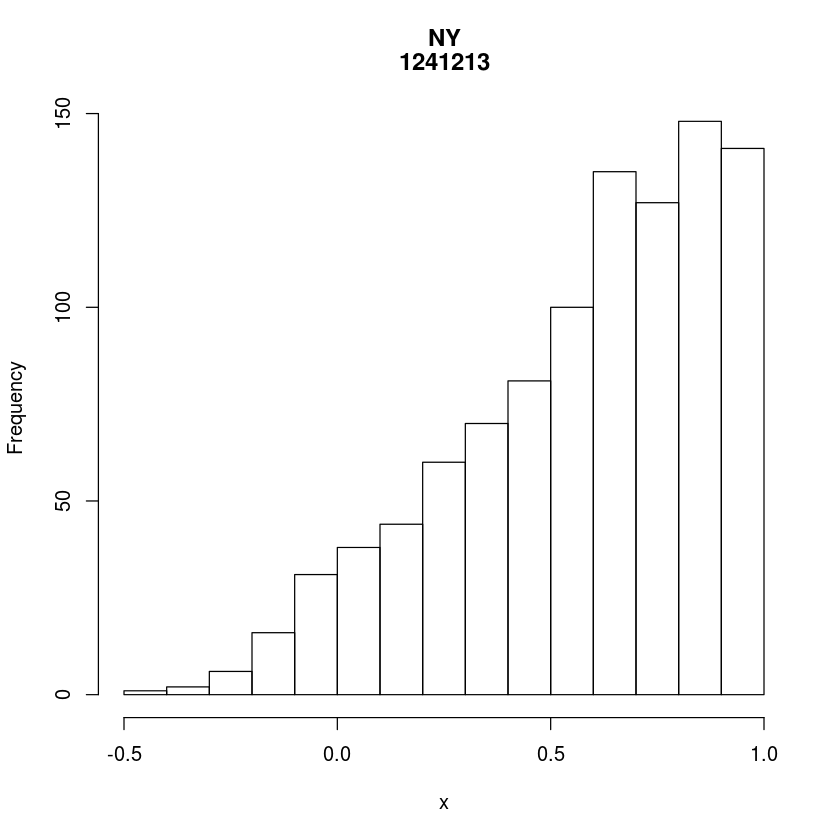

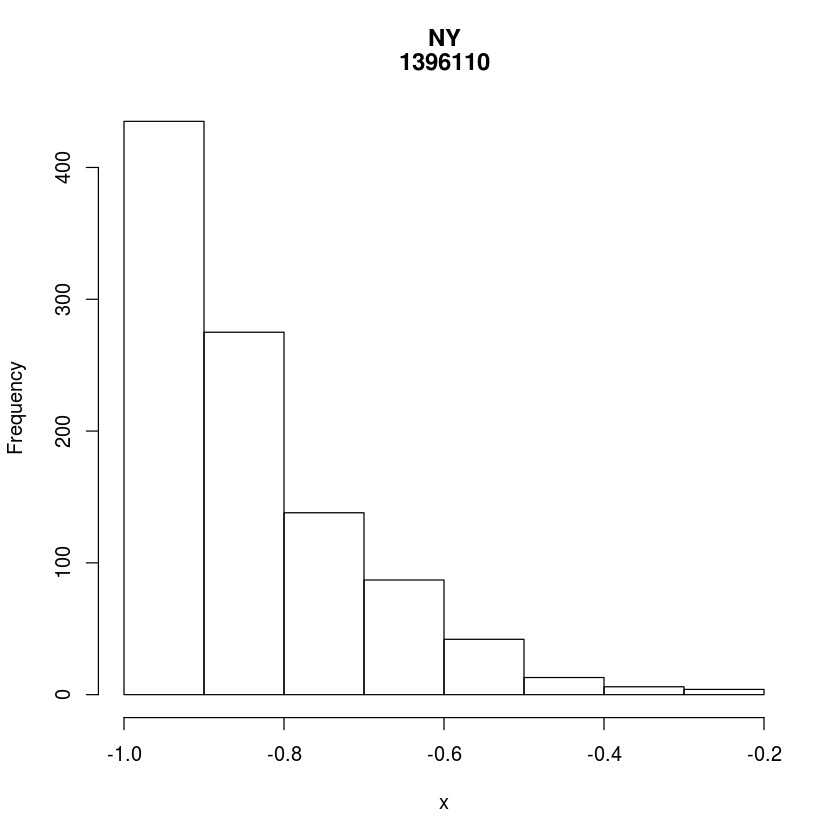

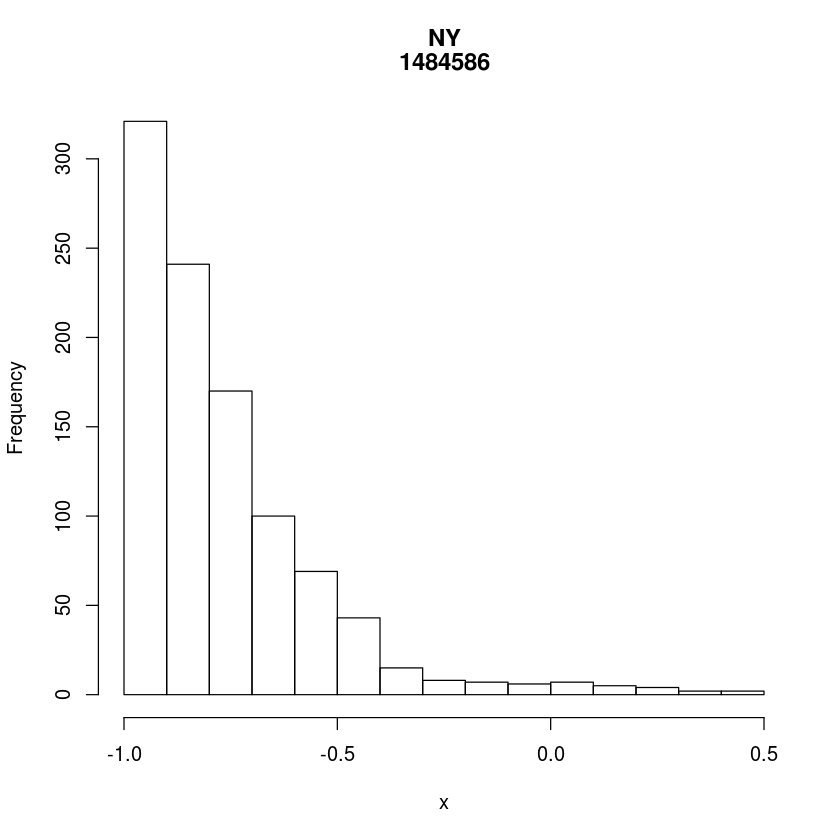

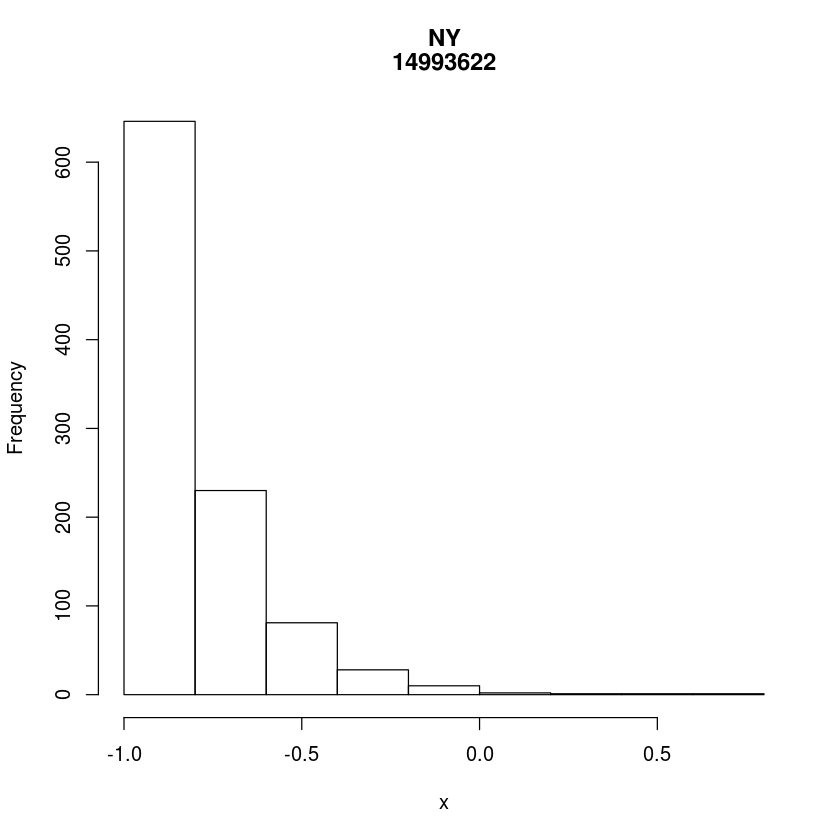

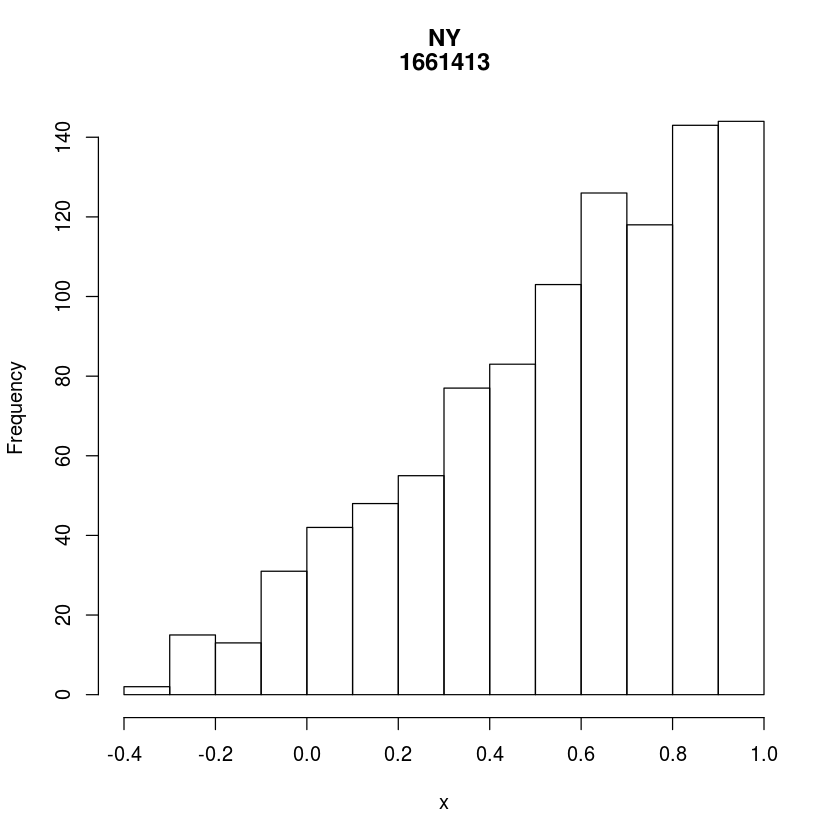

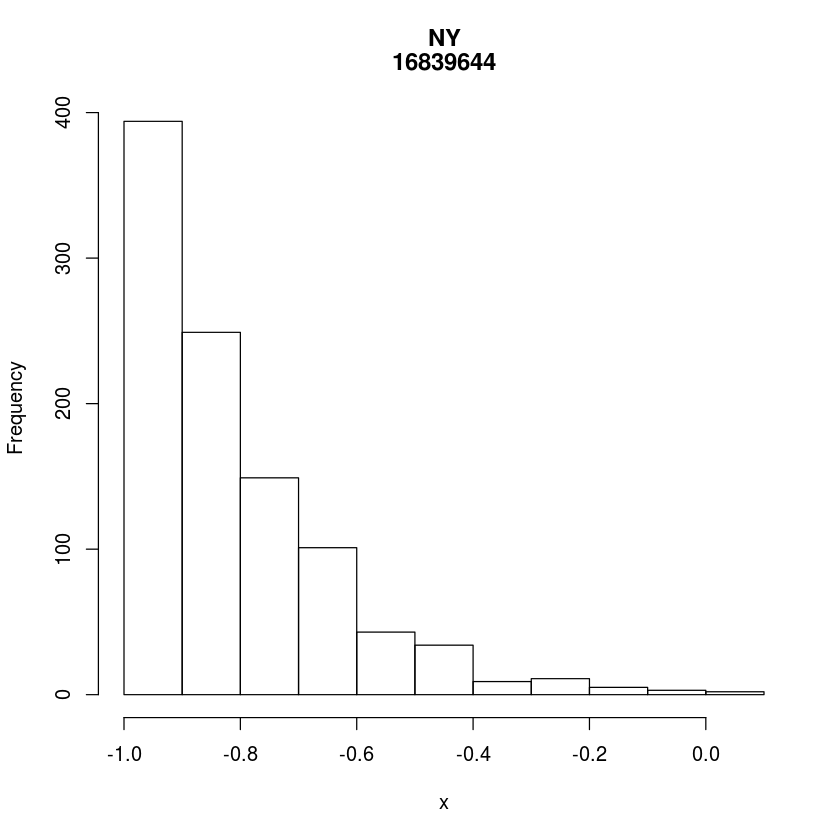

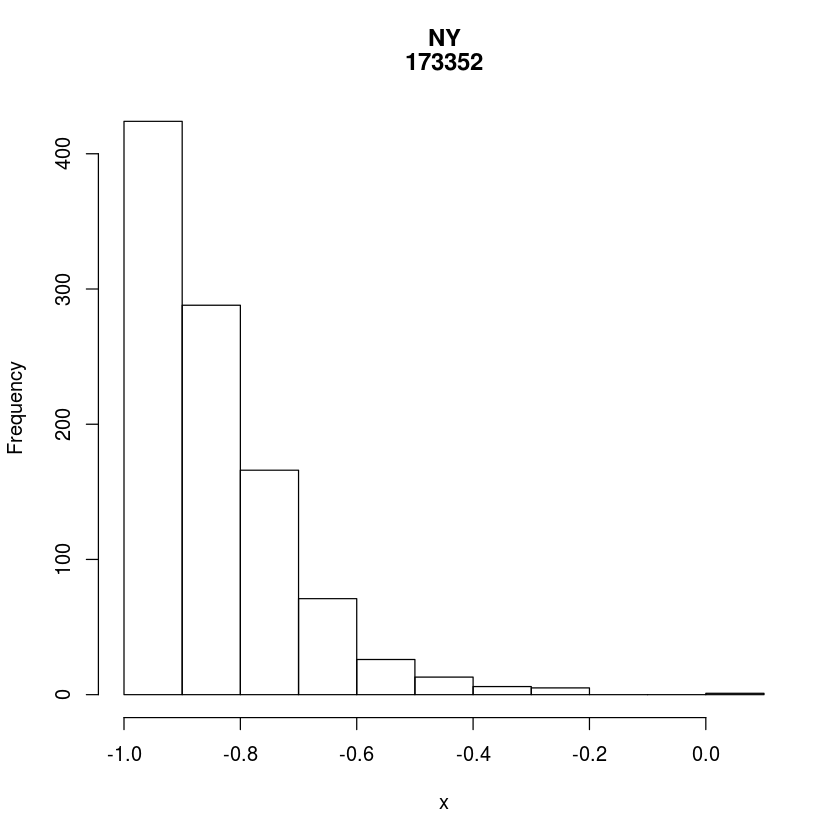

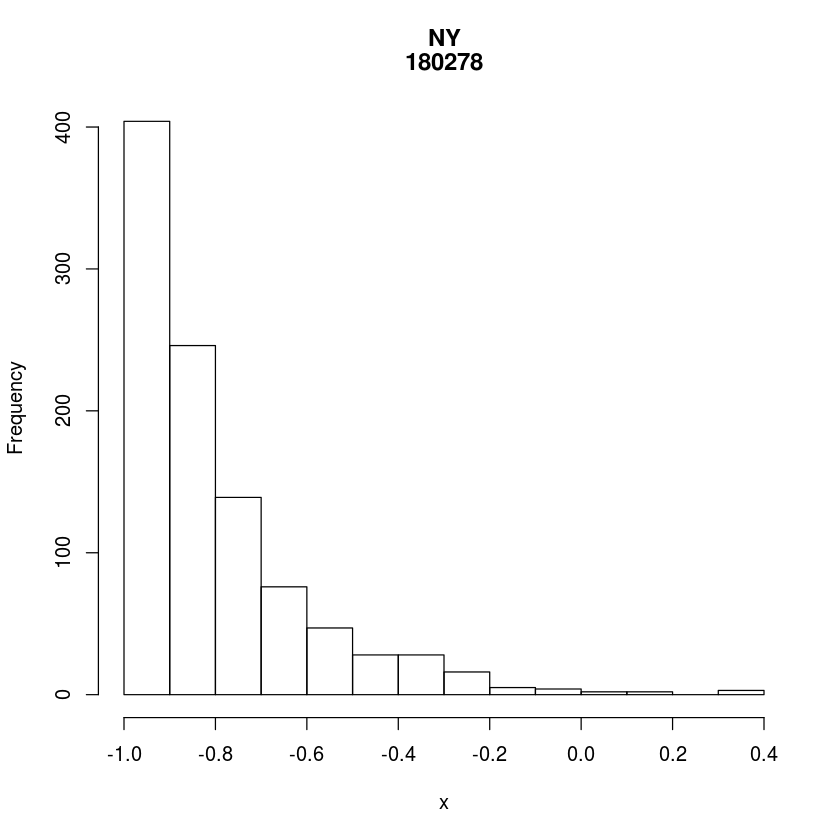

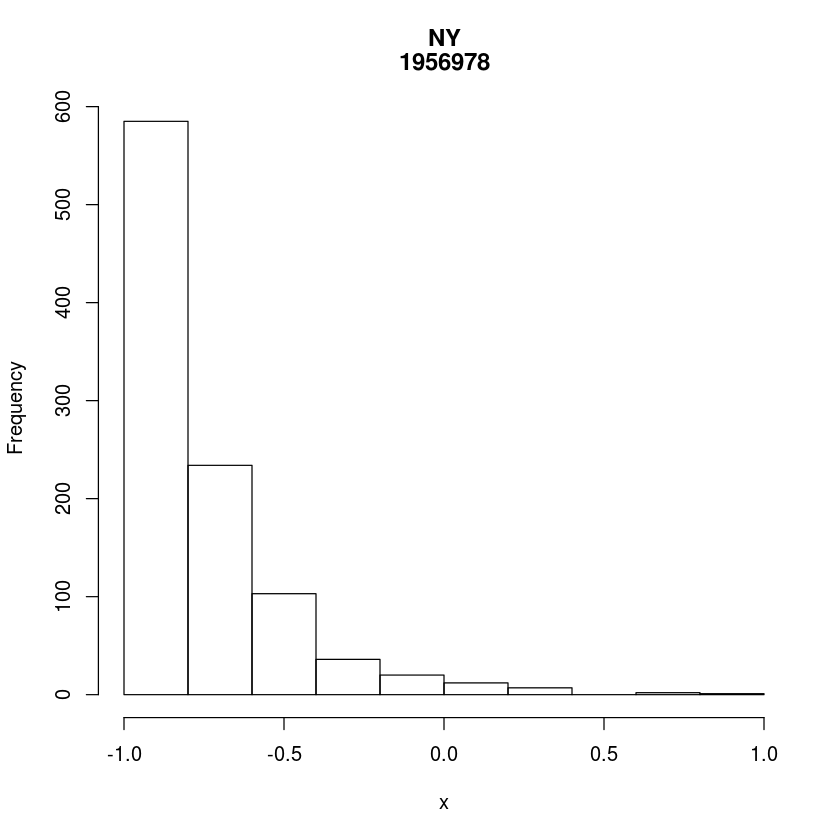

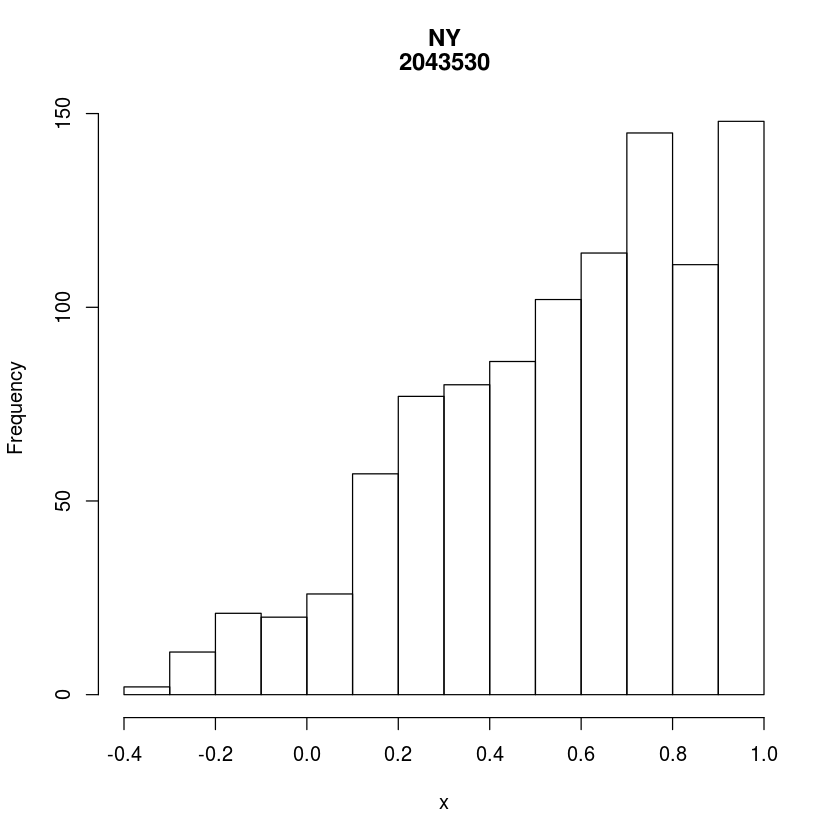

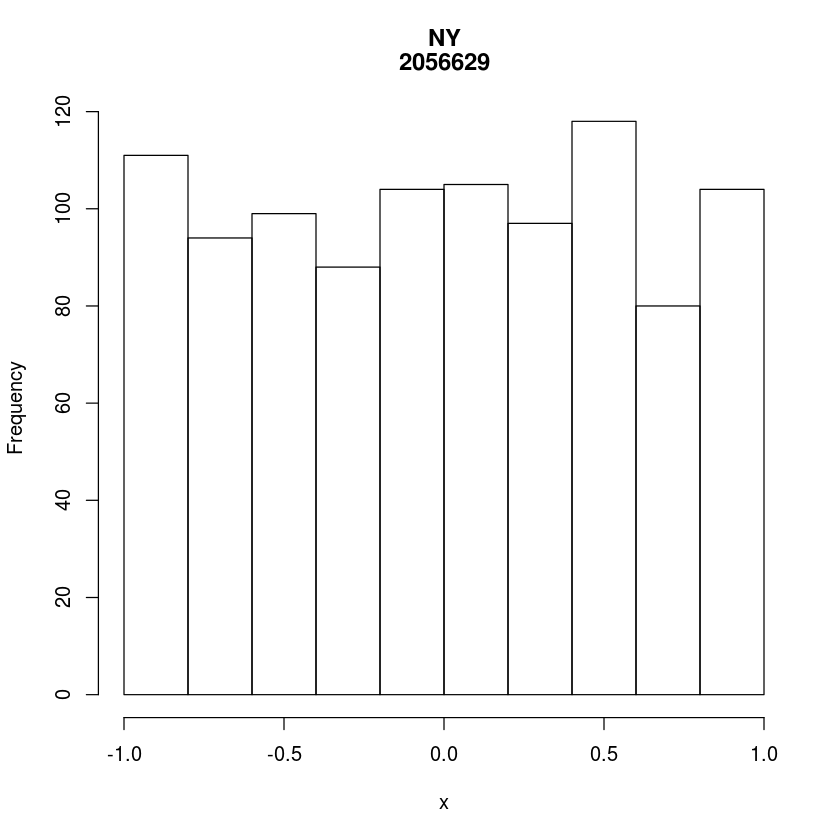

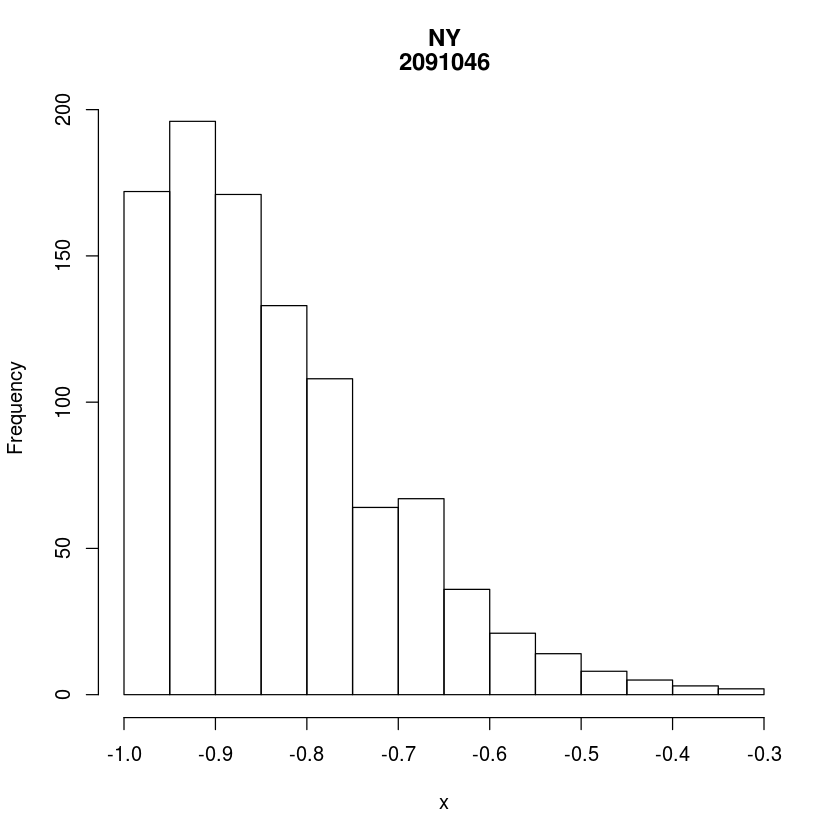

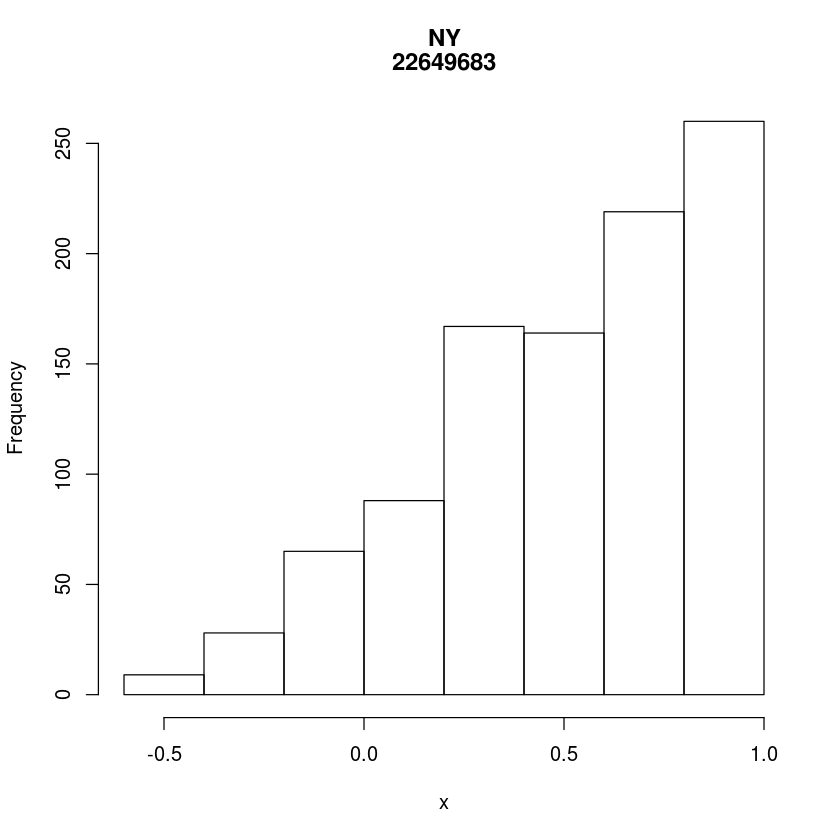

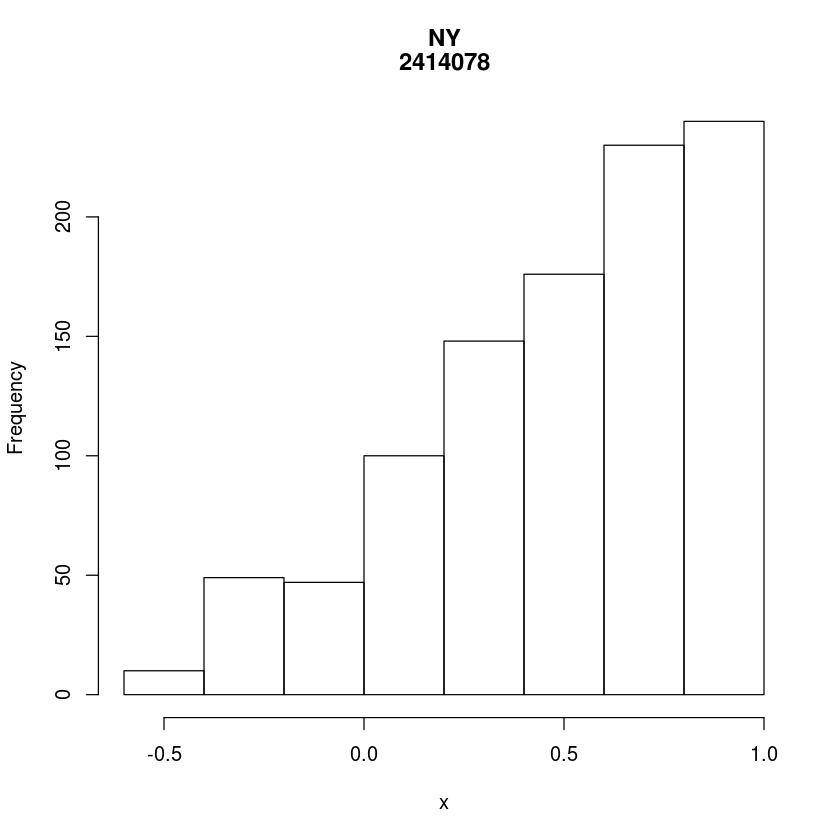

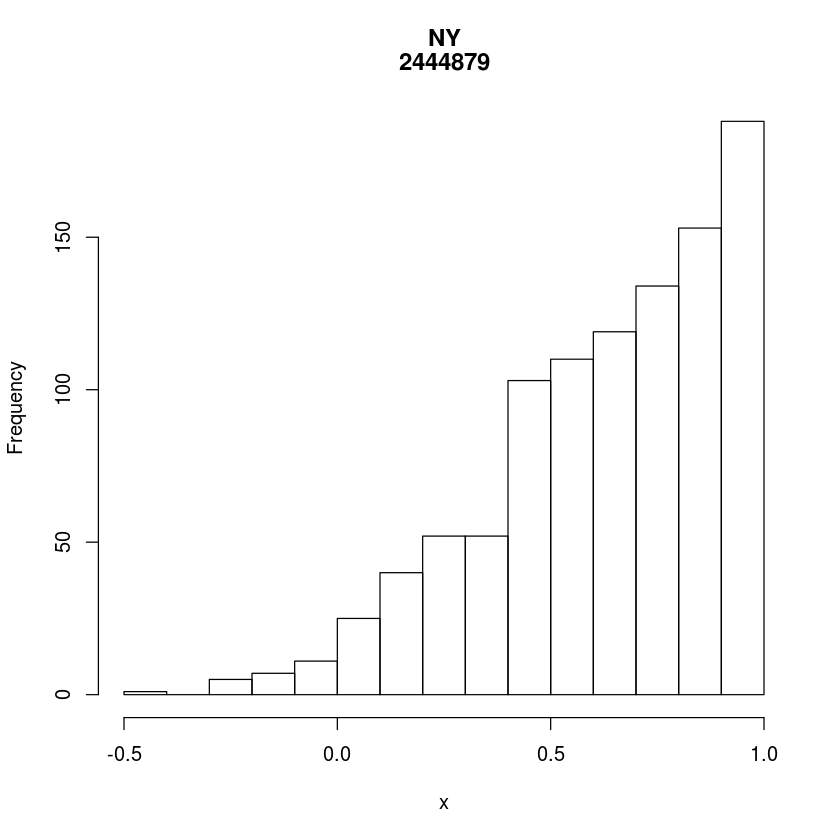

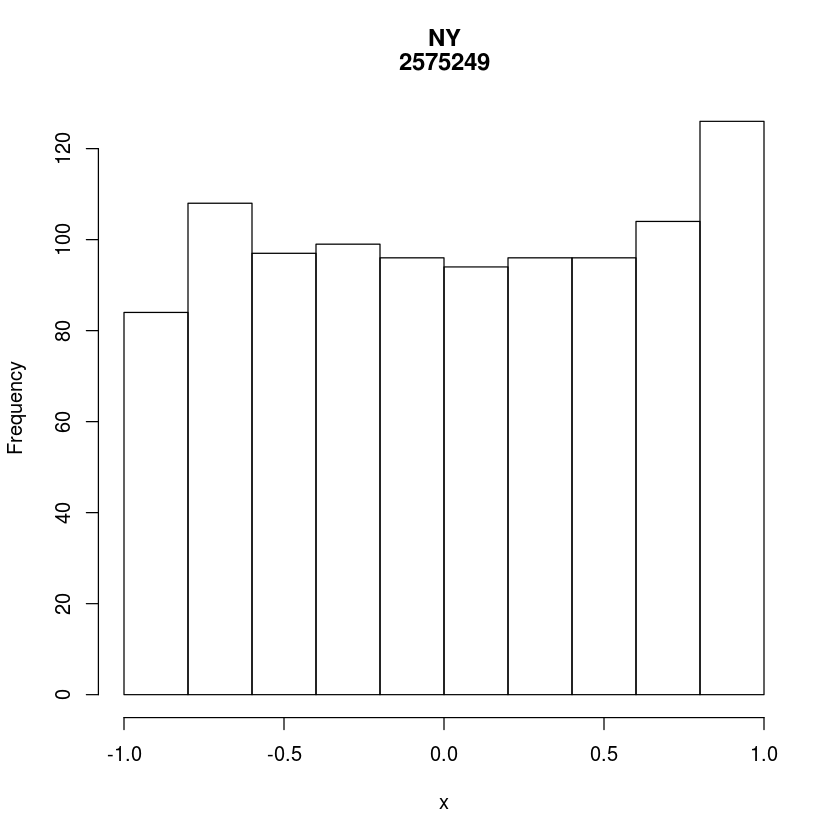

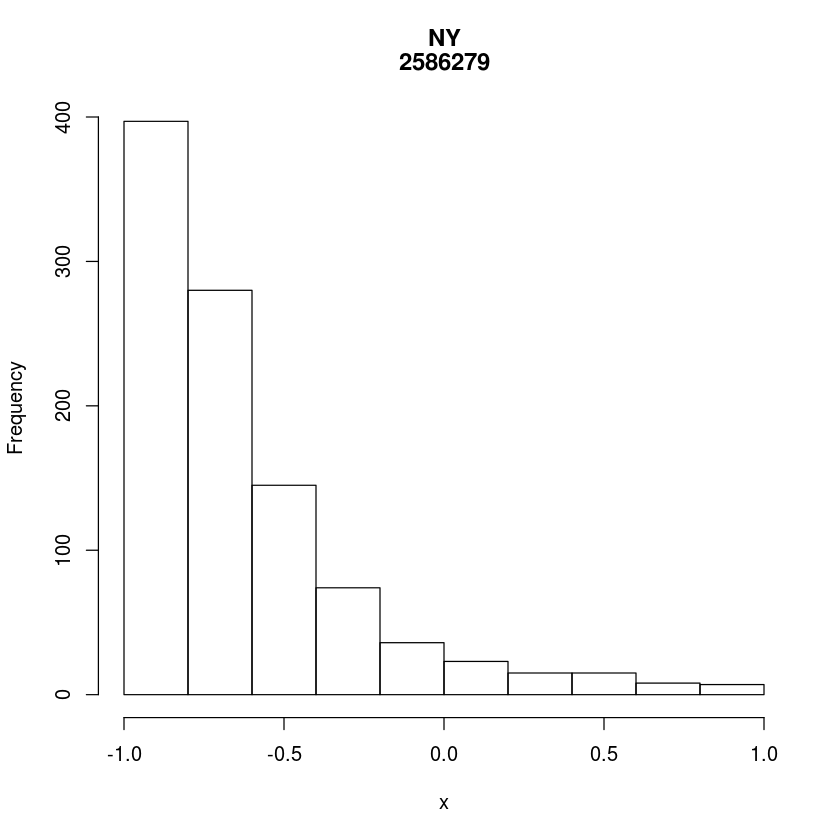

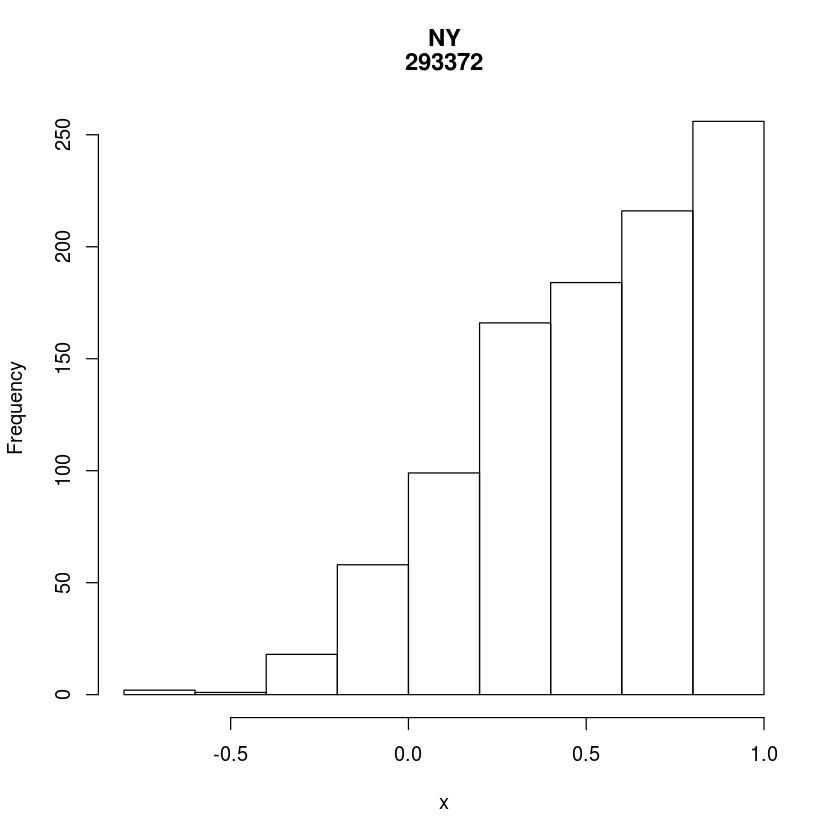

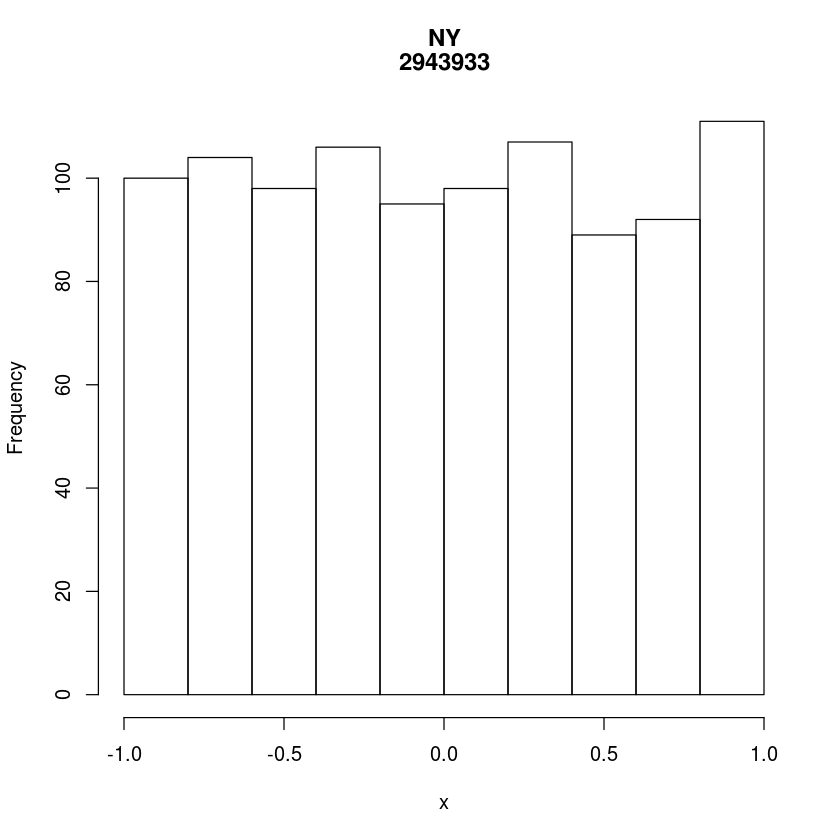

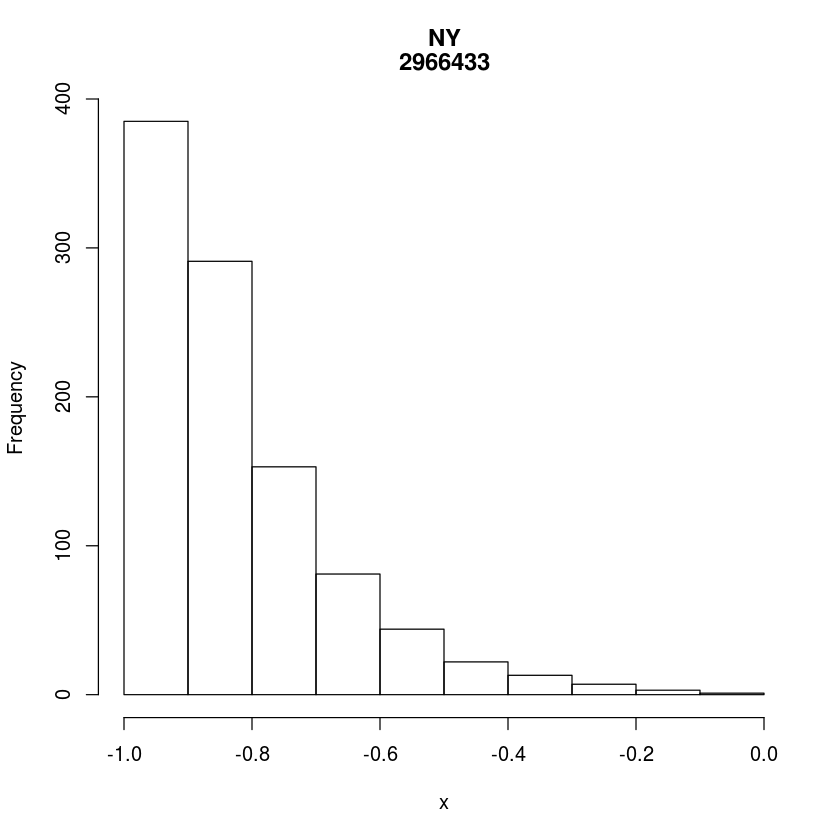

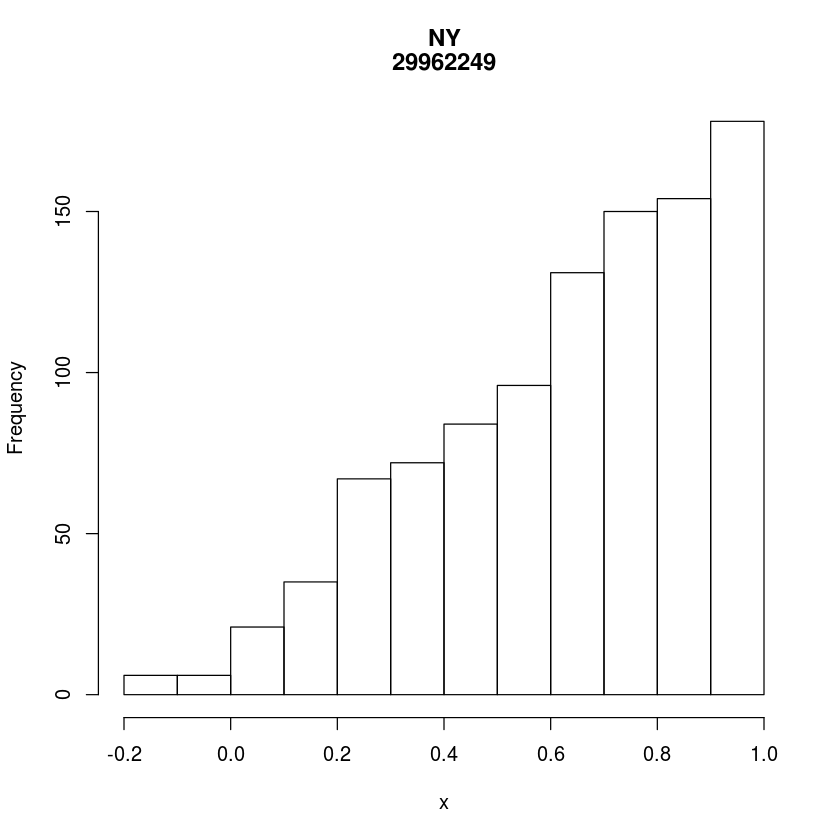

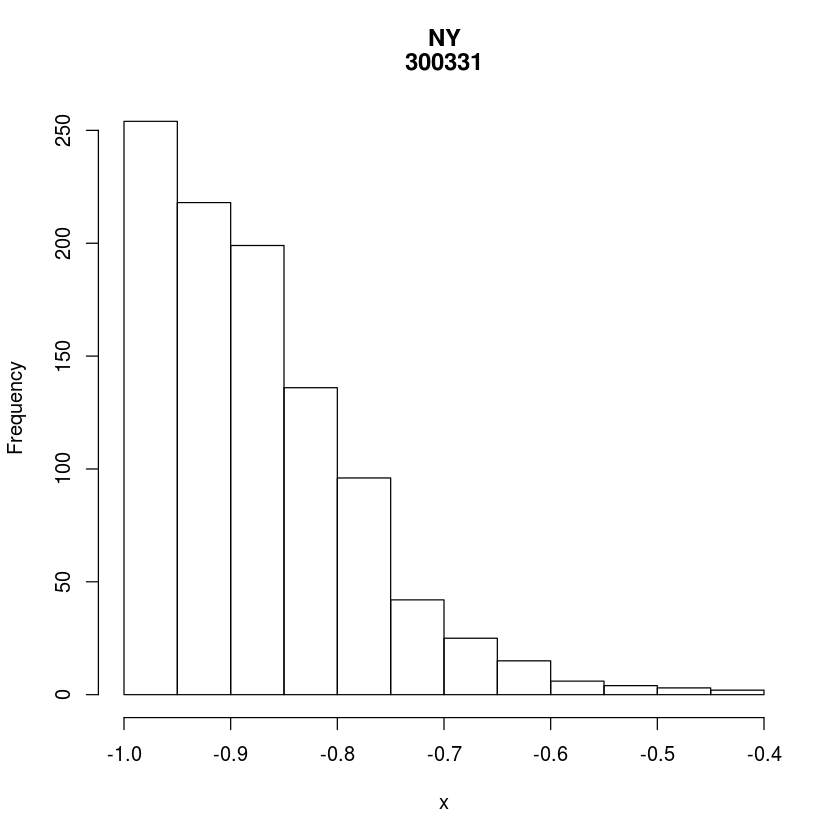

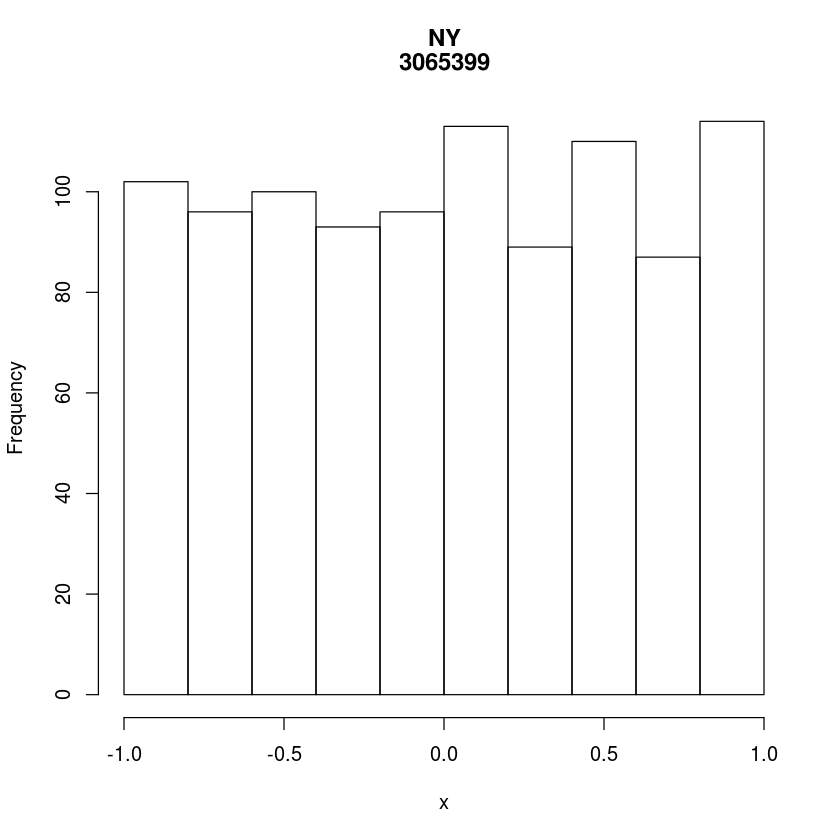

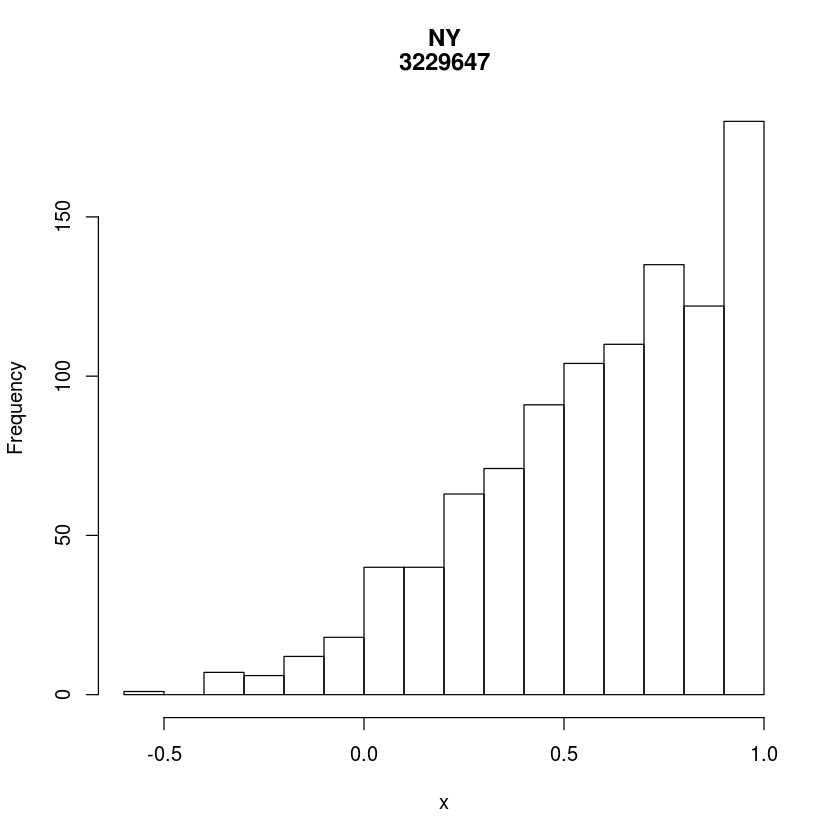

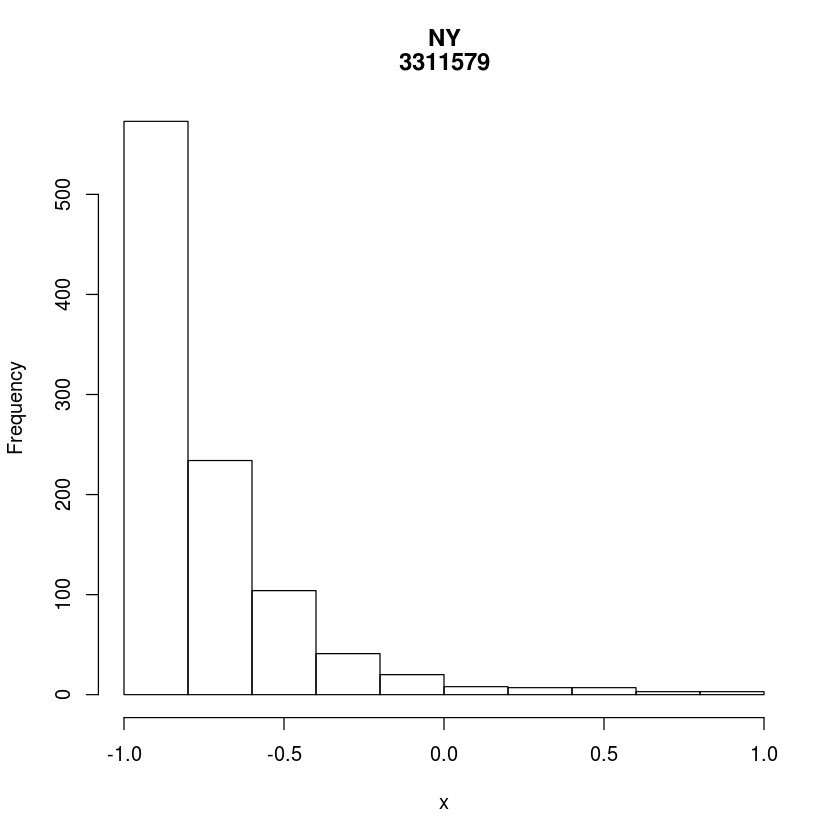

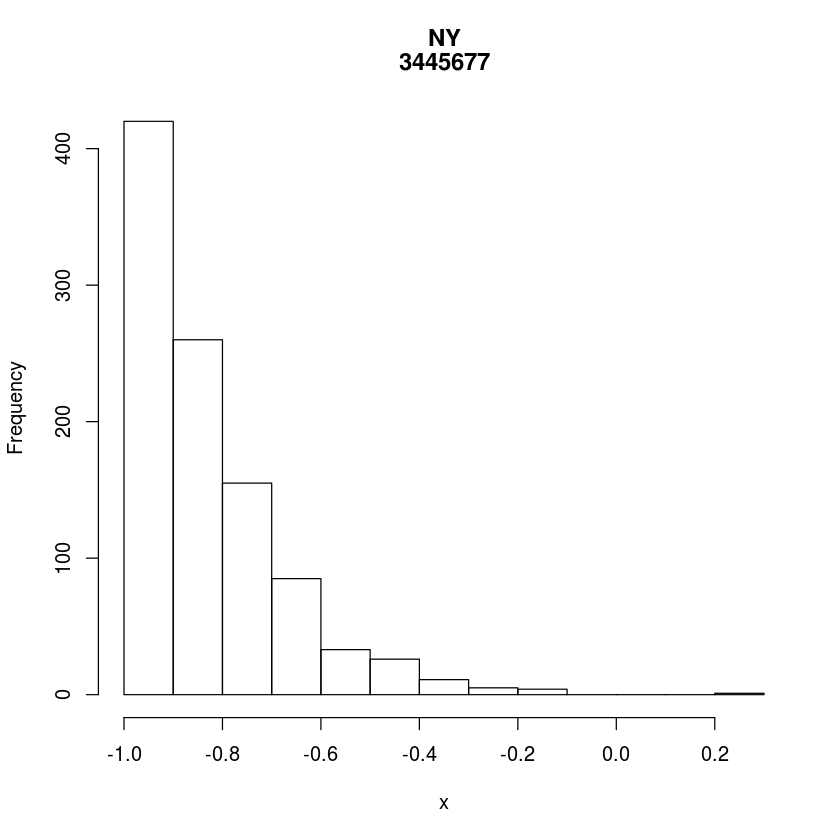

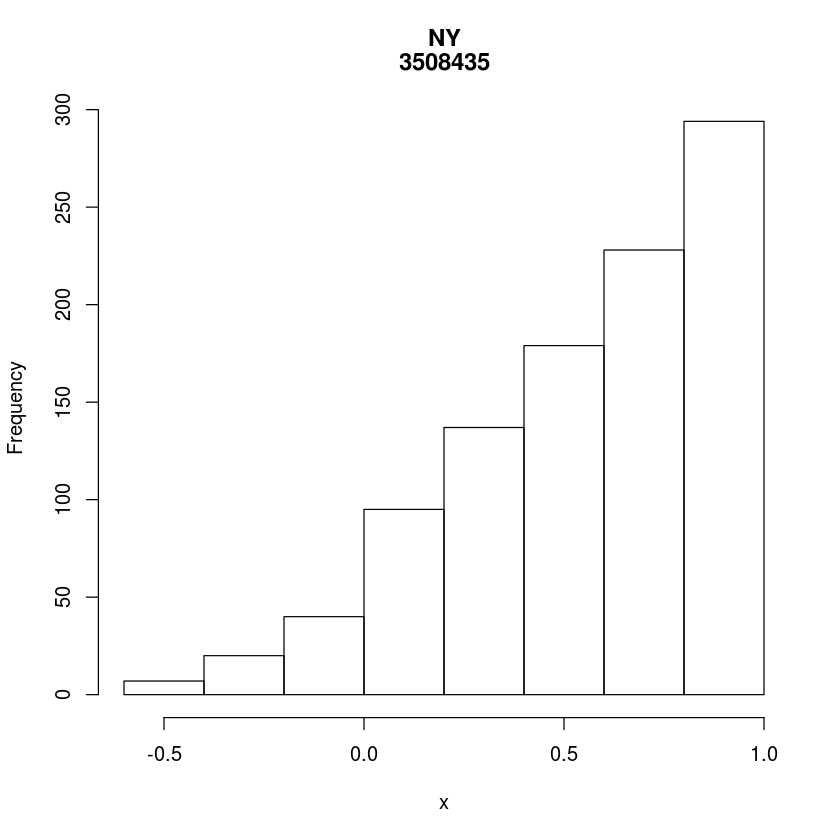

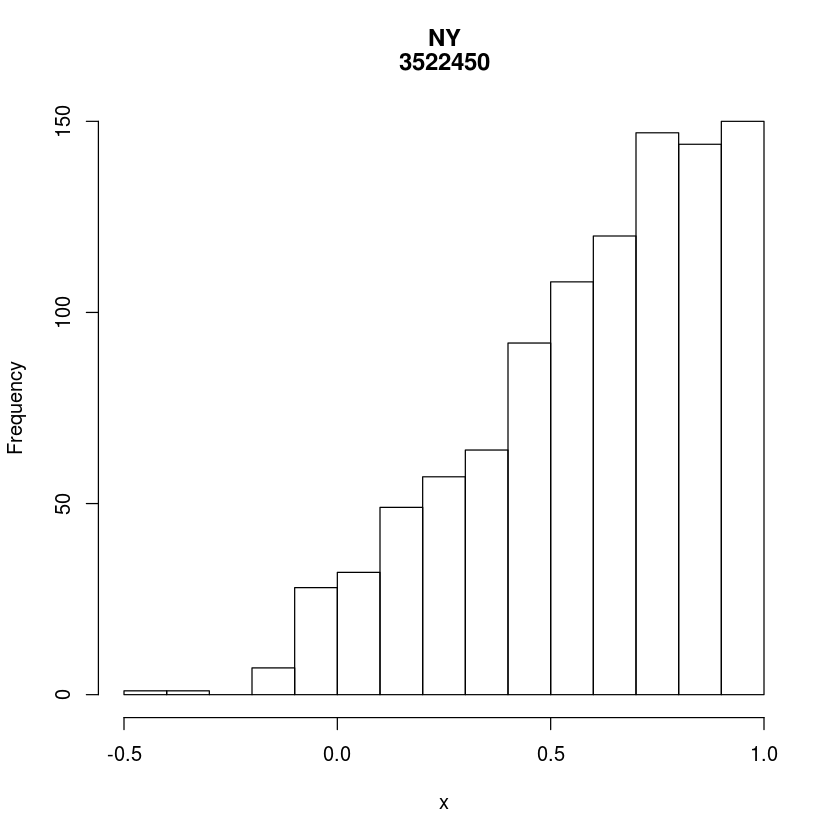

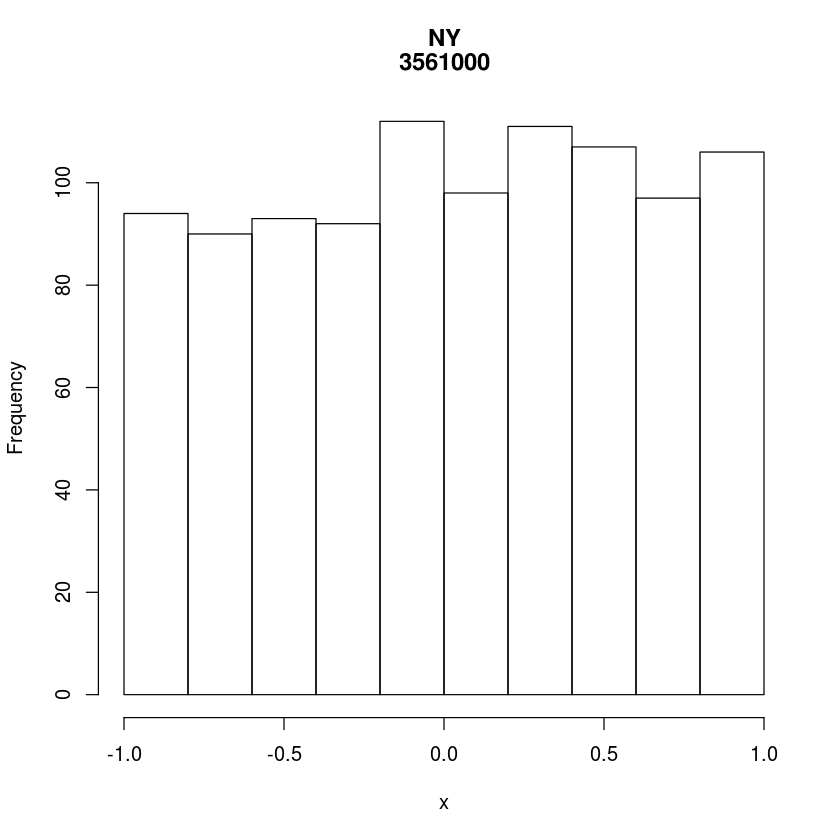

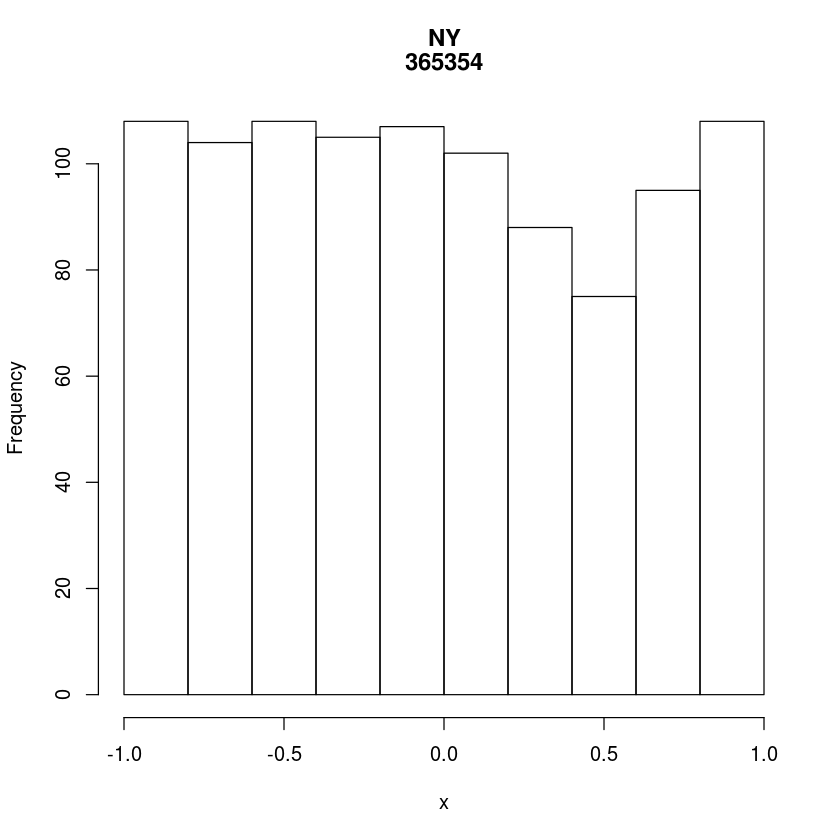

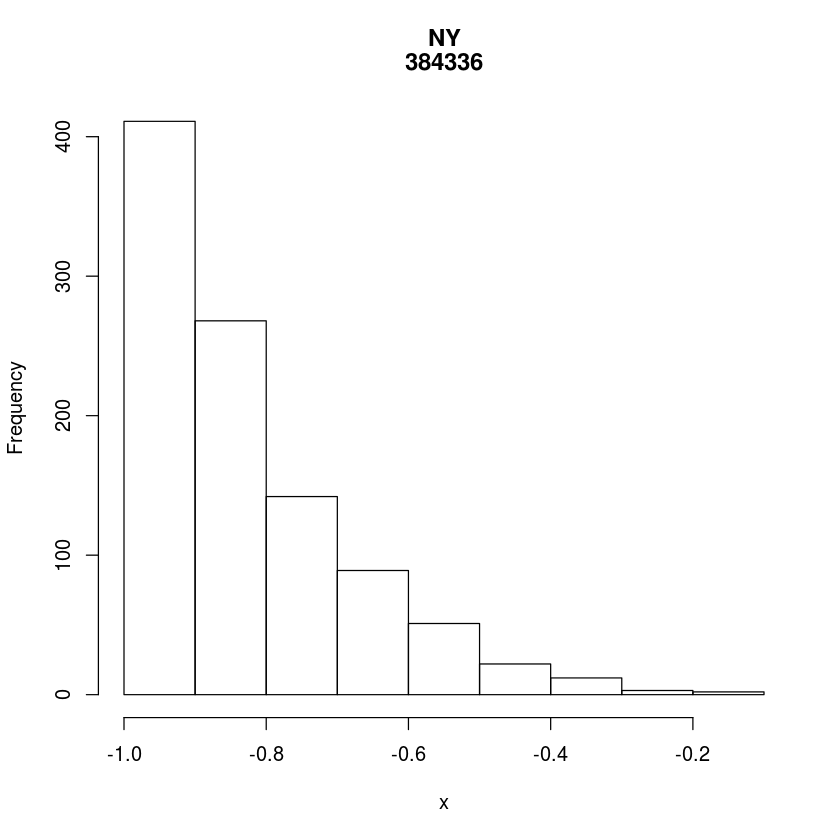

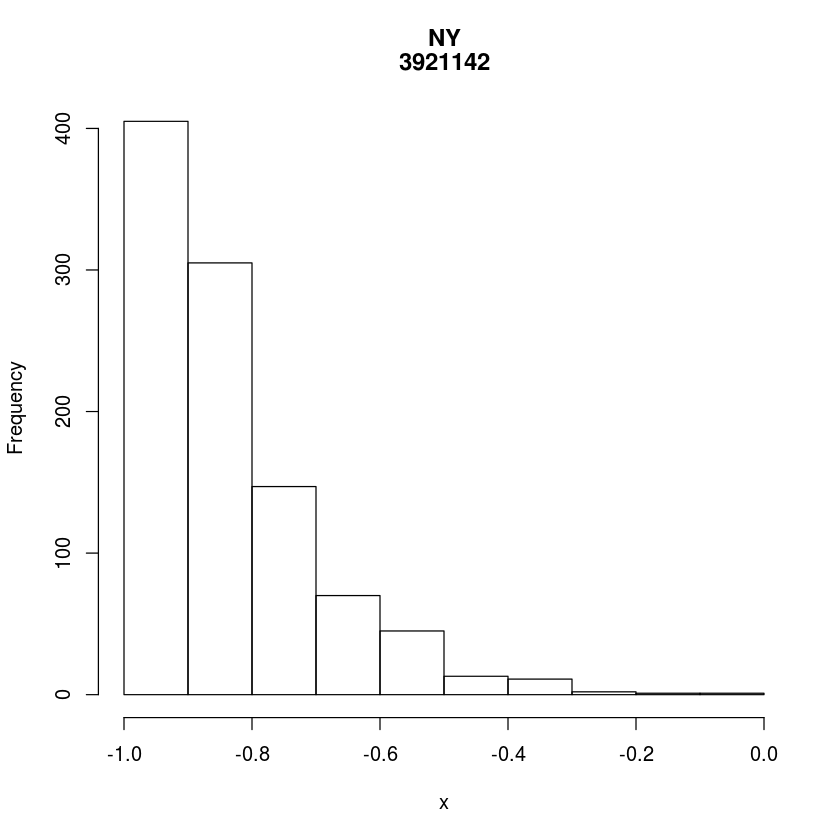

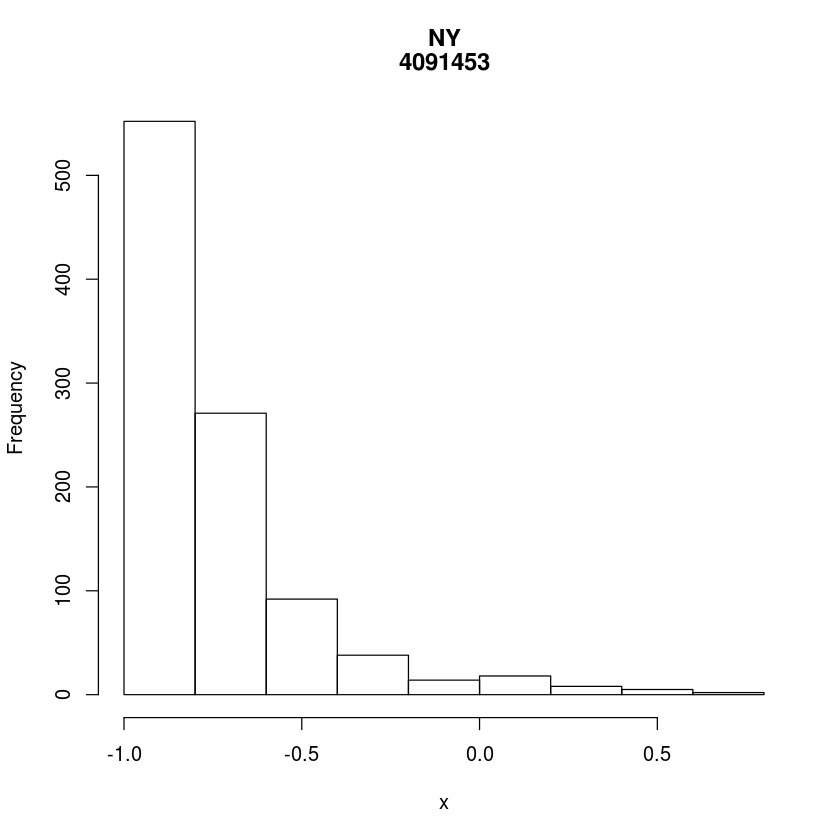

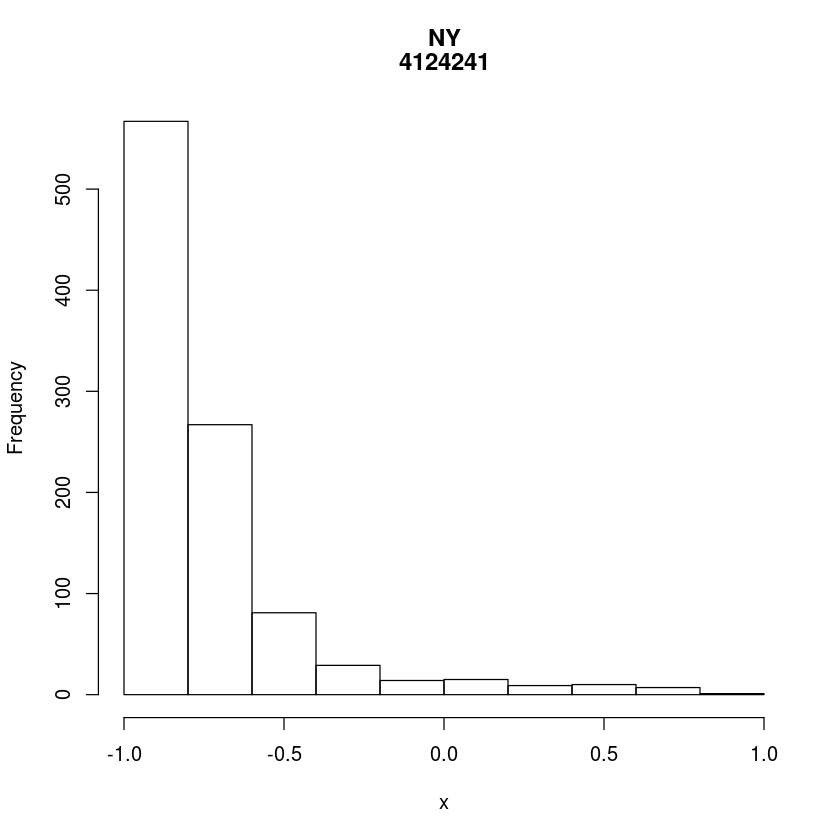

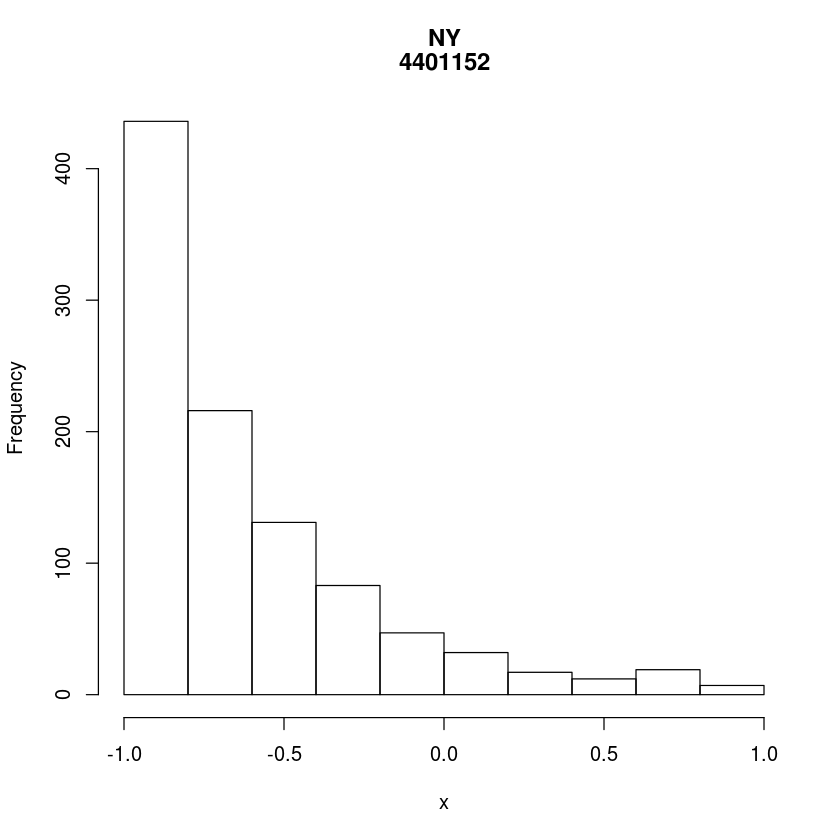

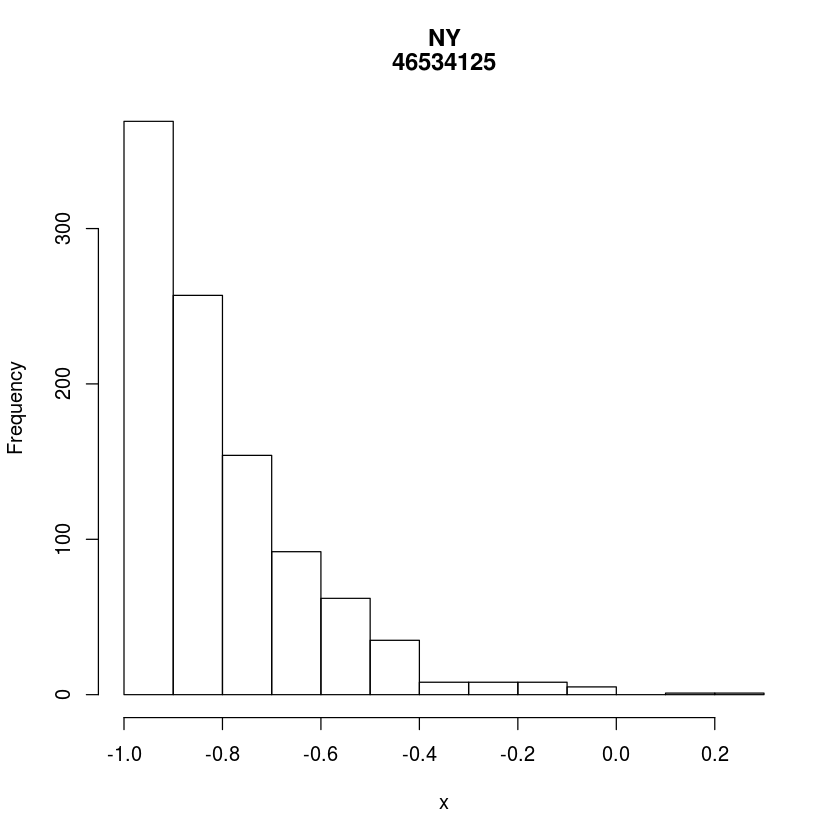

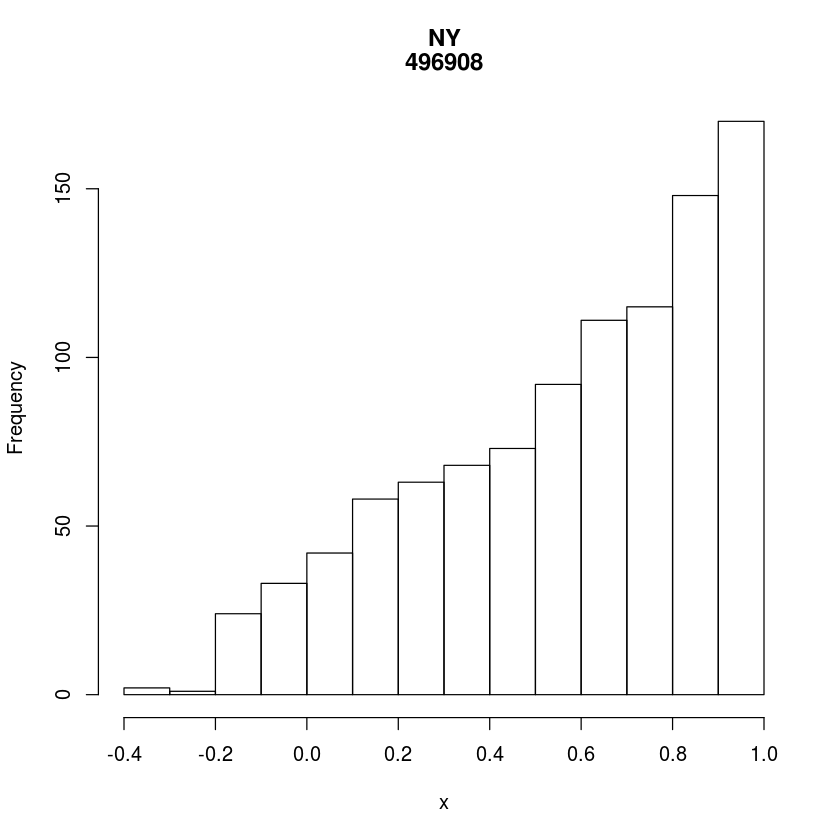

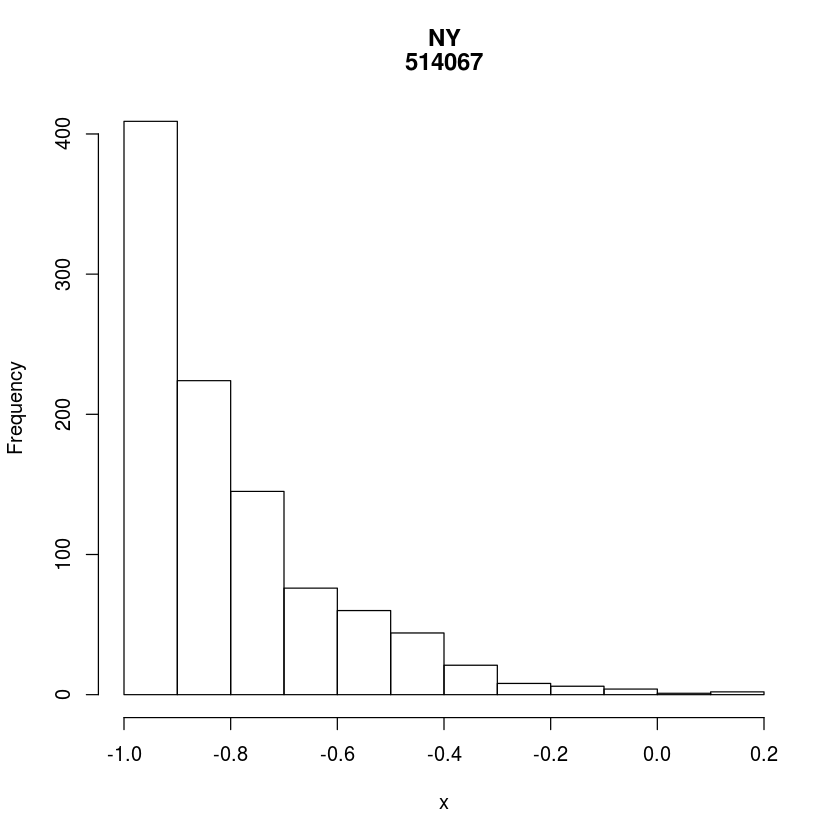

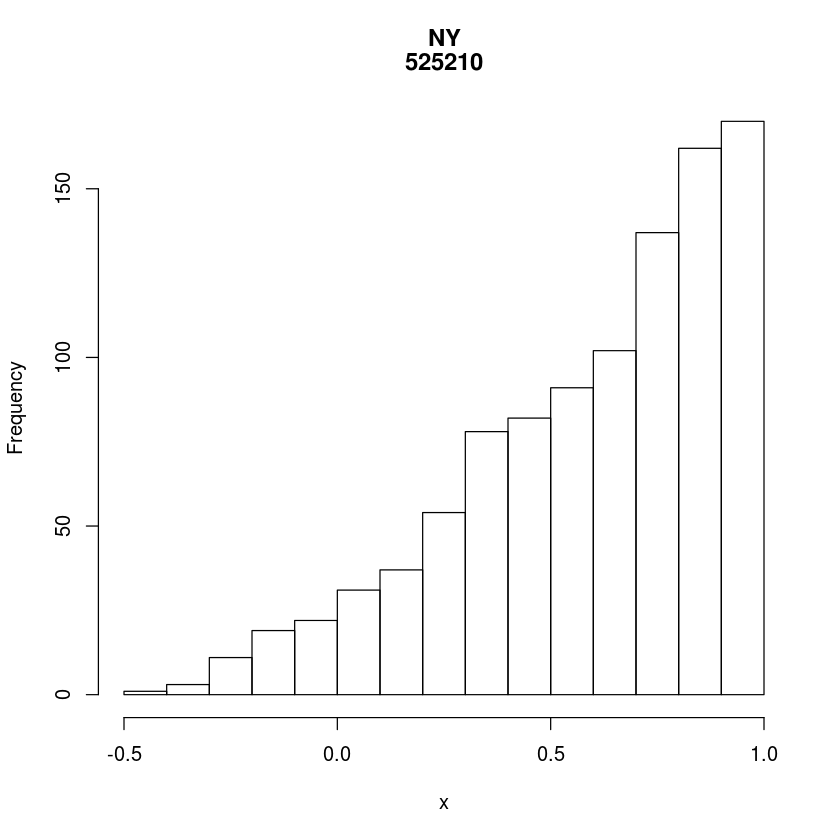

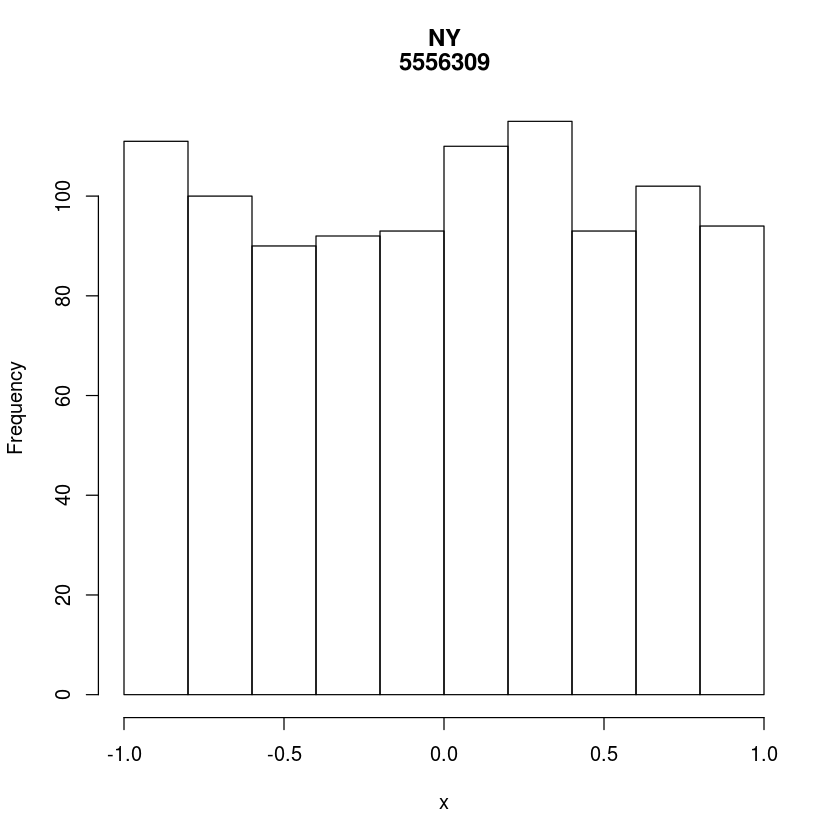

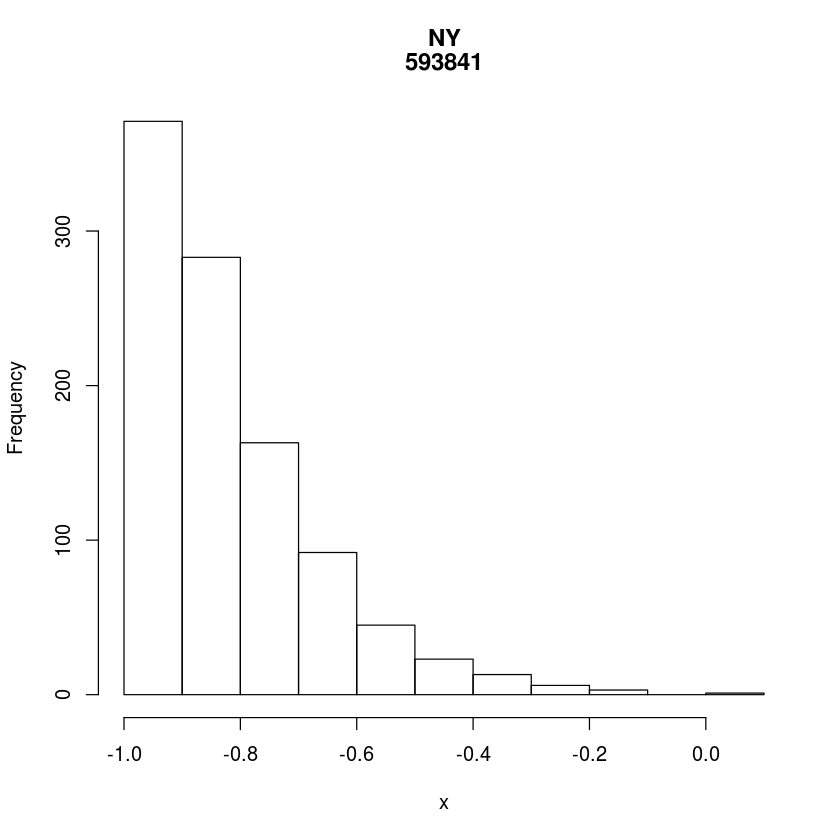

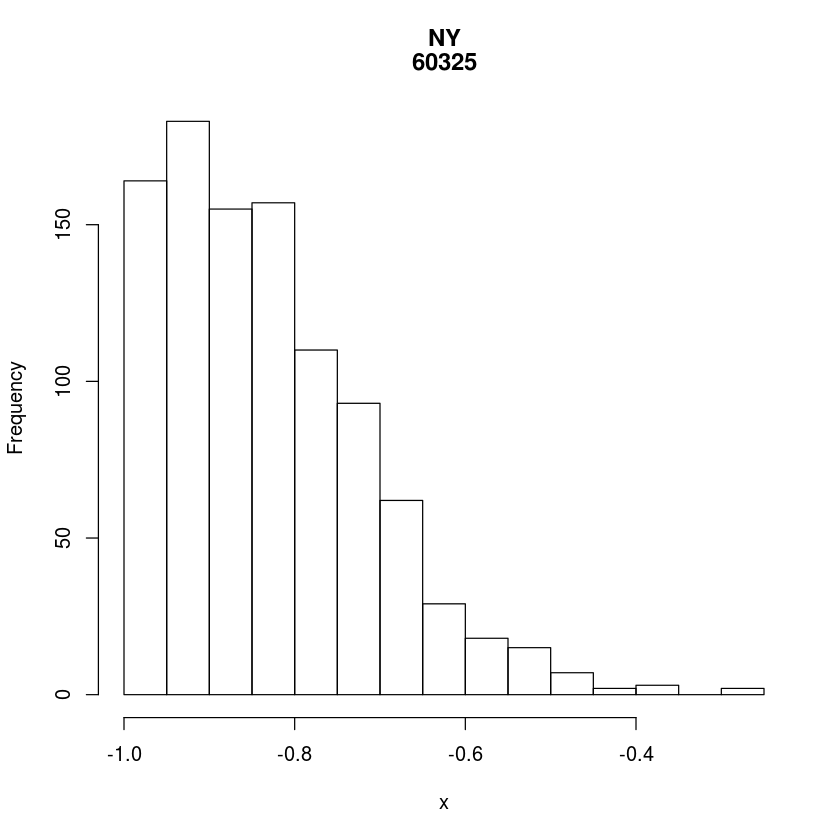

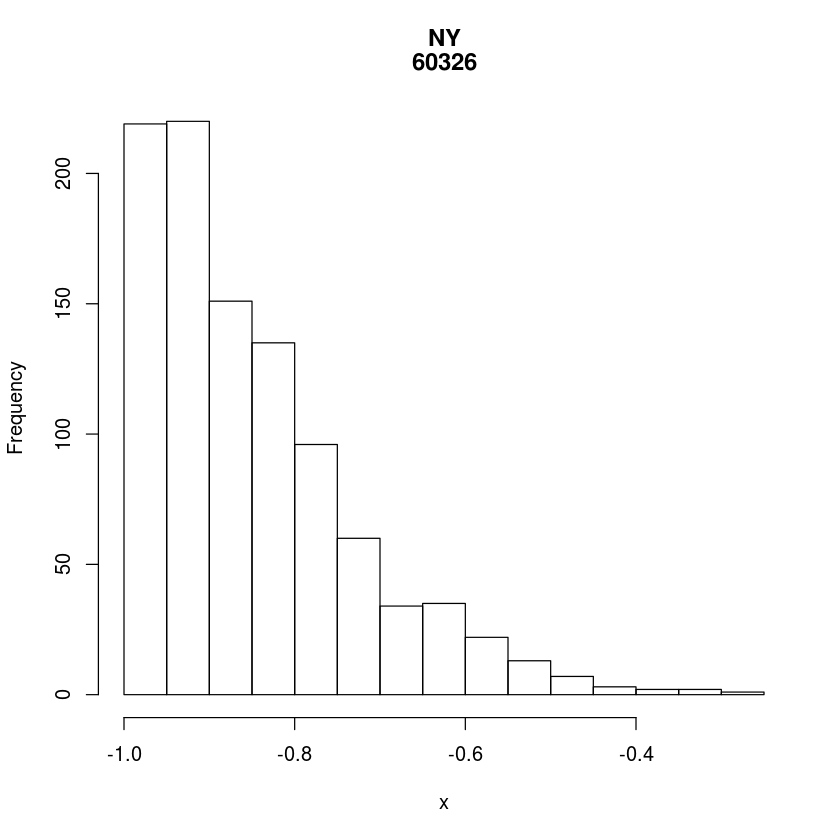

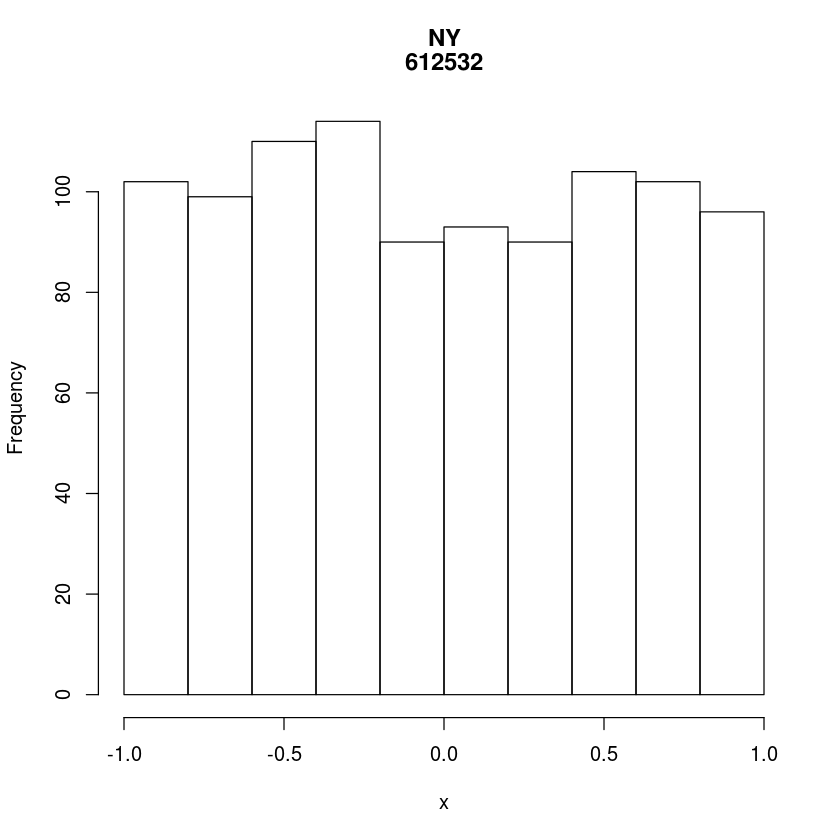

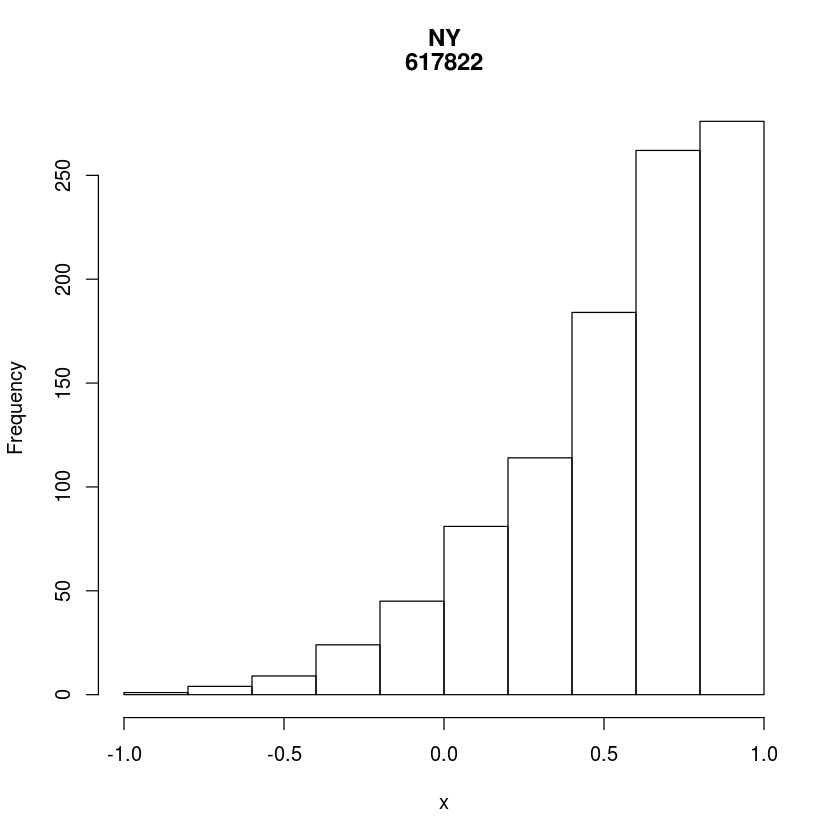

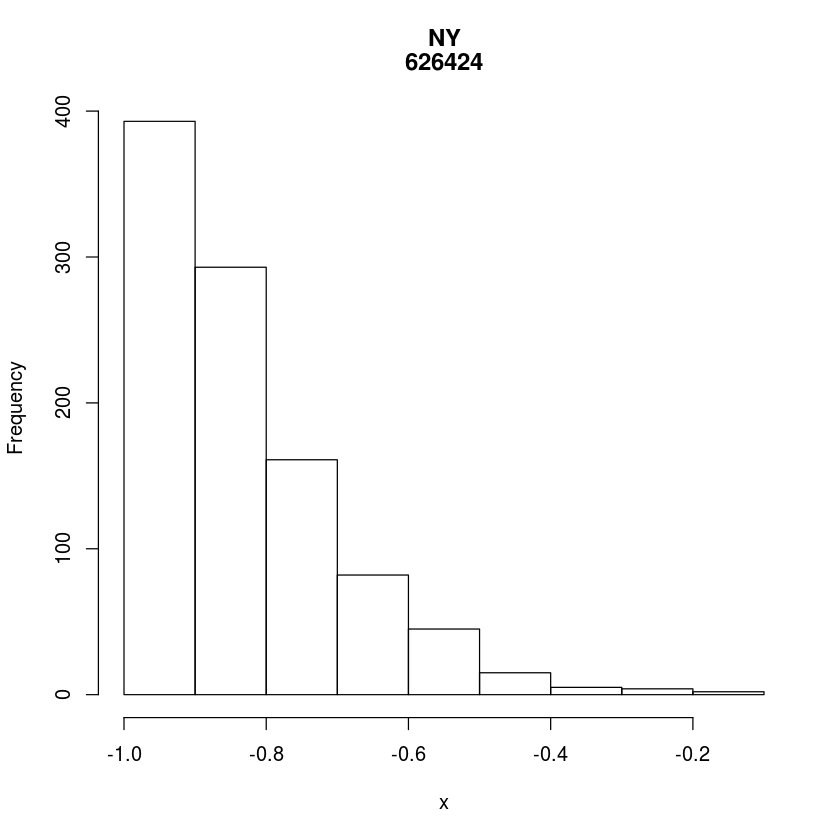

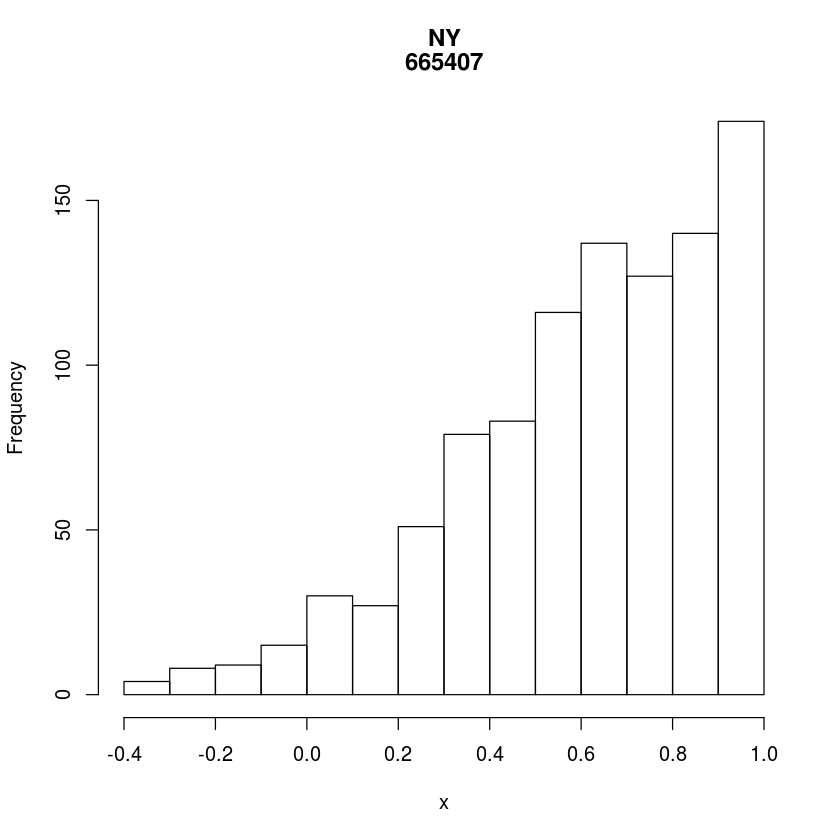

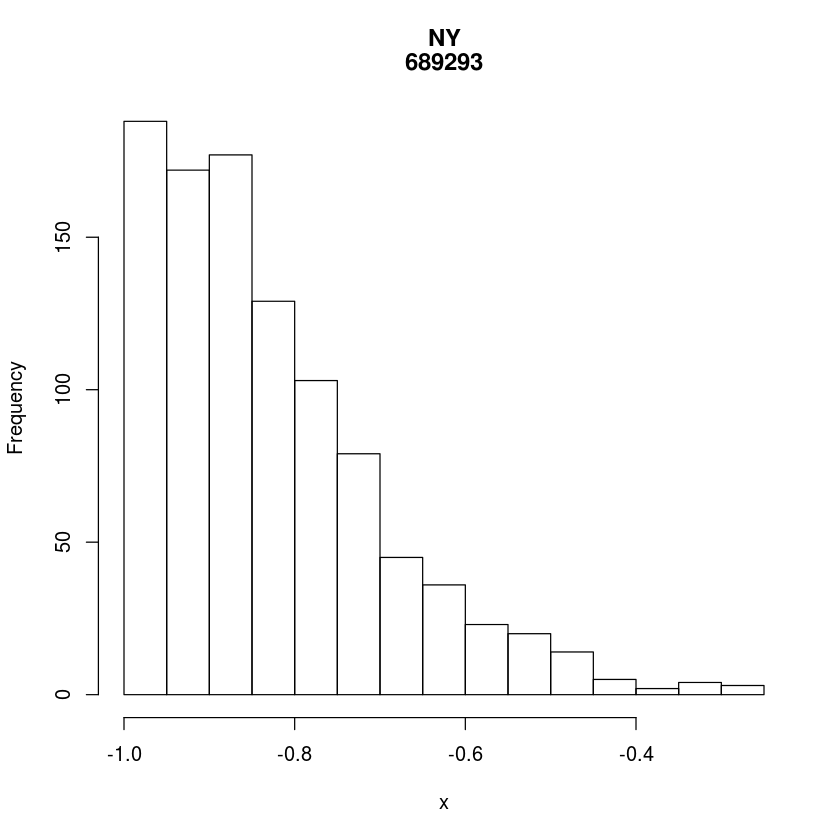

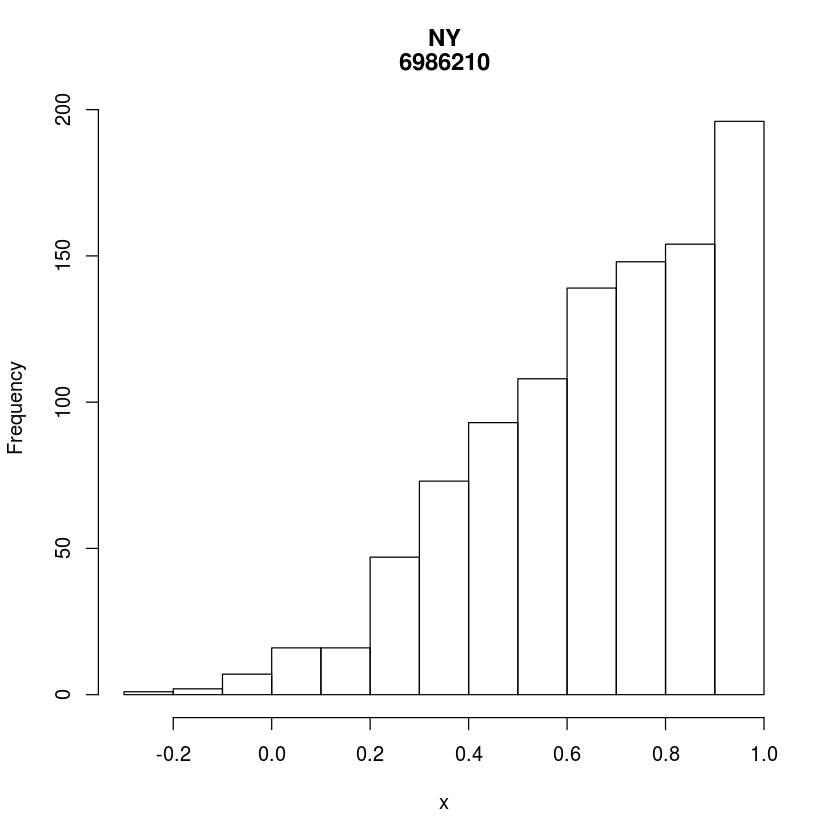

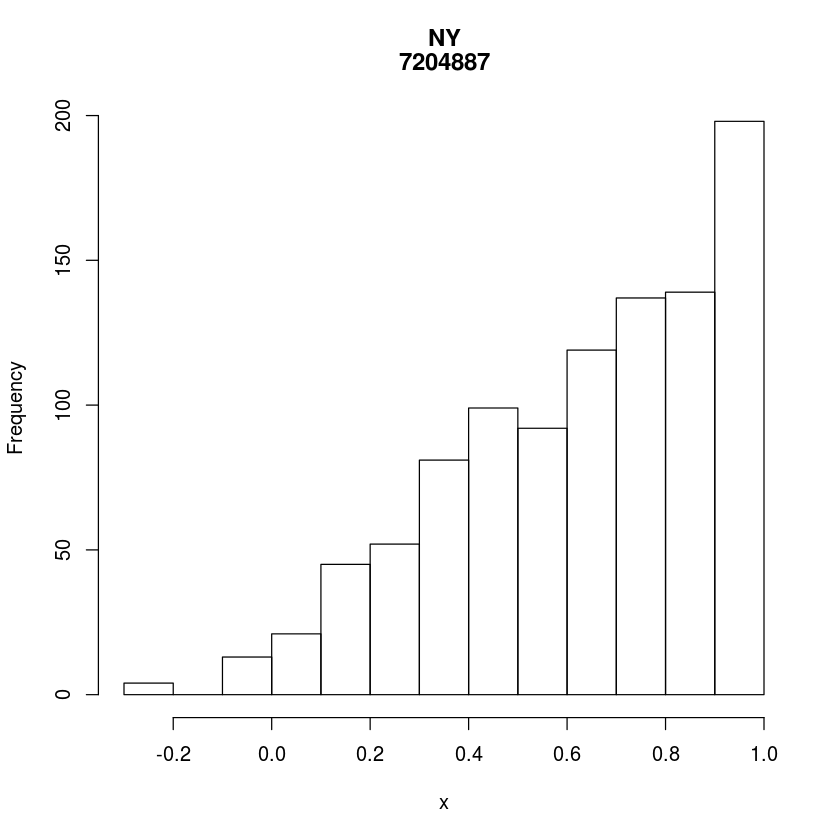

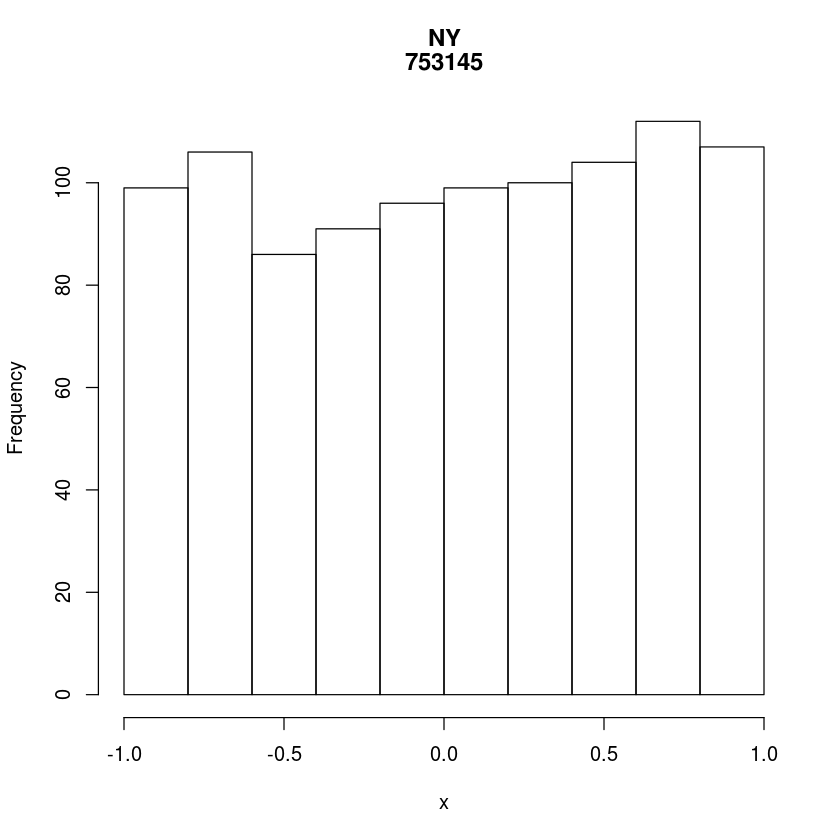

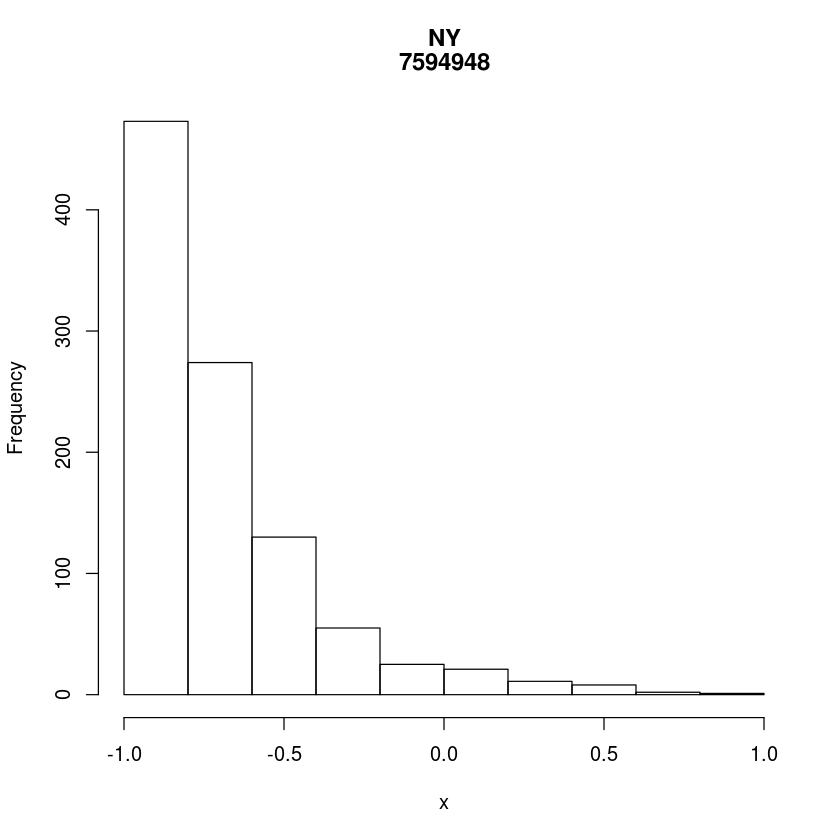

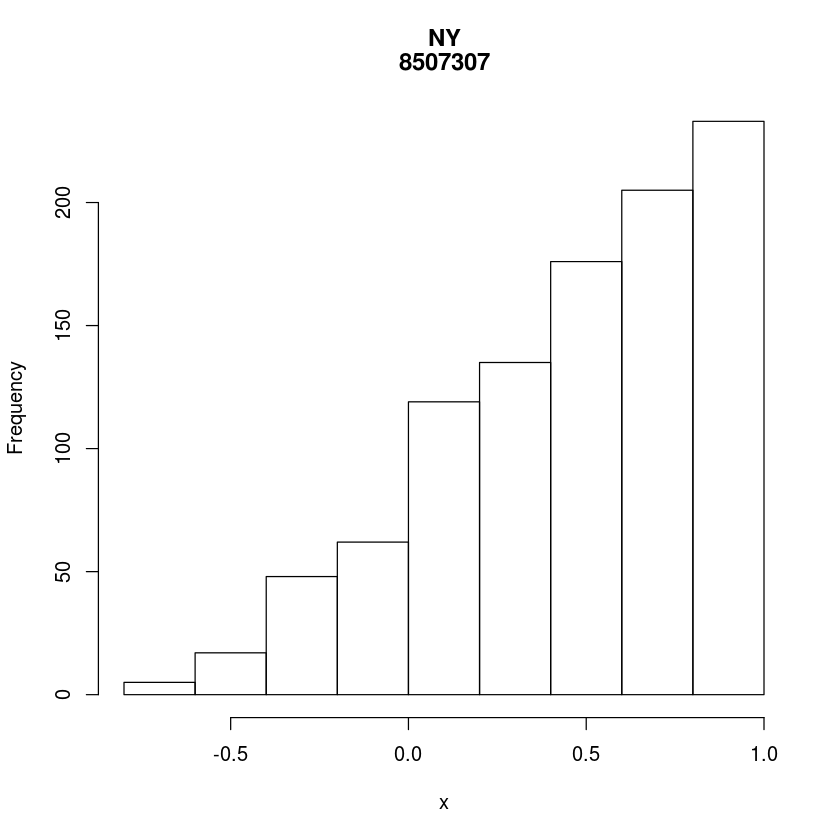

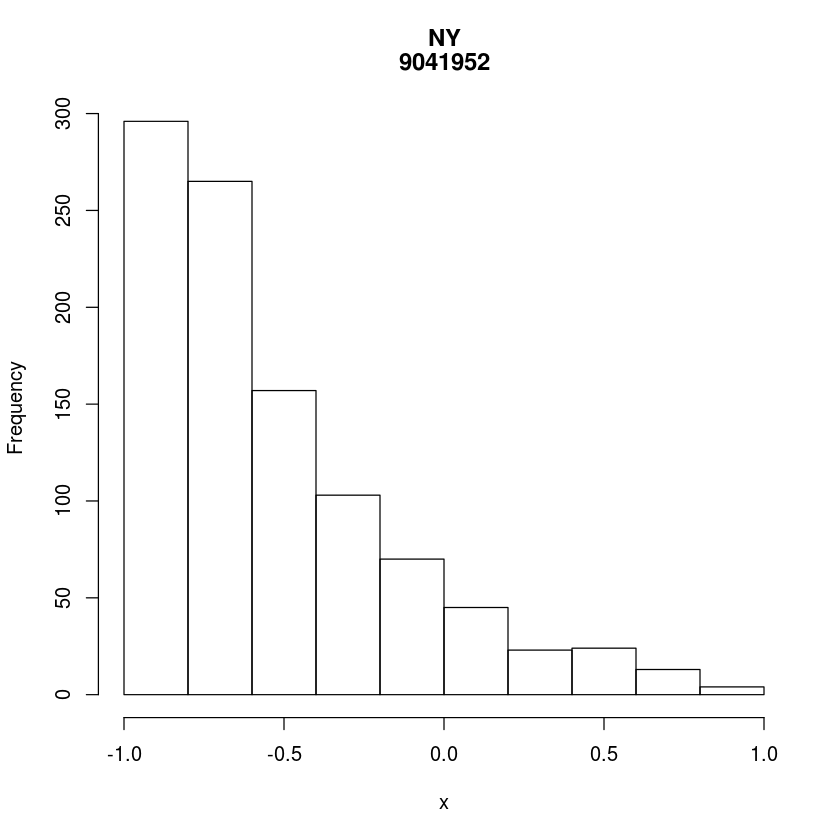

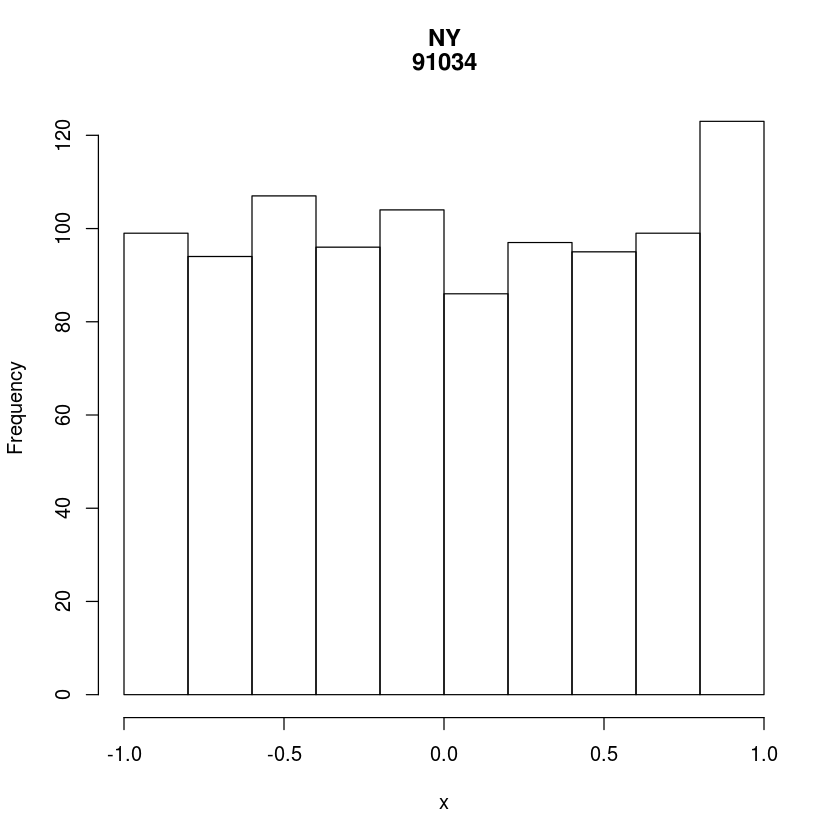

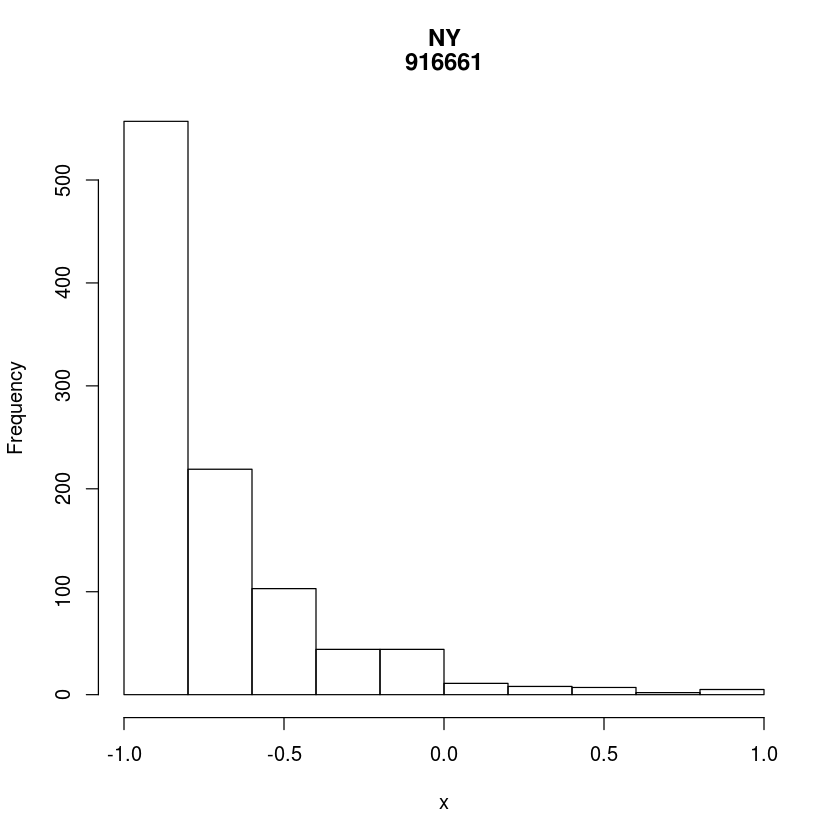

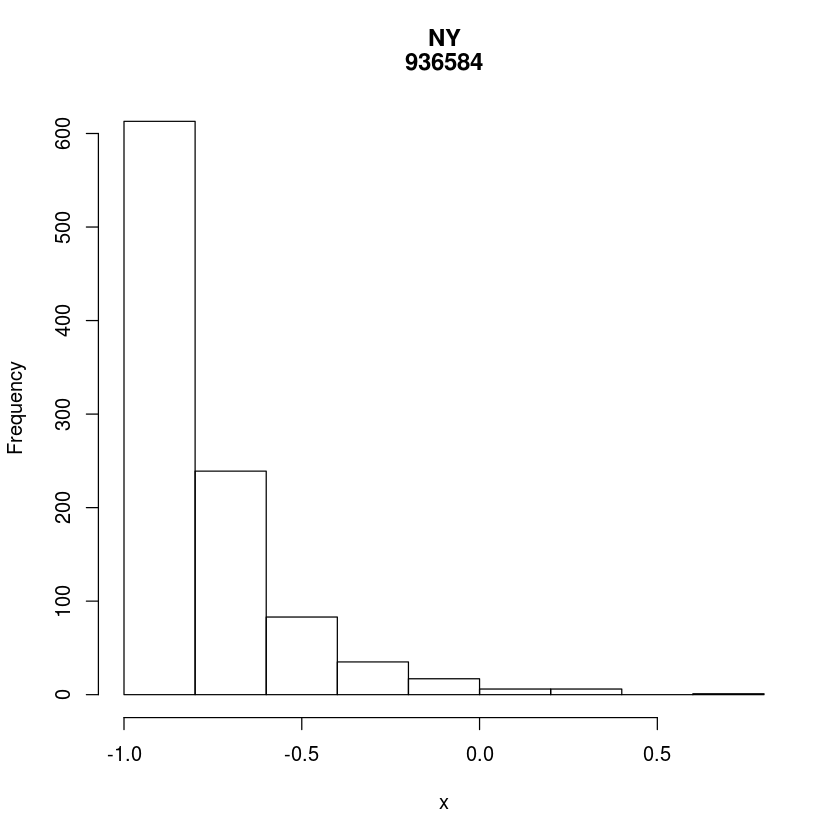

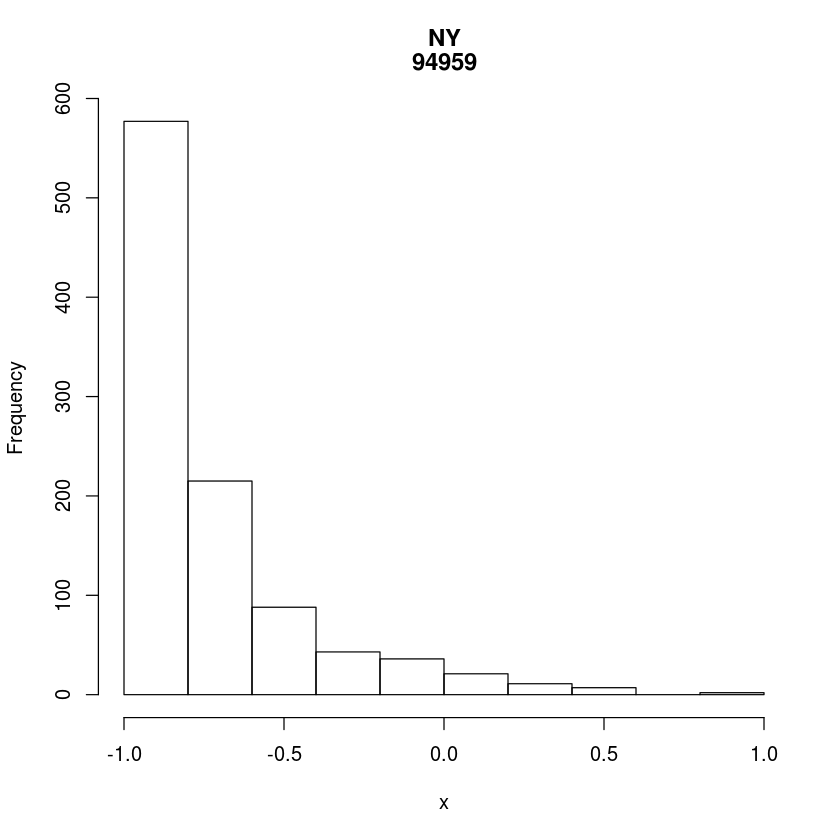

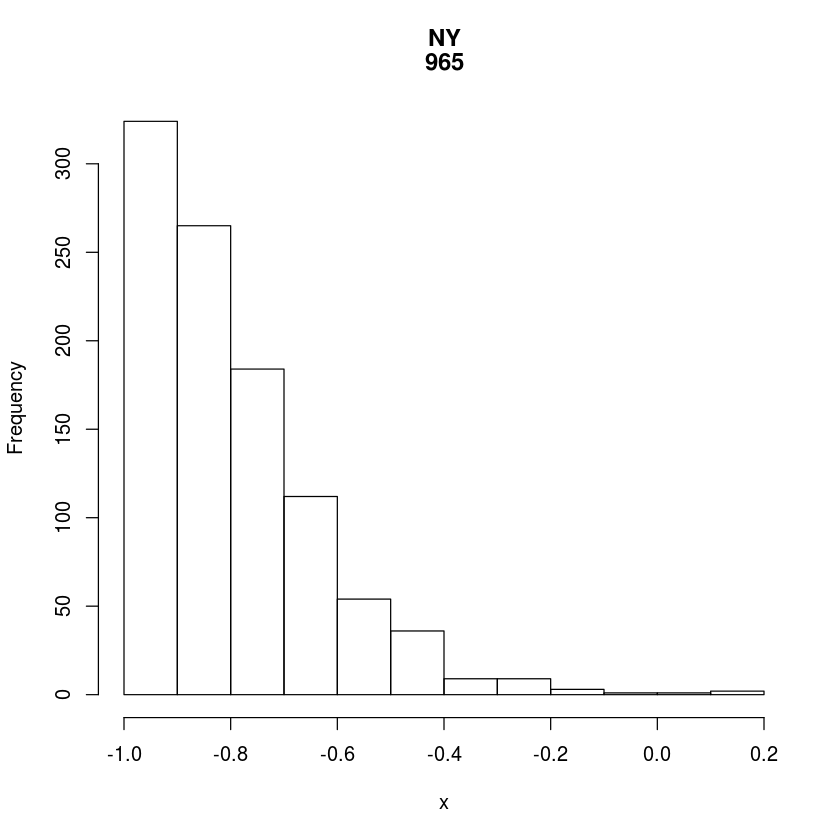

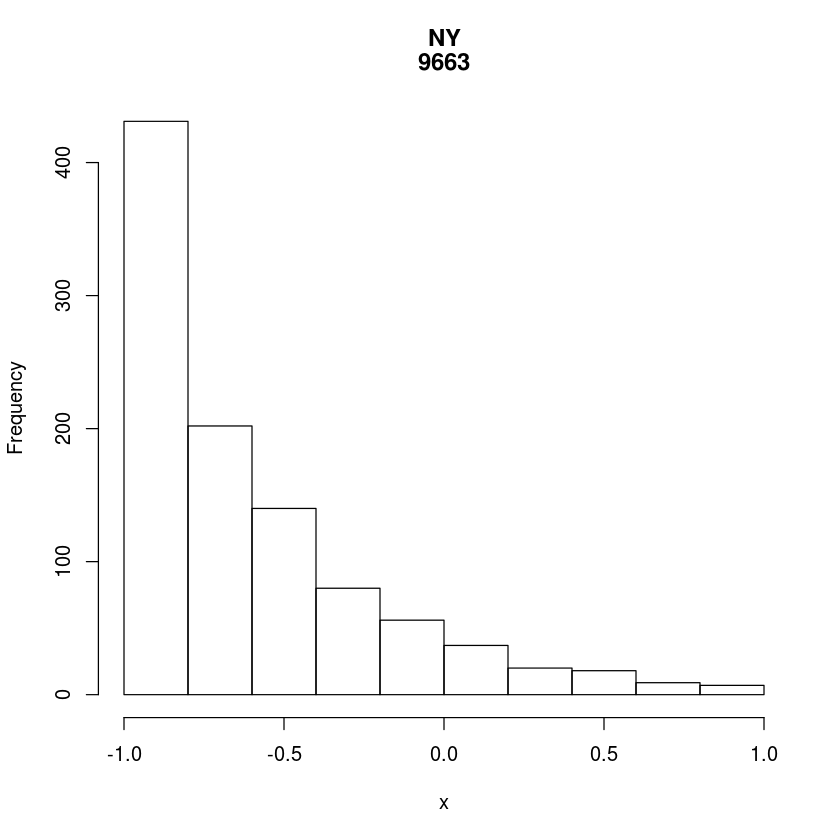

breaks,"-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8","-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0",⋯,"-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8"
counts,"100, 111, 98, 97, 104, 90, 113, 92, 94, 101","1, 2, 6, 16, 31, 38, 44, 60, 70, 81, 100, 135, 127, 148, 141","435, 275, 138, 87, 42, 13, 6, 4","321, 241, 170, 100, 69, 43, 15, 8, 7, 6, 7, 5, 4, 2, 2","646, 230, 81, 28, 10, 2, 1, 1, 1","2, 15, 13, 31, 42, 48, 55, 77, 83, 103, 126, 118, 143, 144","394, 249, 149, 101, 43, 34, 9, 11, 5, 3, 2","424, 288, 166, 71, 26, 13, 6, 5, 0, 0, 1","404, 246, 139, 76, 47, 28, 28, 16, 5, 4, 2, 2, 0, 3","585, 234, 103, 36, 20, 12, 7, 0, 2, 1",⋯,"473, 274, 130, 55, 25, 21, 11, 8, 2, 1","5, 17, 48, 62, 119, 135, 176, 205, 233","296, 265, 157, 103, 70, 45, 23, 24, 13, 4","99, 94, 107, 96, 104, 86, 97, 95, 99, 123","557, 219, 103, 44, 44, 11, 8, 7, 2, 5","613, 239, 83, 35, 17, 6, 6, 0, 1","577, 215, 88, 43, 36, 21, 11, 7, 0, 2","324, 265, 184, 112, 54, 36, 9, 9, 3, 1, 1, 2","431, 202, 140, 80, 56, 37, 20, 18, 9, 7","480, 236, 145, 66, 39, 18, 8, 4, 4"
density,"0.500, 0.555, 0.490, 0.485, 0.520, 0.450, 0.565, 0.460, 0.470, 0.505","0.01, 0.02, 0.06, 0.16, 0.31, 0.38, 0.44, 0.60, 0.70, 0.81, 1.00, 1.35, 1.27, 1.48, 1.41","4.35, 2.75, 1.38, 0.87, 0.42, 0.13, 0.06, 0.04","3.21, 2.41, 1.70, 1.00, 0.69, 0.43, 0.15, 0.08, 0.07, 0.06, 0.07, 0.05, 0.04, 0.02, 0.02","3.230, 1.150, 0.405, 0.140, 0.050, 0.010, 0.005, 0.005, 0.005","0.02, 0.15, 0.13, 0.31, 0.42, 0.48, 0.55, 0.77, 0.83, 1.03, 1.26, 1.18, 1.43, 1.44","3.94, 2.49, 1.49, 1.01, 0.43, 0.34, 0.09, 0.11, 0.05, 0.03, 0.02","4.24, 2.88, 1.66, 0.71, 0.26, 0.13, 0.06, 0.05, 0.00, 0.00, 0.01","4.04, 2.46, 1.39, 0.76, 0.47, 0.28, 0.28, 0.16, 0.05, 0.04, 0.02, 0.02, 0.00, 0.03","2.925, 1.170, 0.515, 0.180, 0.100, 0.060, 0.035, 0.000, 0.010, 0.005",⋯,"2.365, 1.370, 0.650, 0.275, 0.125, 0.105, 0.055, 0.040, 0.010, 0.005","0.025, 0.085, 0.240, 0.310, 0.595, 0.675, 0.880, 1.025, 1.165","1.480, 1.325, 0.785, 0.515, 0.350, 0.225, 0.115, 0.120, 0.065, 0.020","0.495, 0.470, 0.535, 0.480, 0.520, 0.430, 0.485, 0.475, 0.495, 0.615","2.785, 1.095, 0.515, 0.220, 0.220, 0.055, 0.040, 0.035, 0.010, 0.025","3.065, 1.195, 0.415, 0.175, 0.085, 0.030, 0.030, 0.000, 0.005","2.885, 1.075, 0.440, 0.215, 0.180, 0.105, 0.055, 0.035, 0.000, 0.010","3.24, 2.65, 1.84, 1.12, 0.54, 0.36, 0.09, 0.09, 0.03, 0.01, 0.01, 0.02","2.155, 1.010, 0.700, 0.400, 0.280, 0.185, 0.100, 0.090, 0.045, 0.035","2.400, 1.180, 0.725, 0.330, 0.195, 0.090, 0.040, 0.020, 0.020"
mids,"-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9","-0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95","-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25","-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45","-0.9, -0

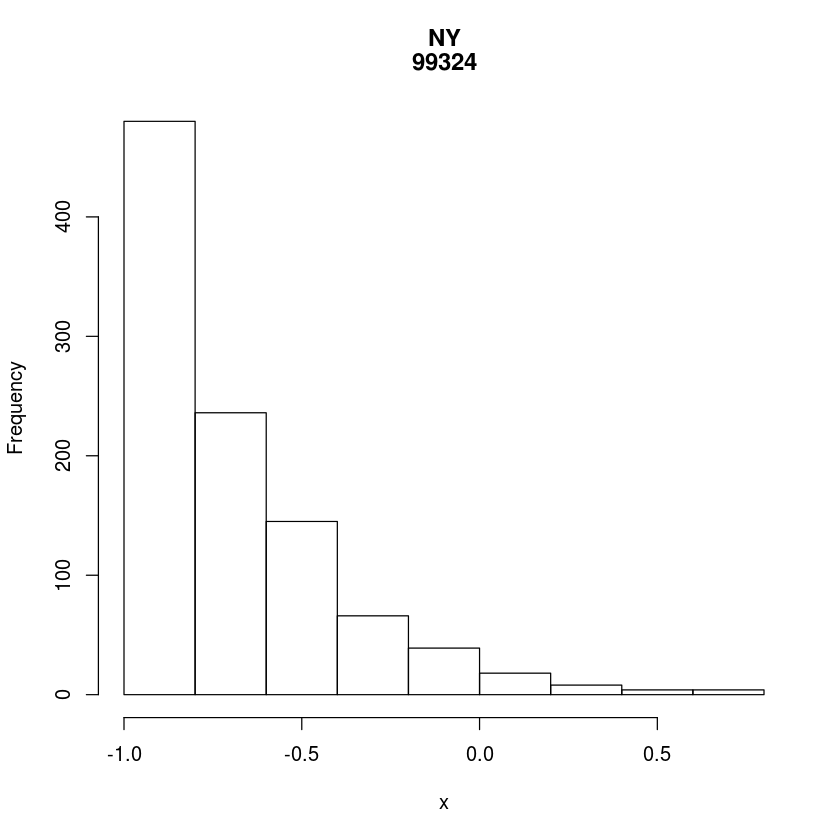

In [17]:
mapply(function(x, y) {
hist(x, main=c("NY", y[1,3]))}, sNJ, NJ_f2scount)


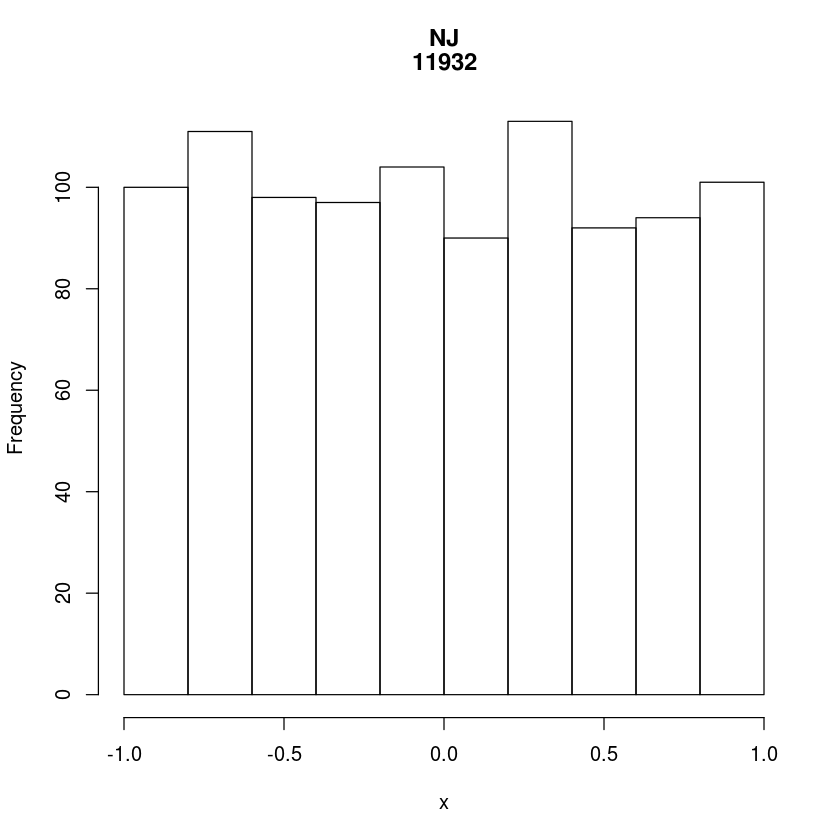

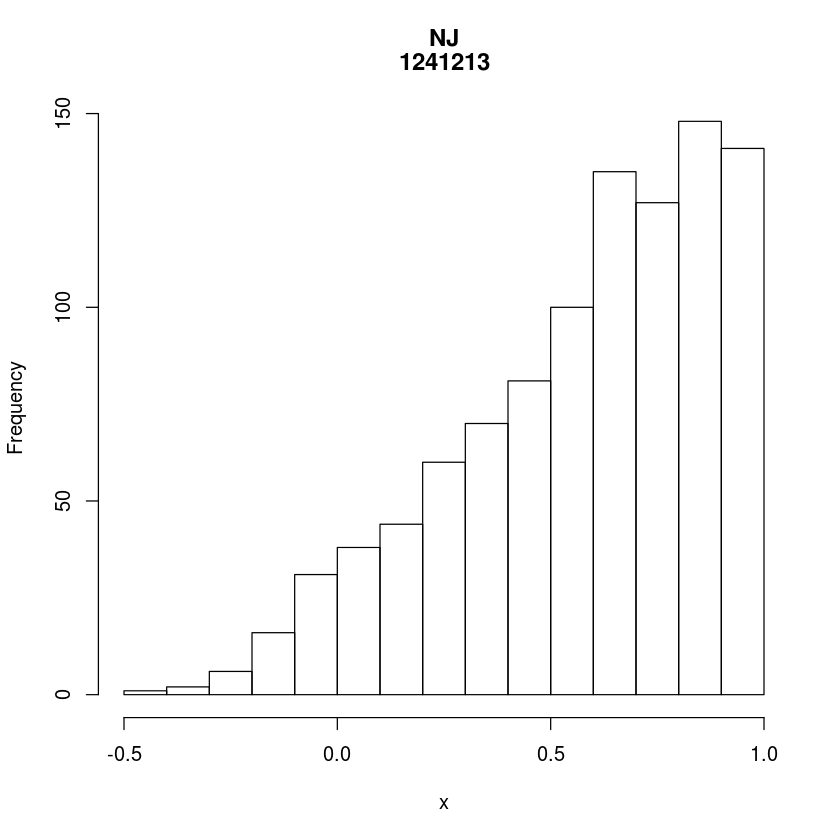

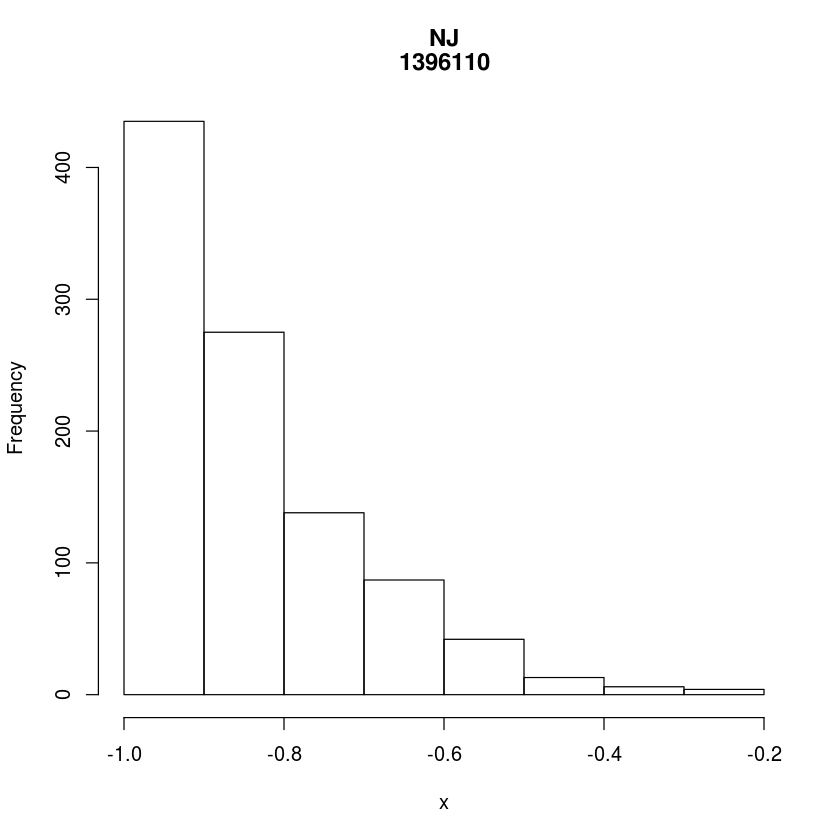

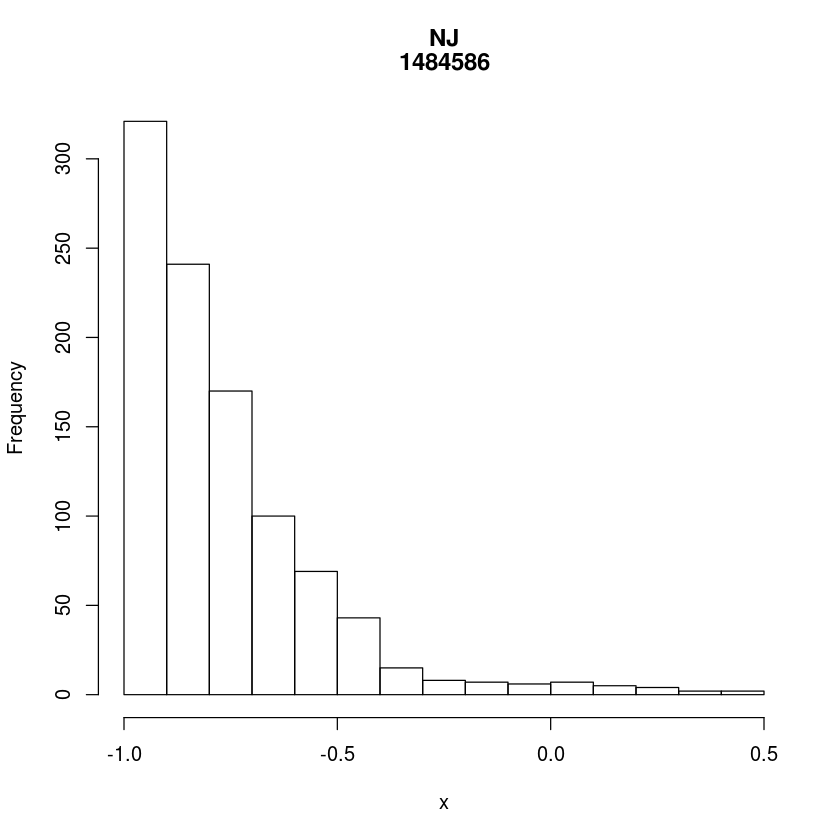

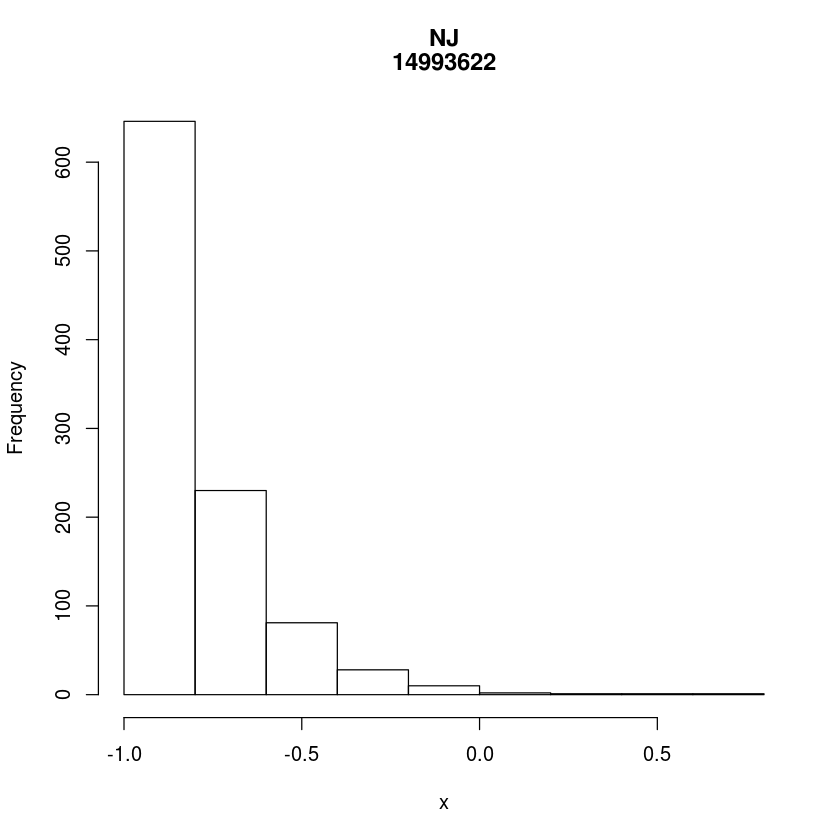

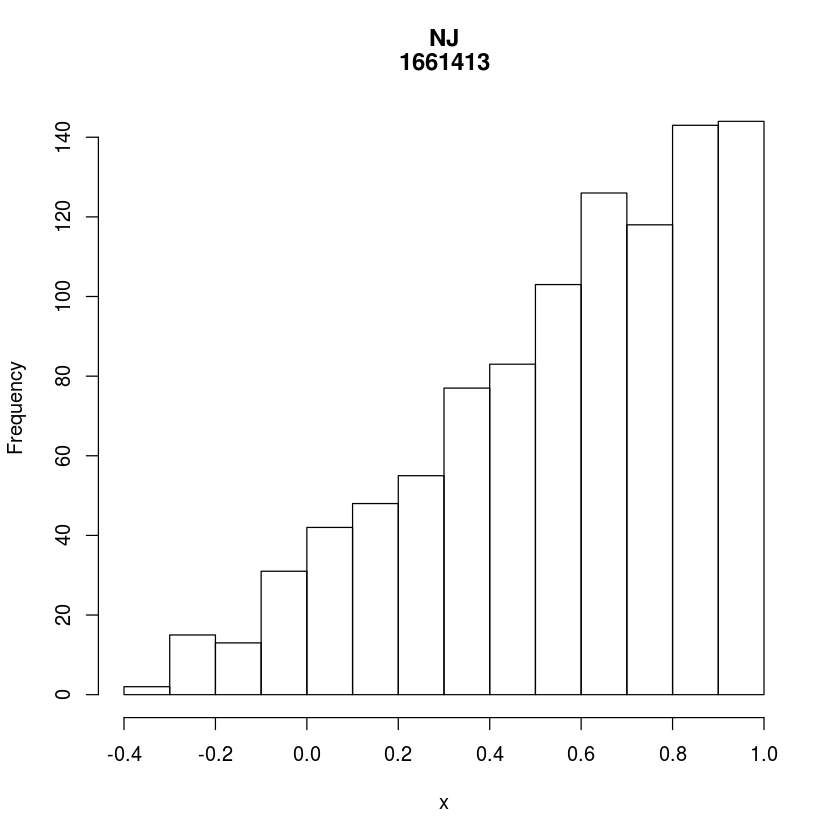

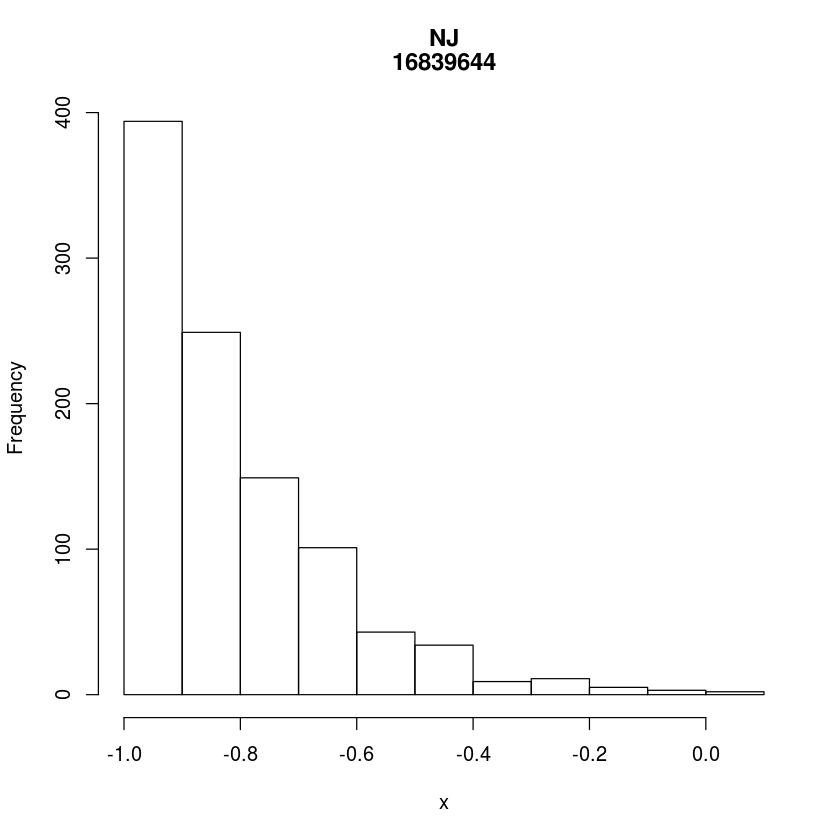

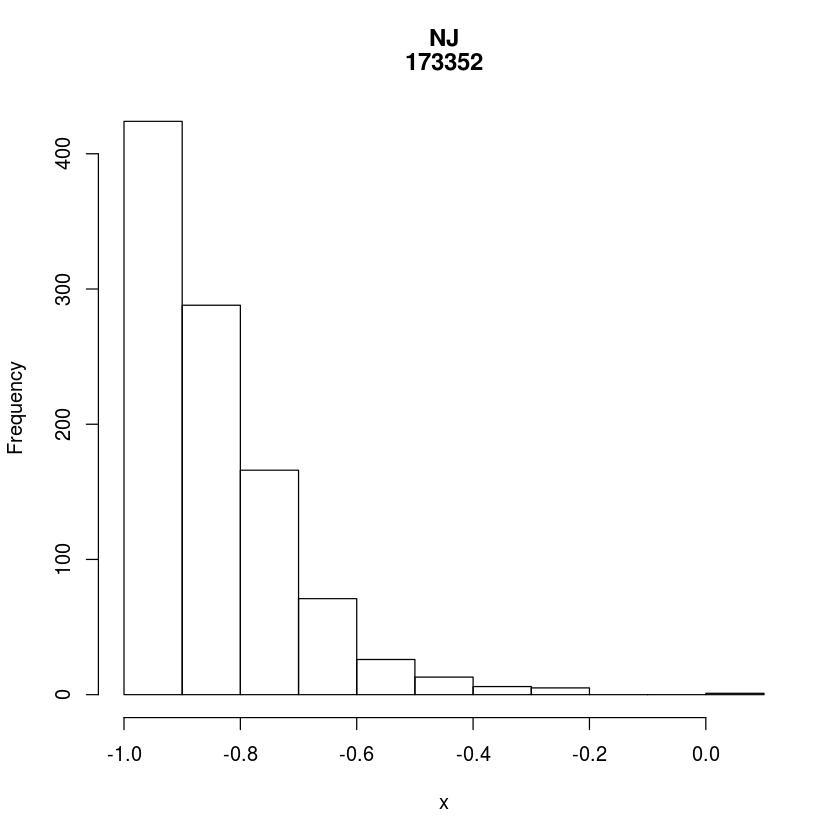

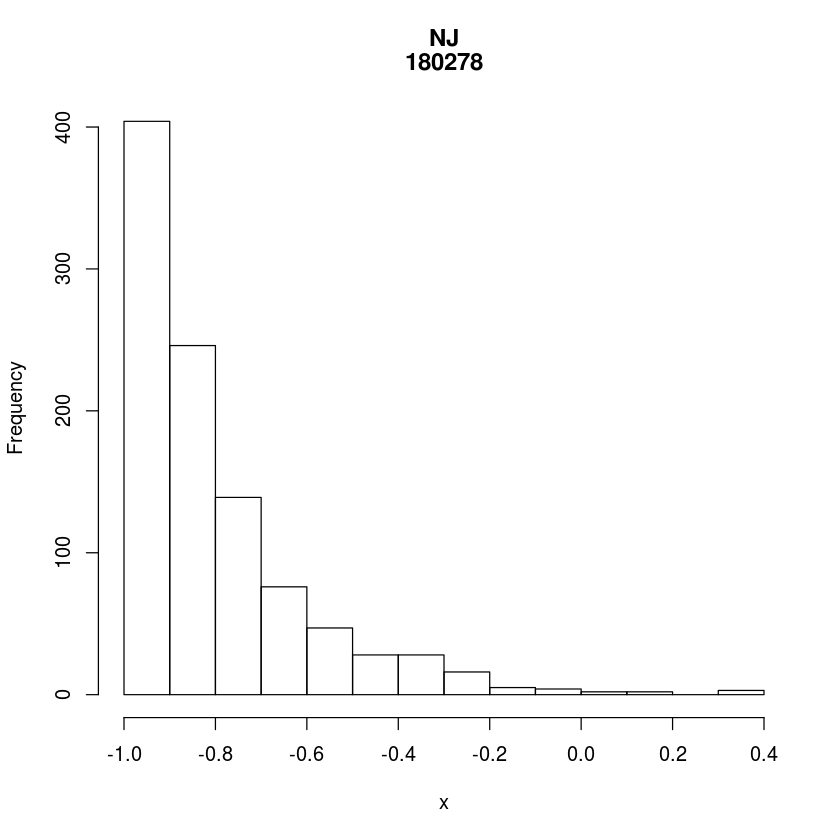

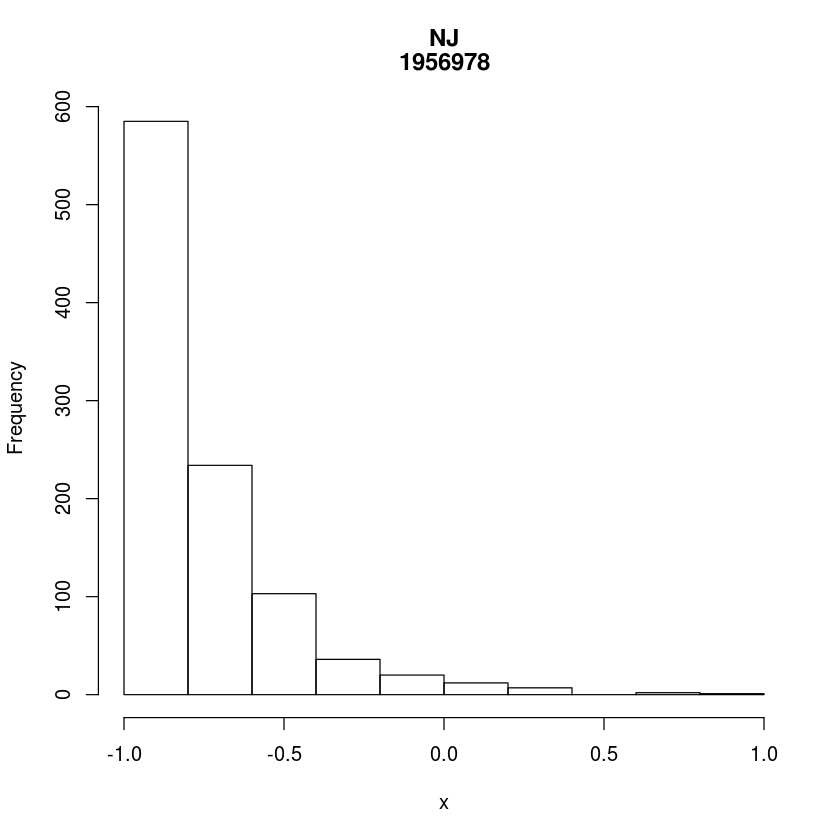

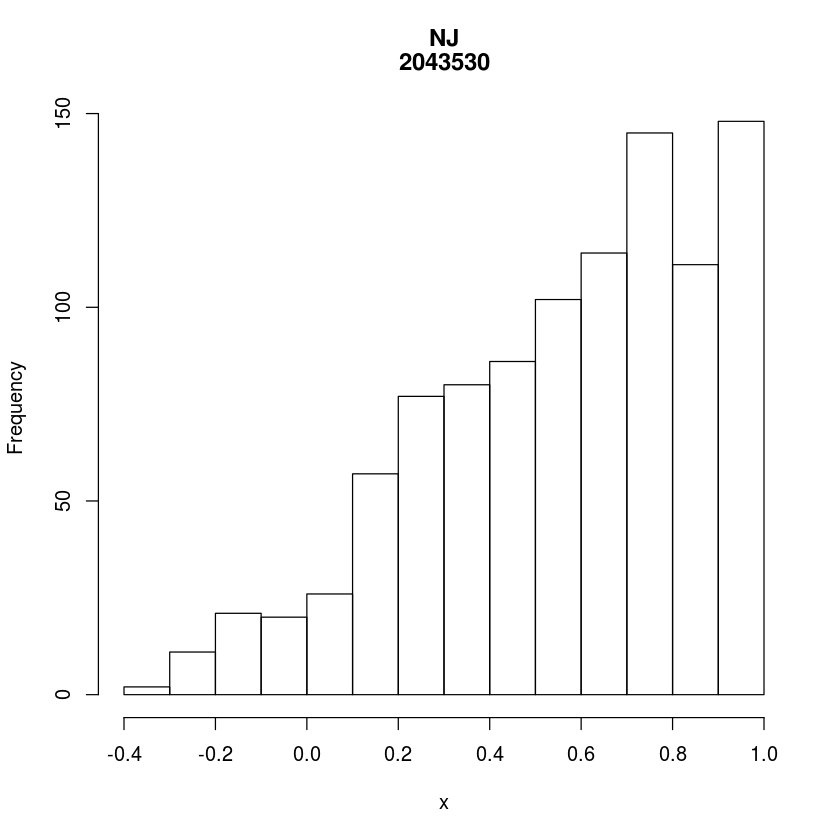

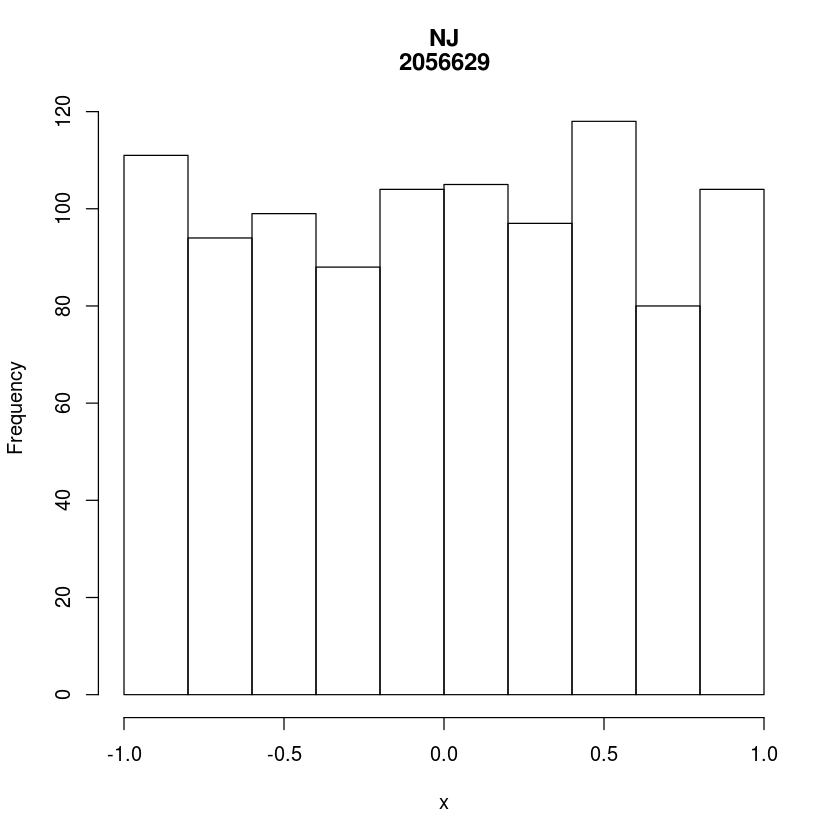

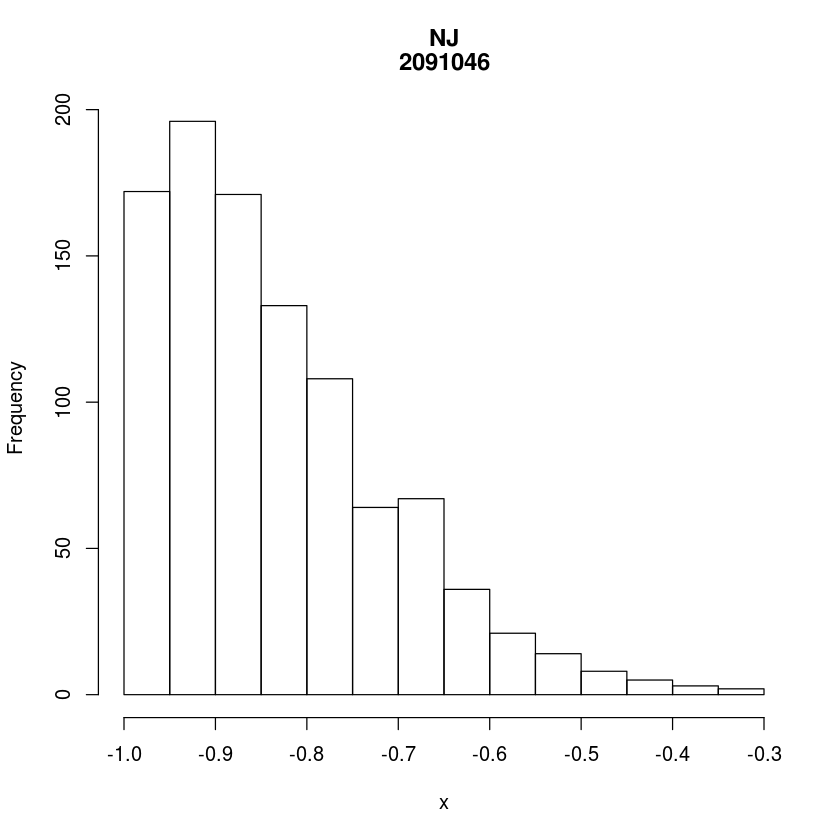

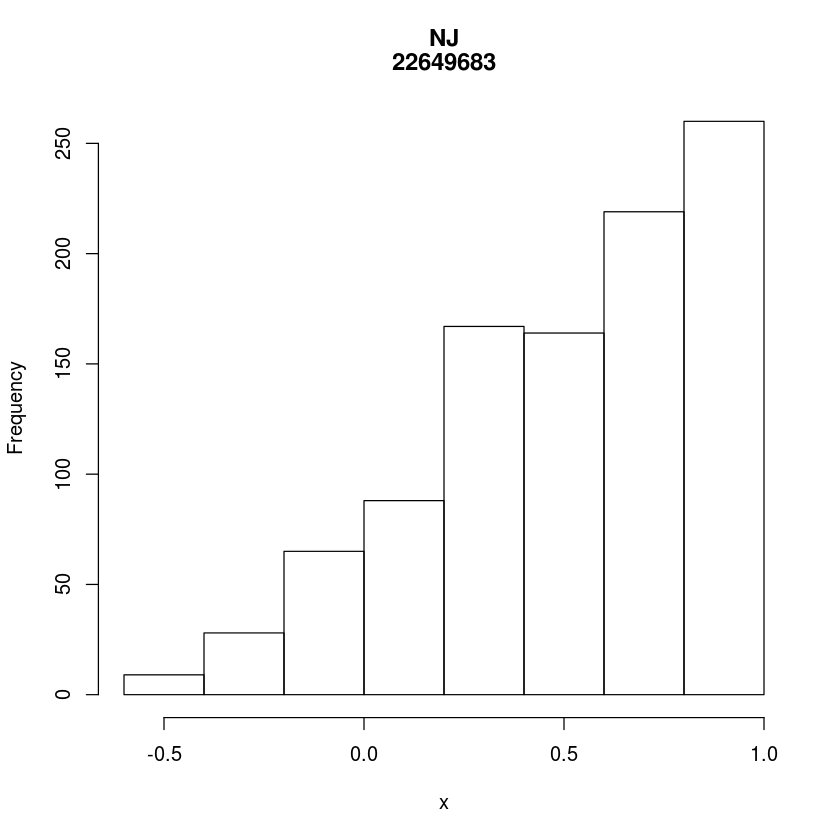

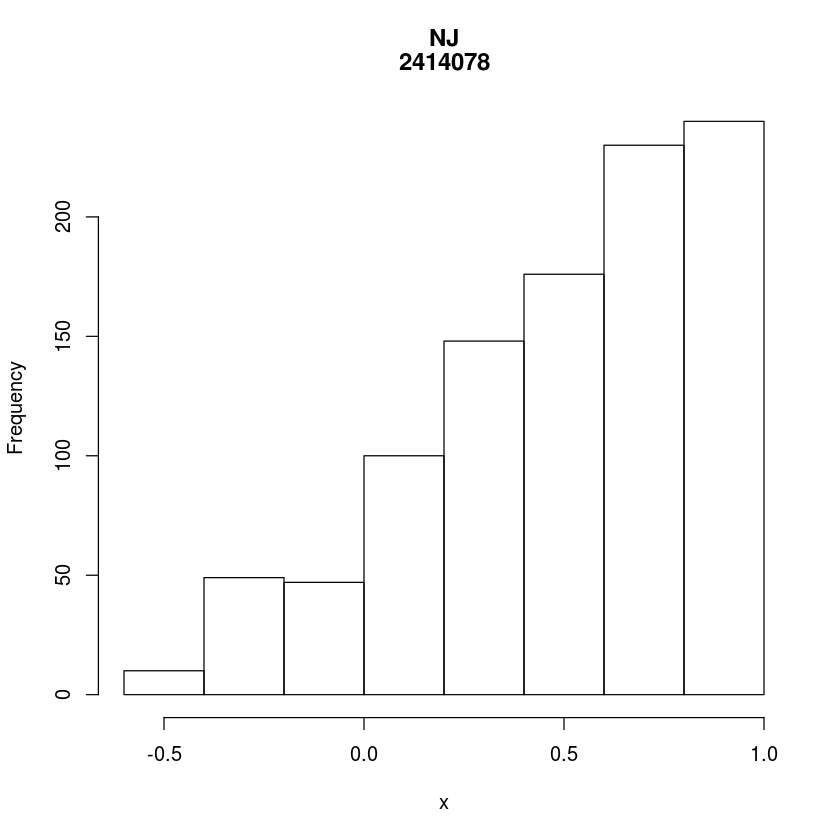

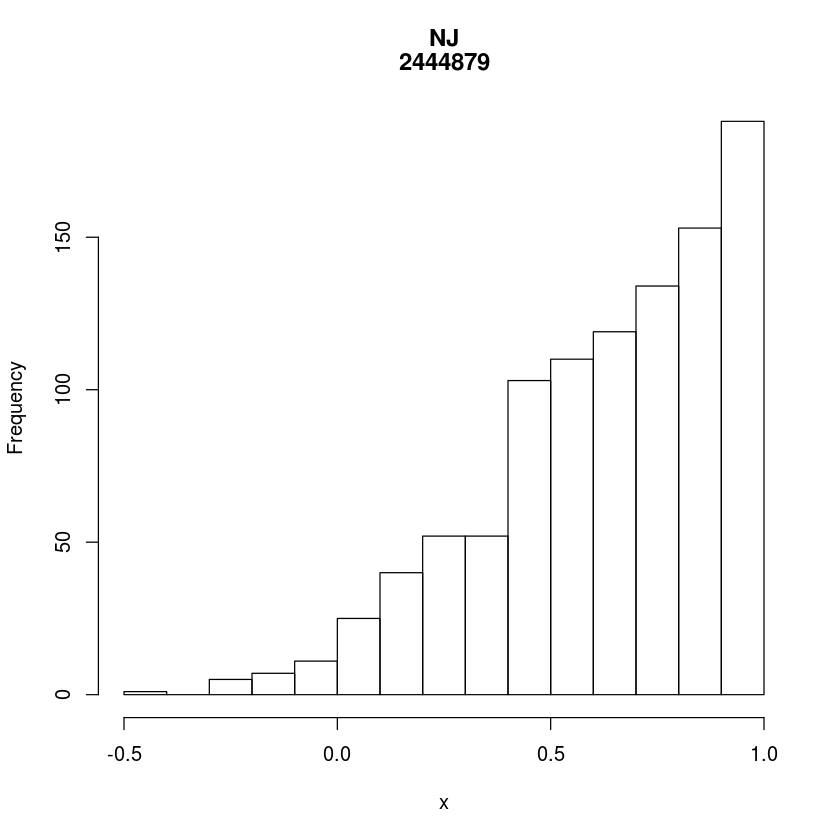

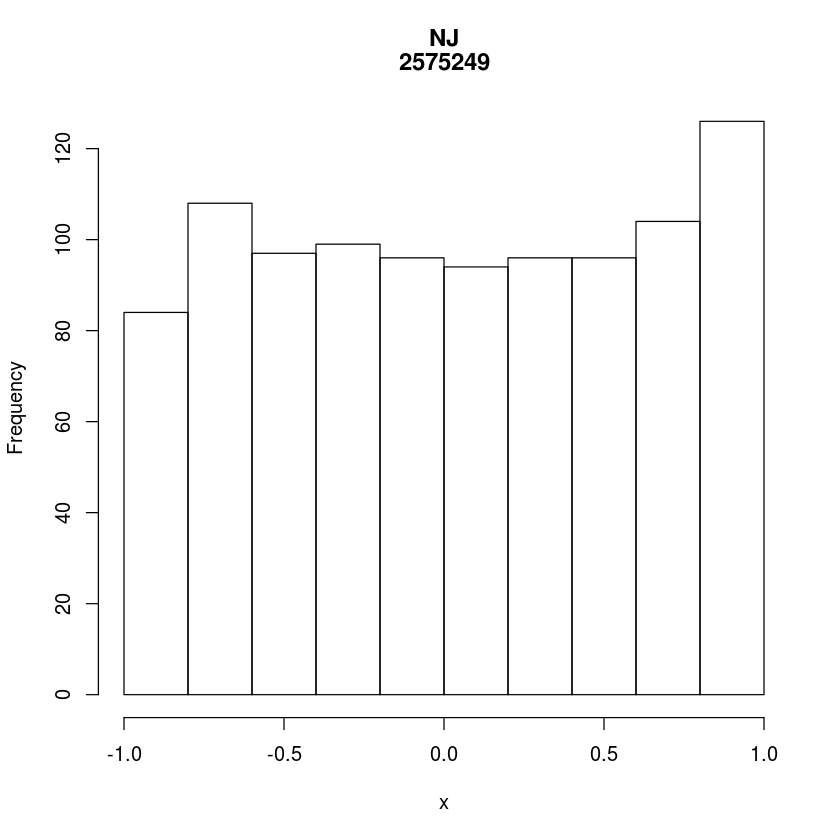

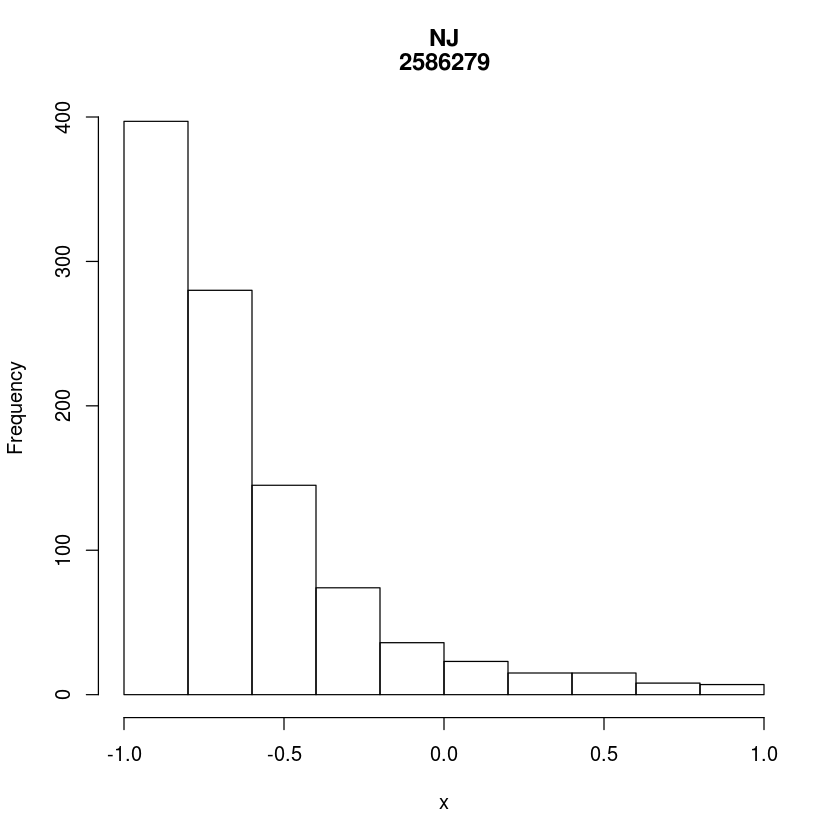

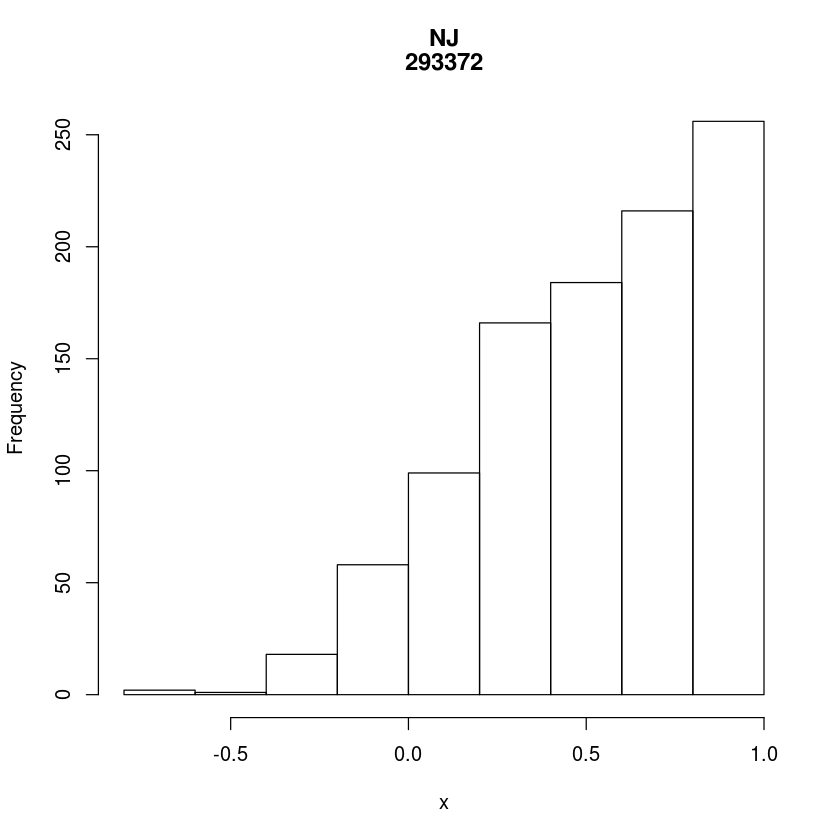

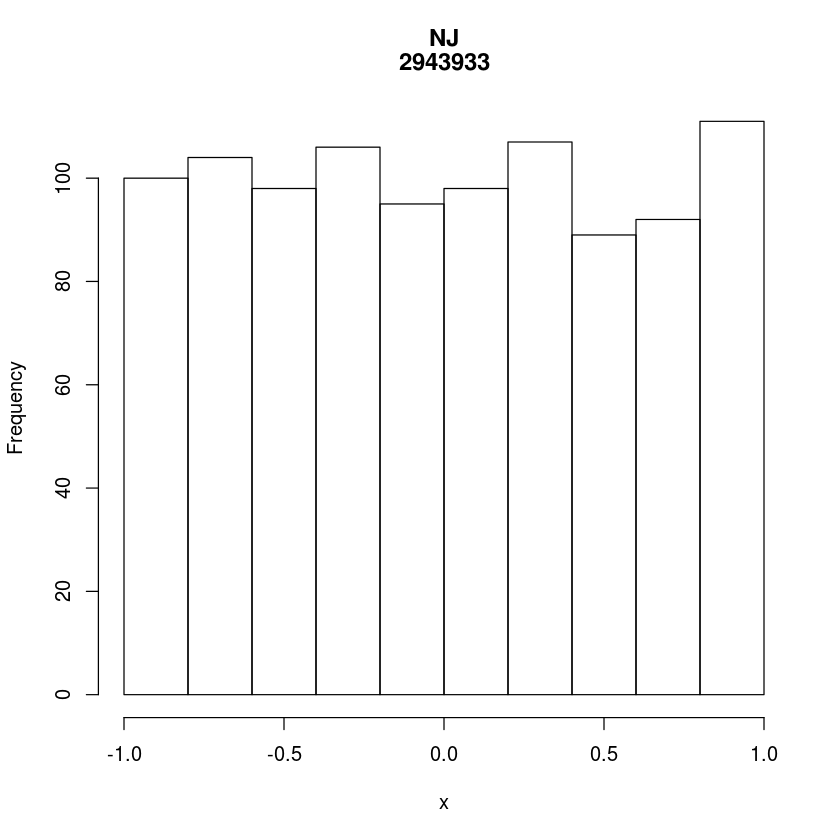

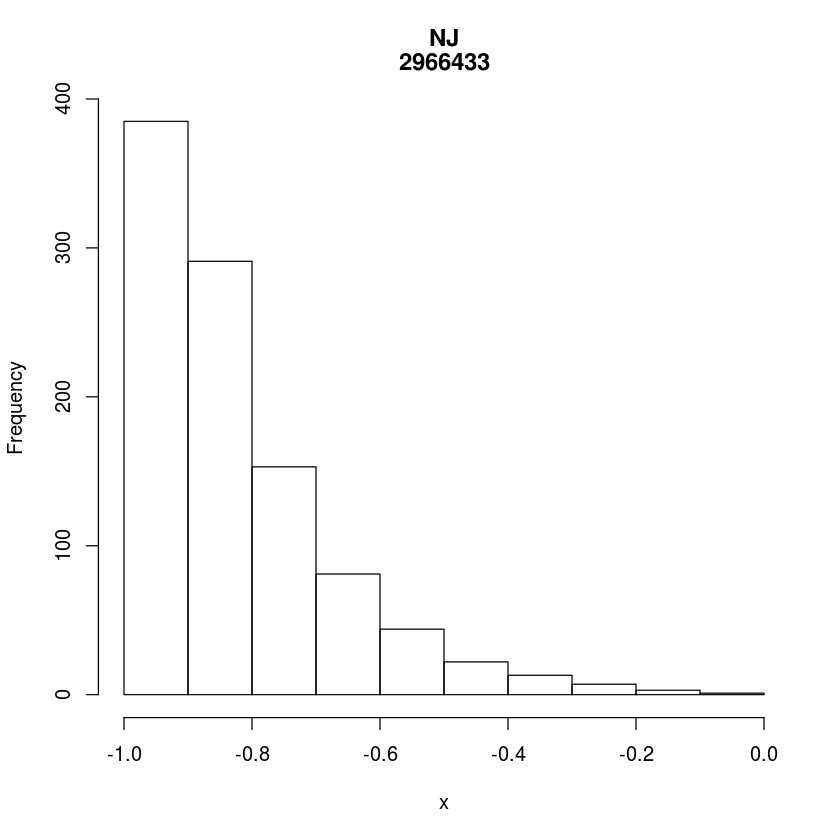

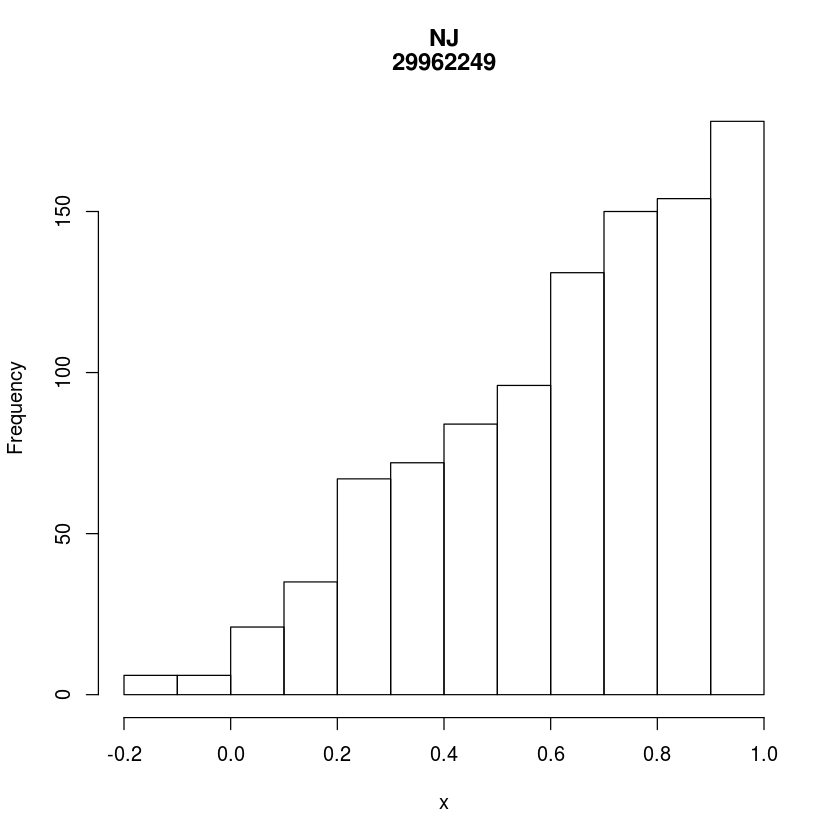

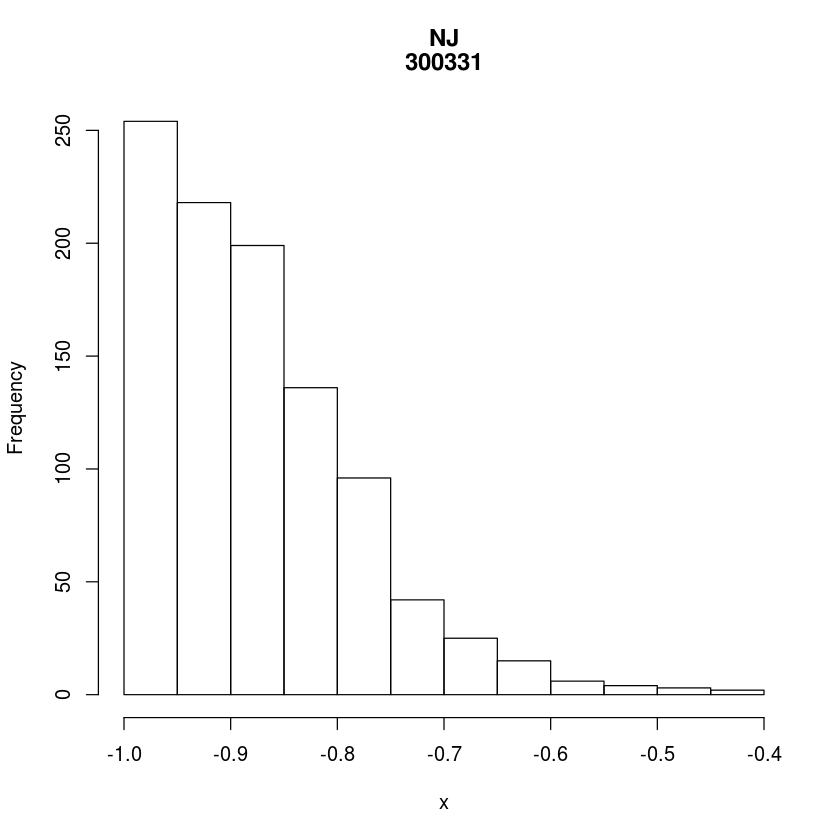

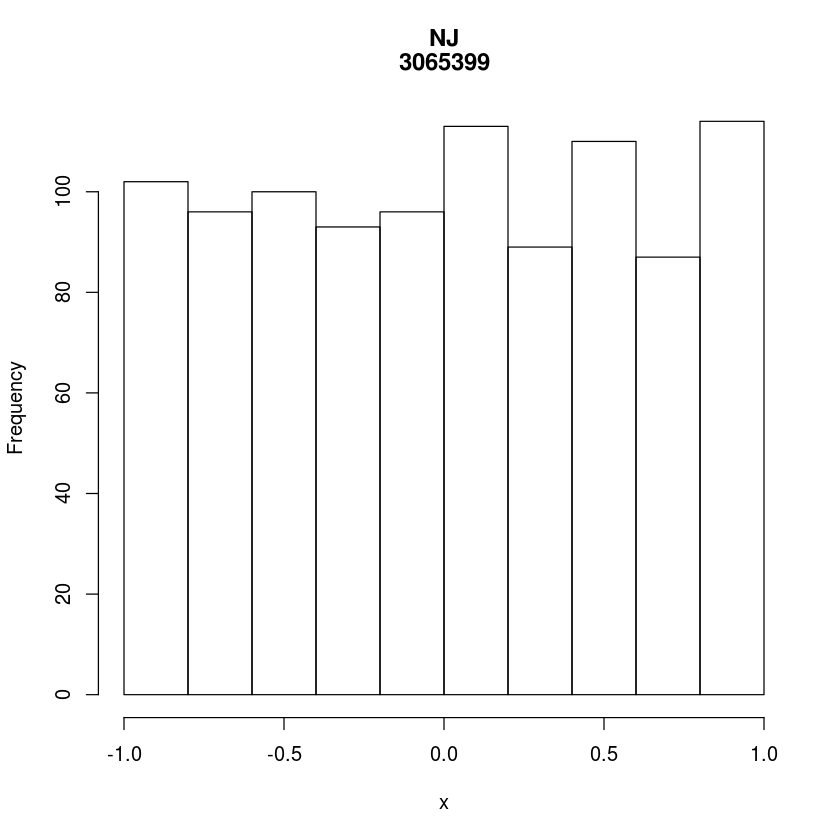

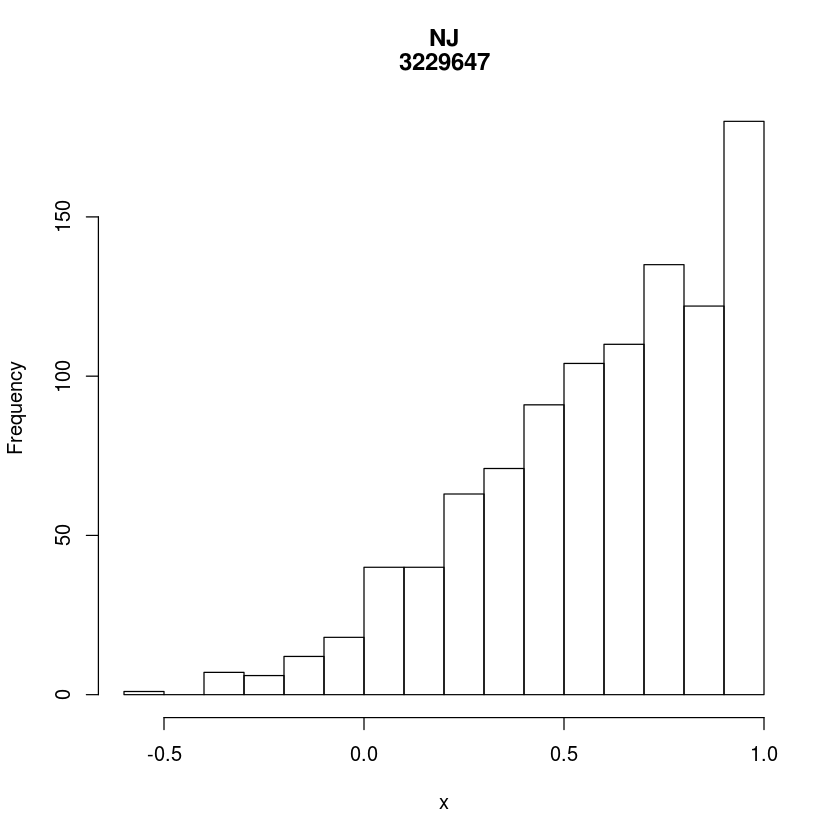

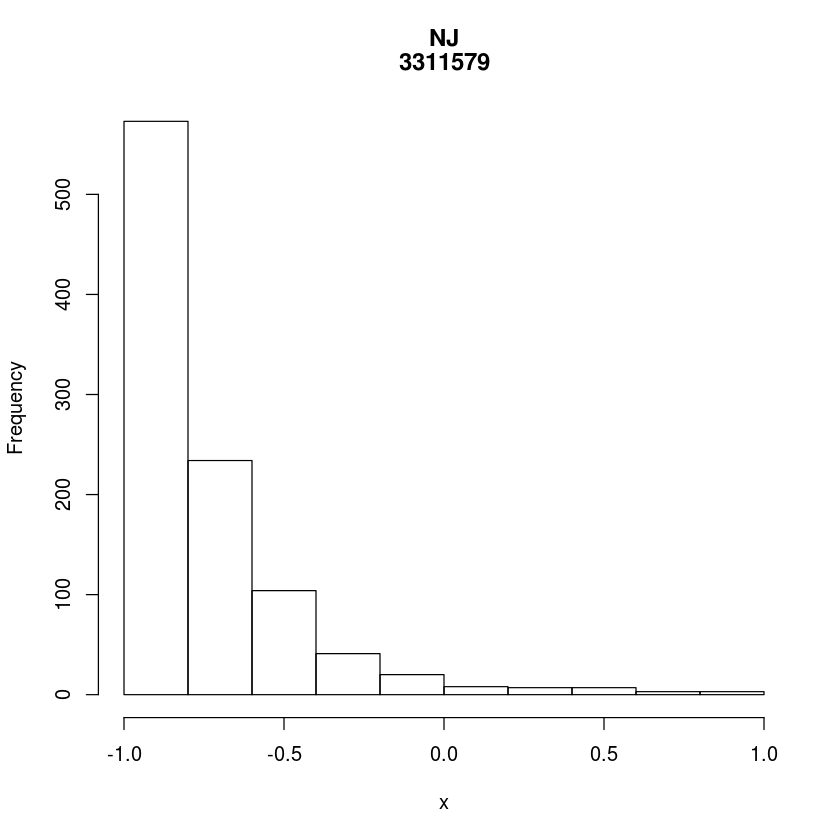

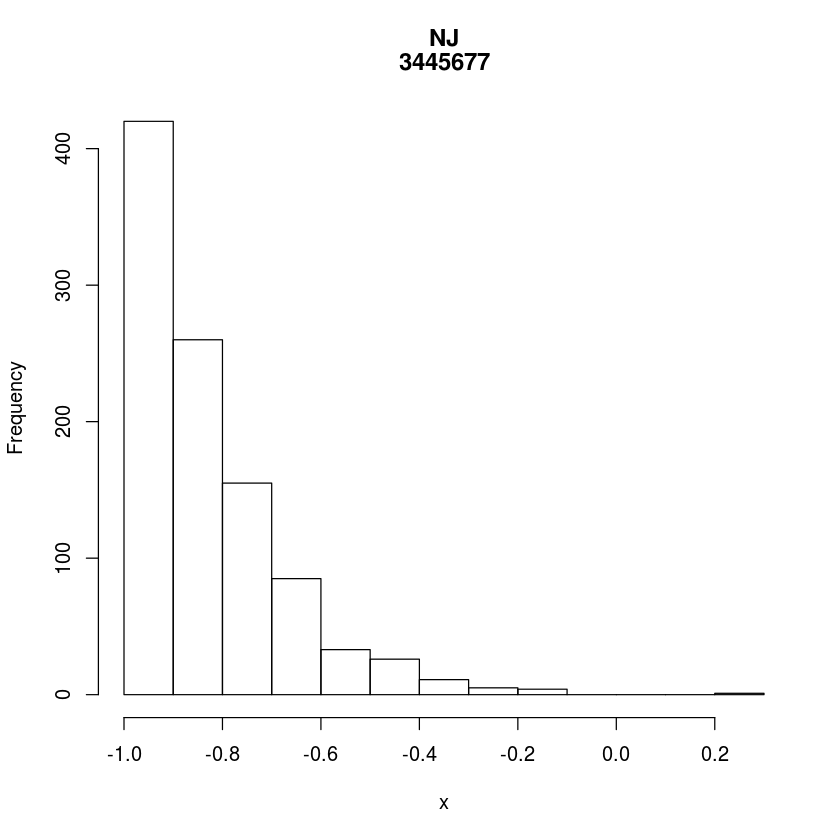

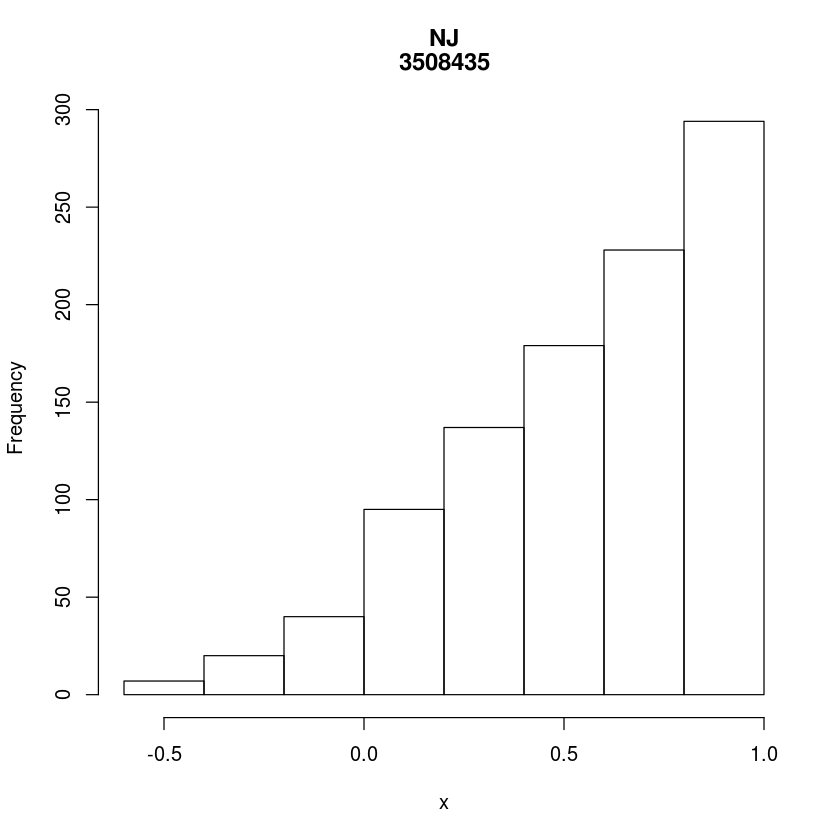

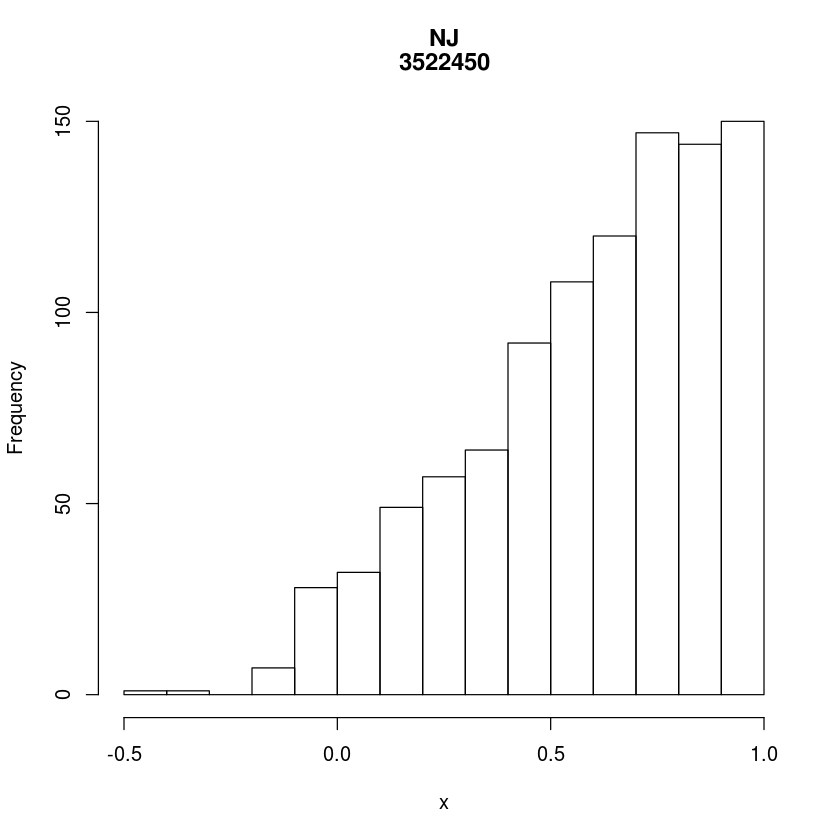

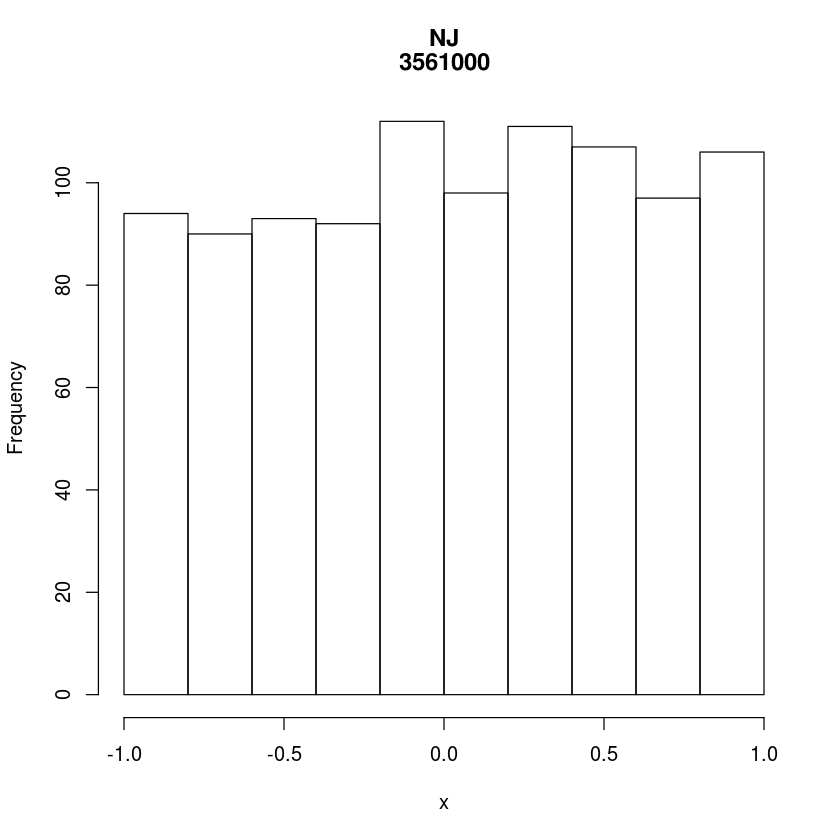

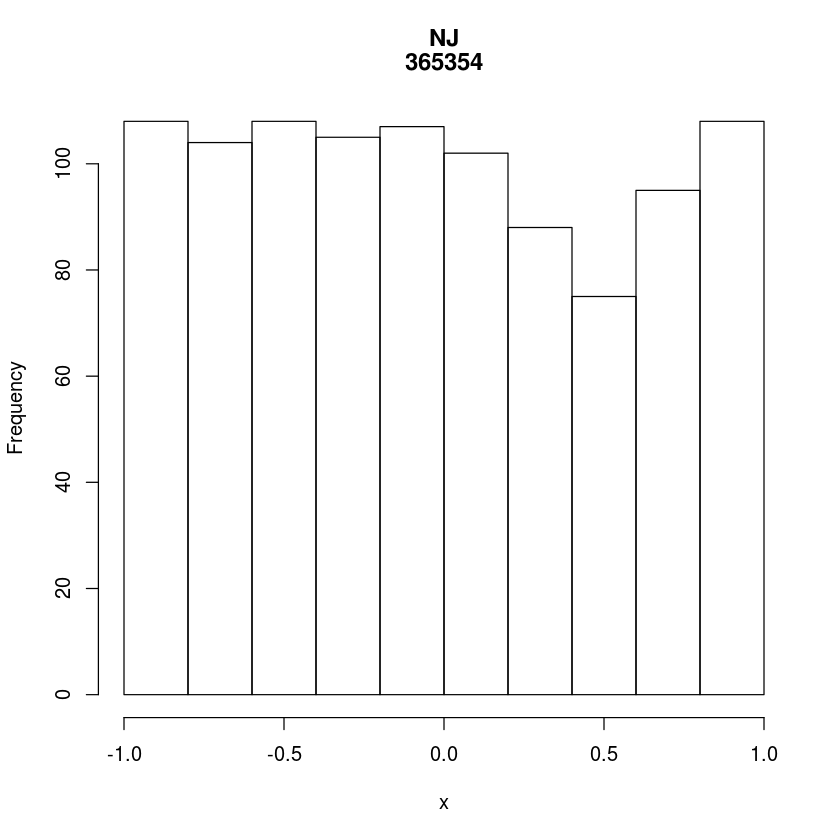

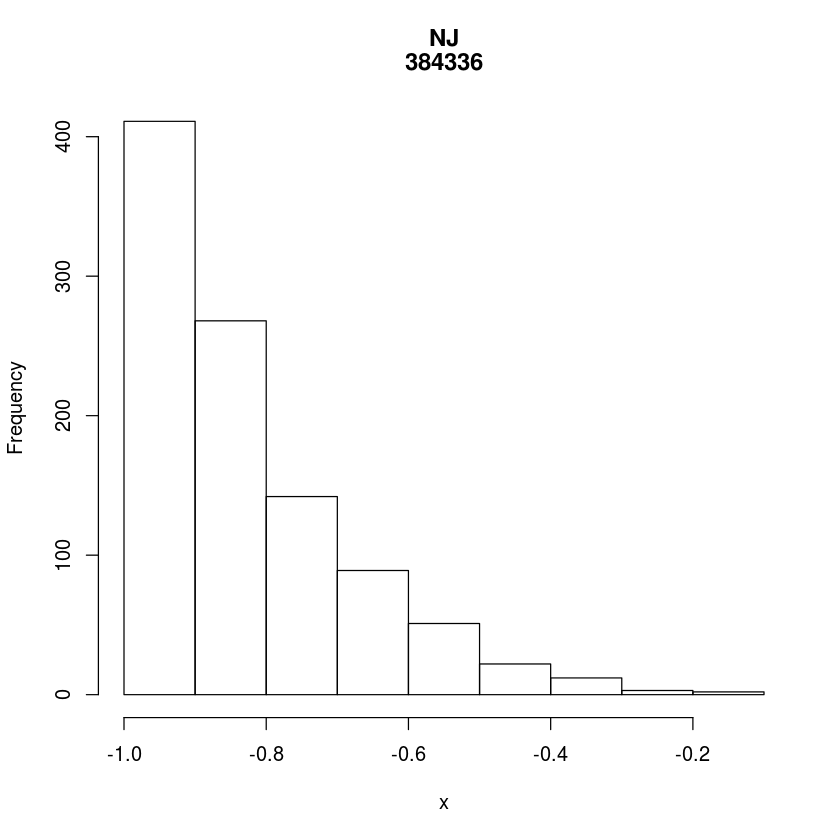

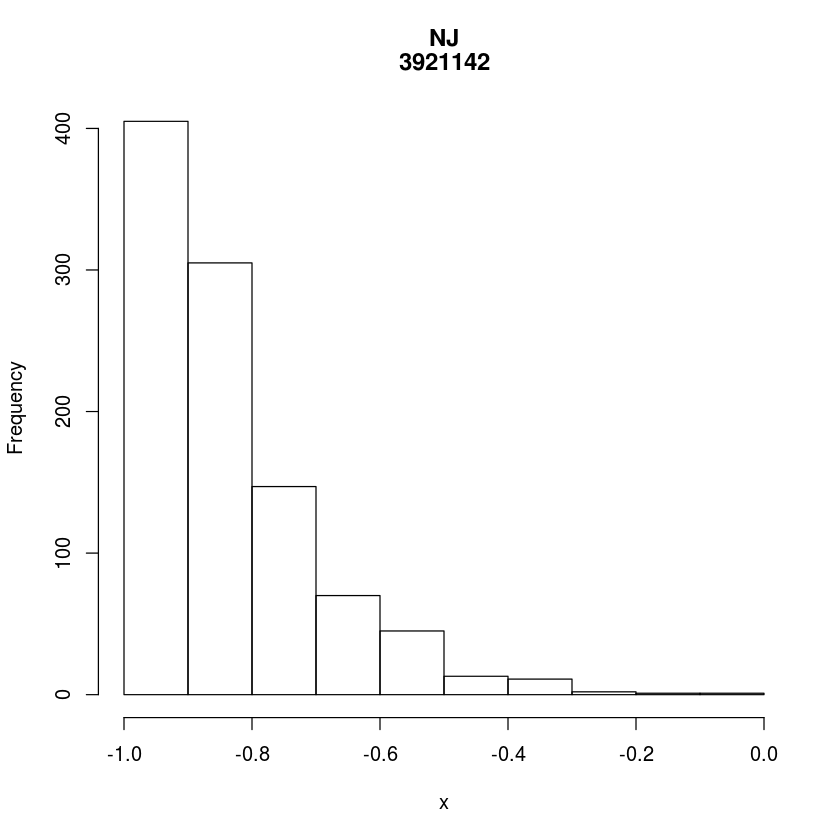

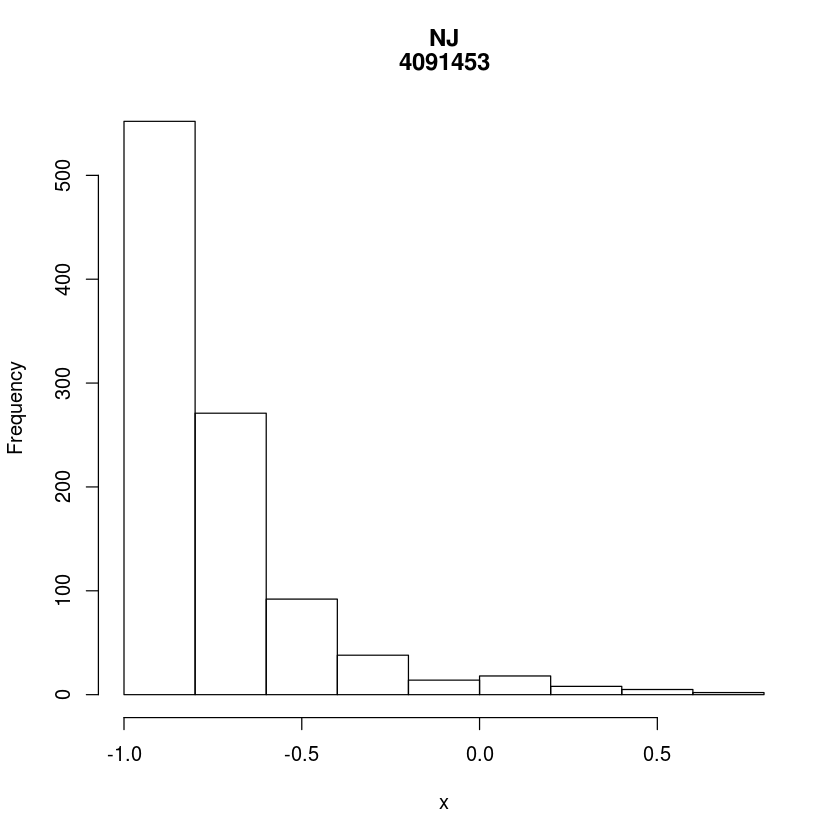

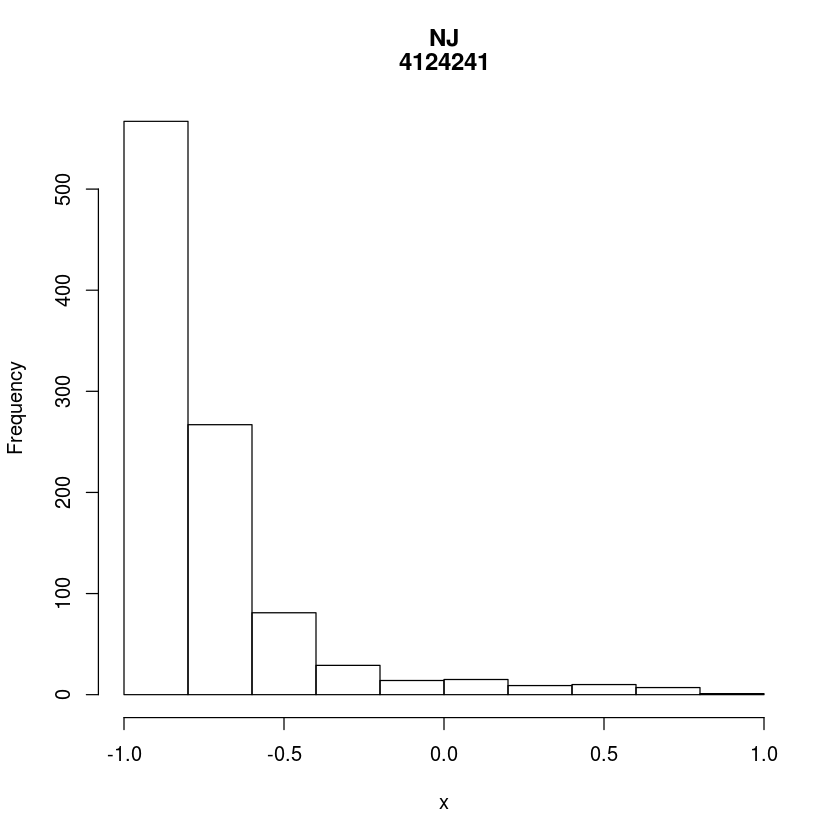

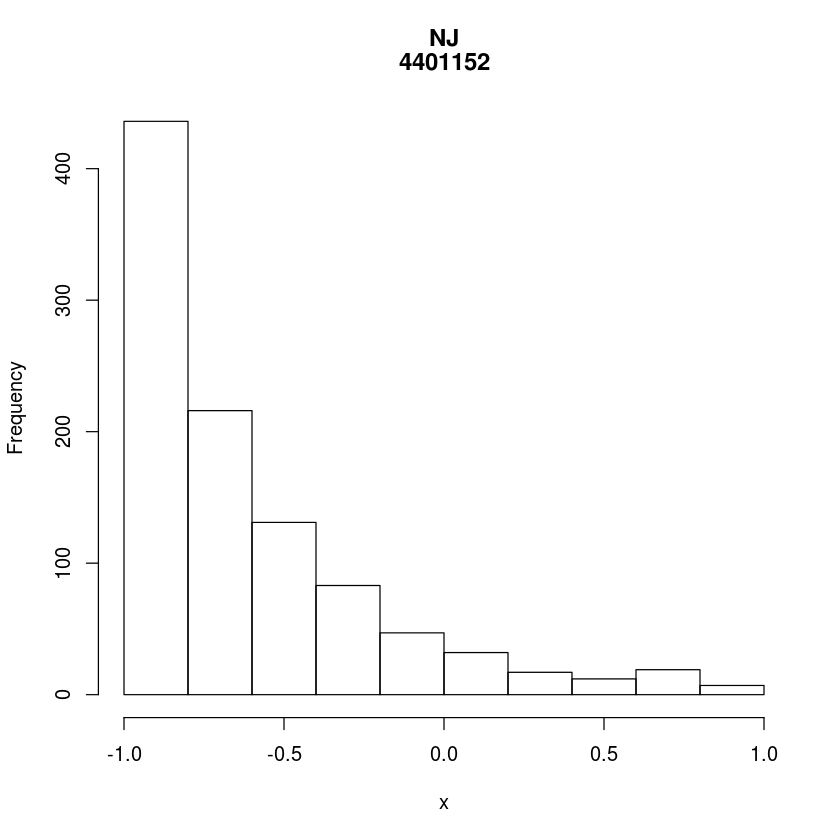

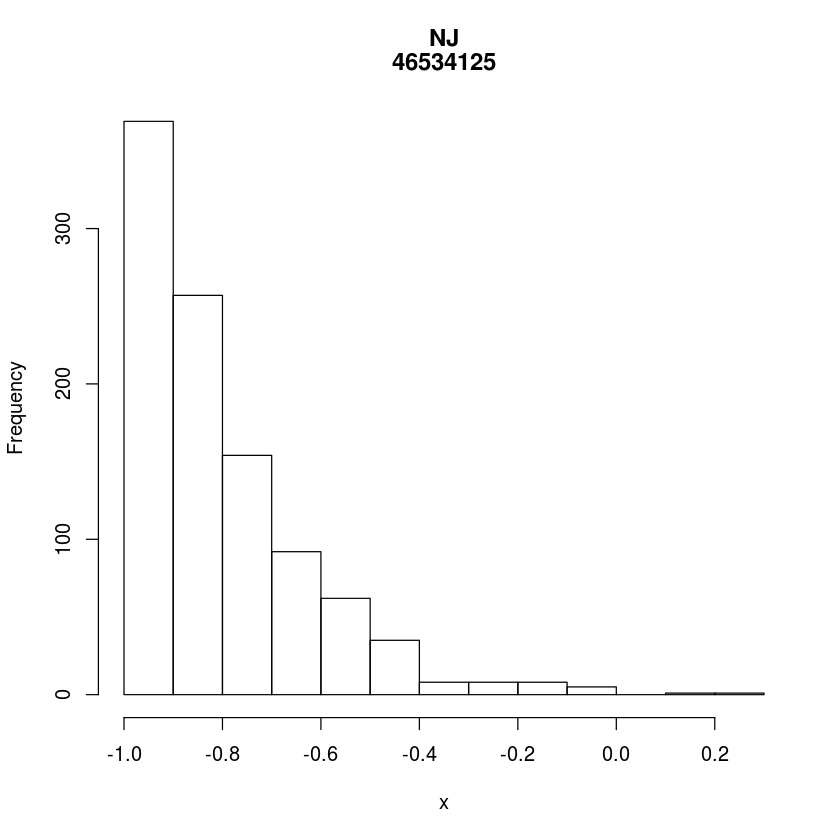

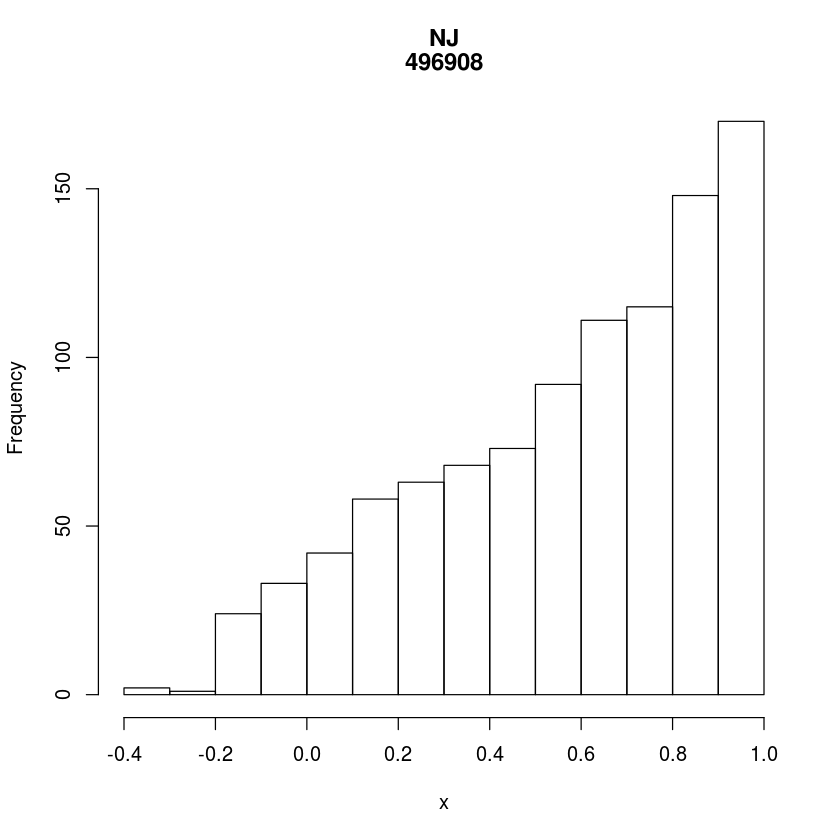

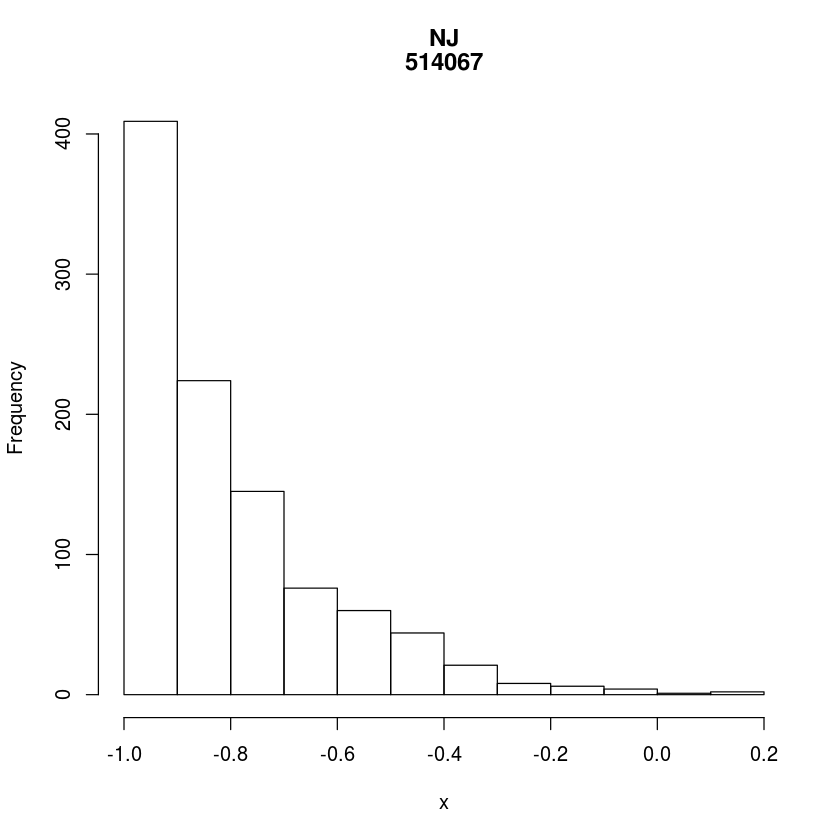

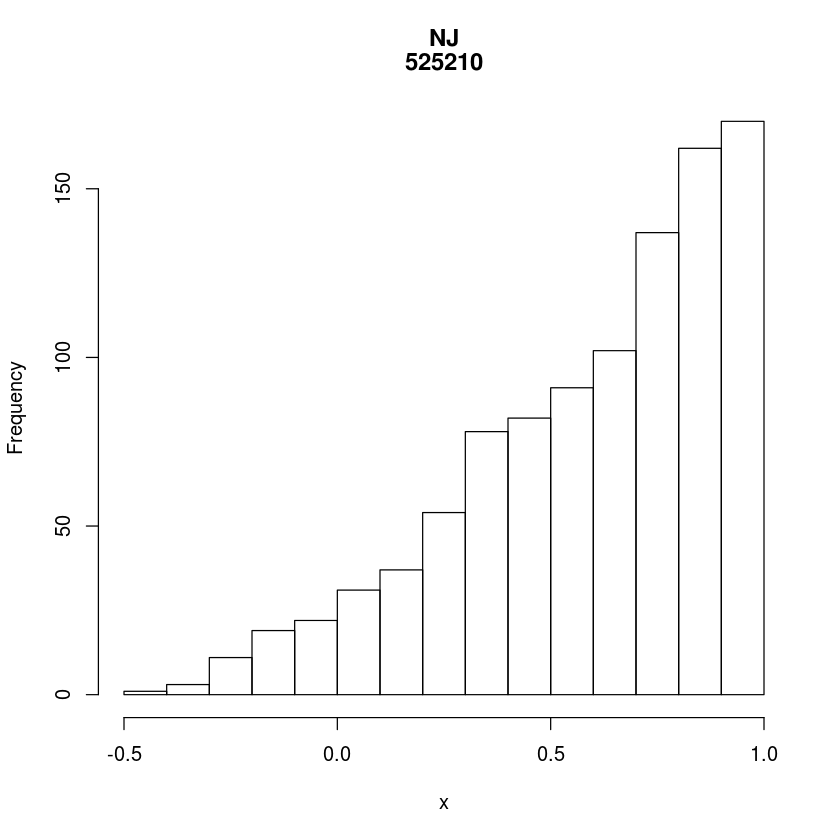

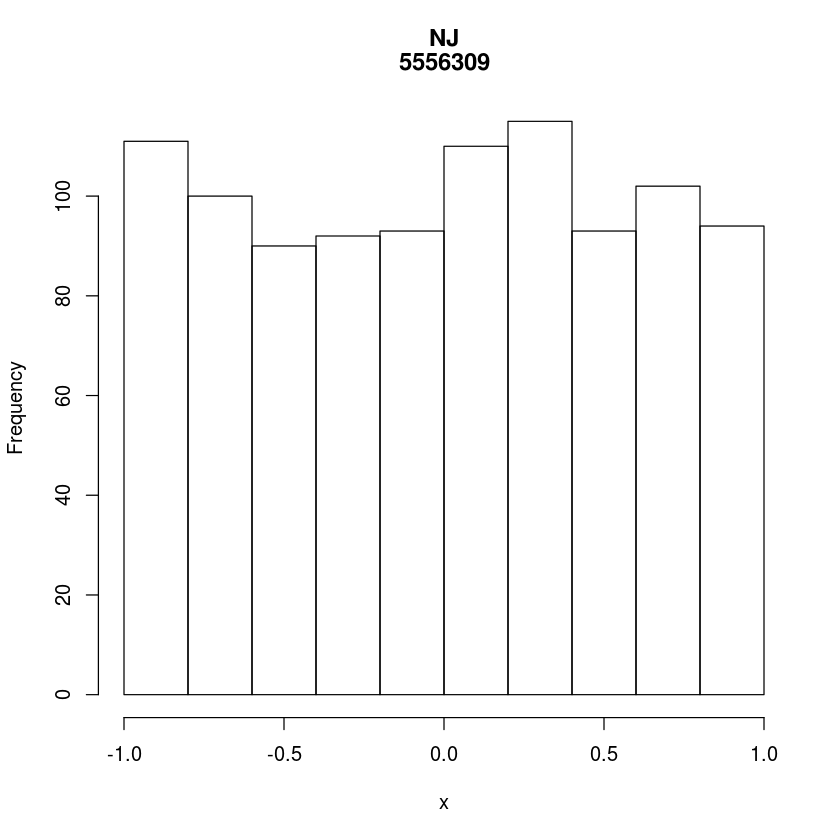

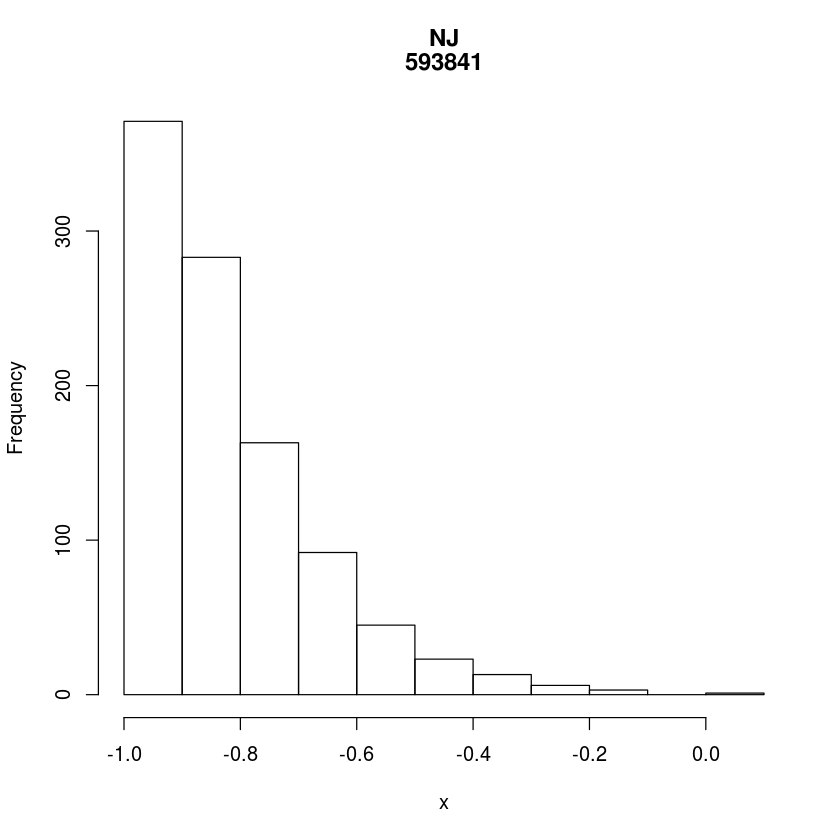

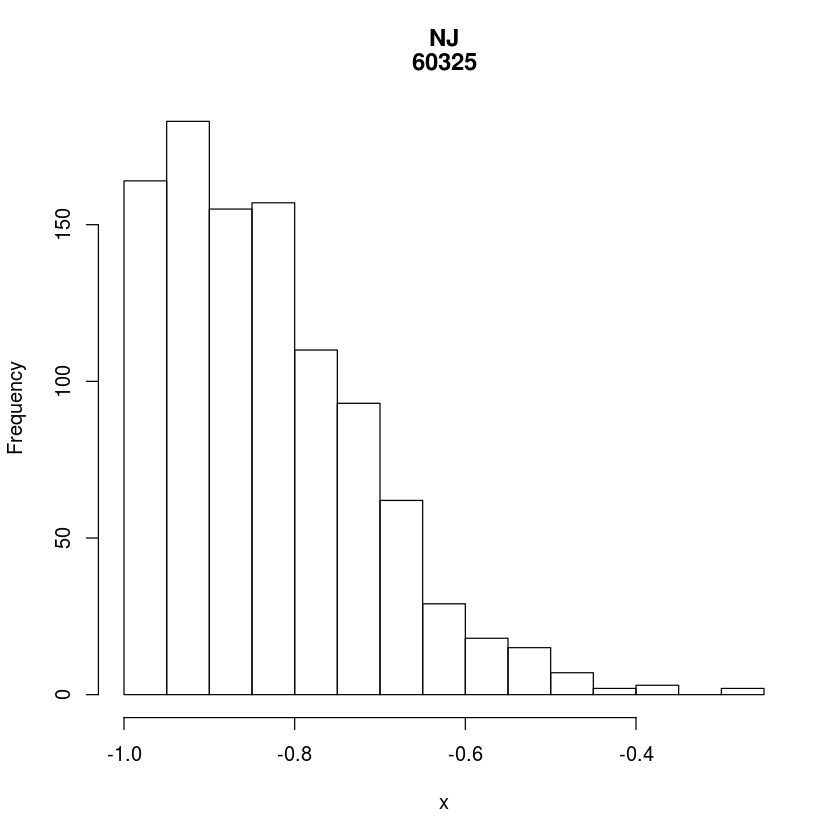

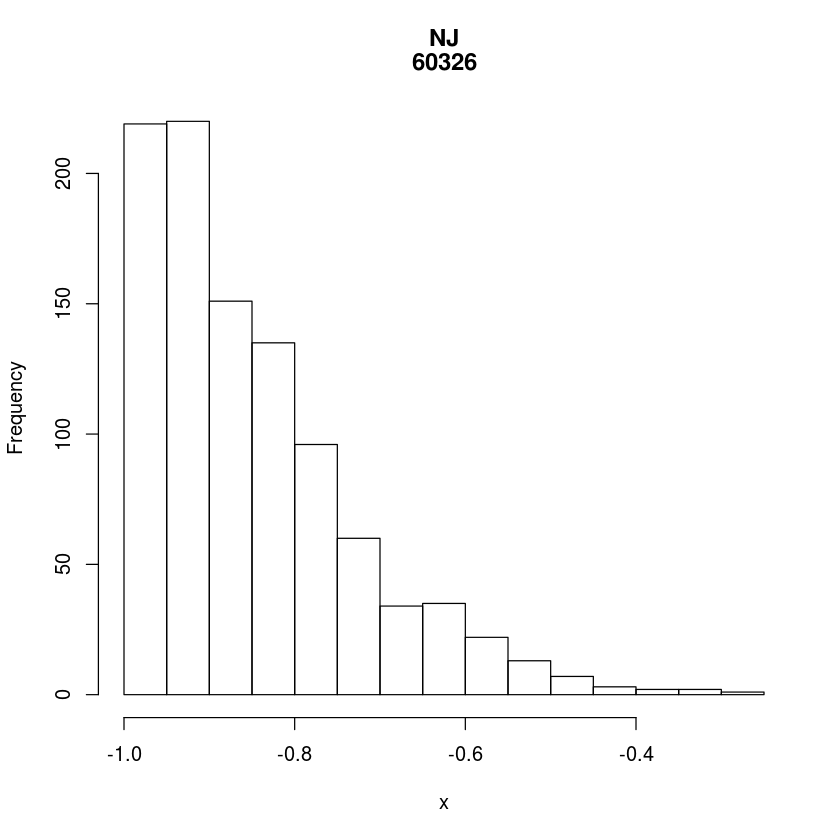

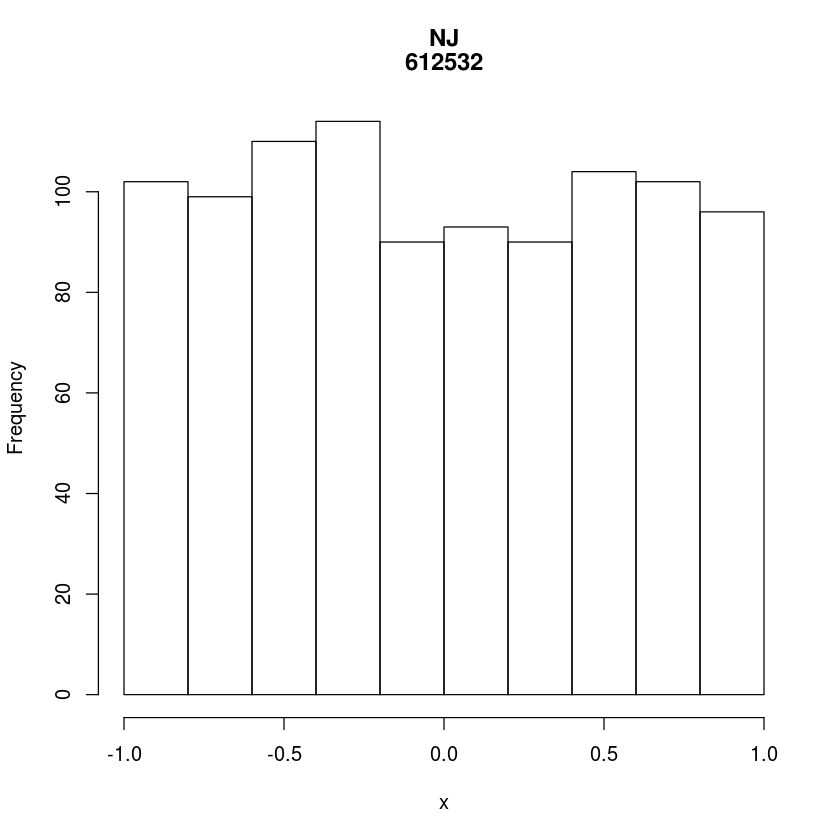

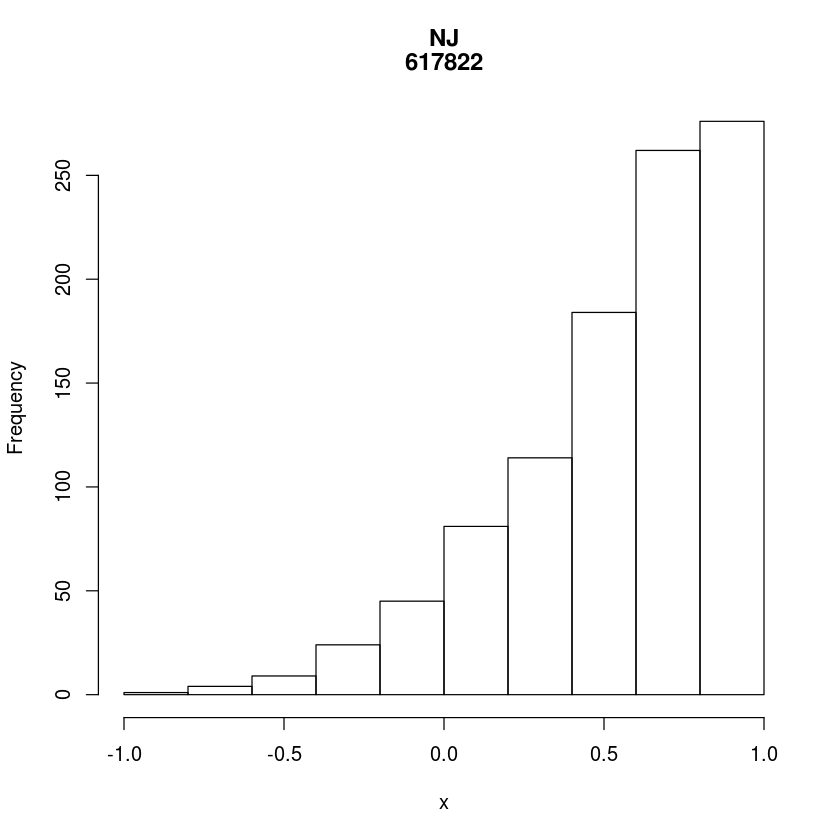

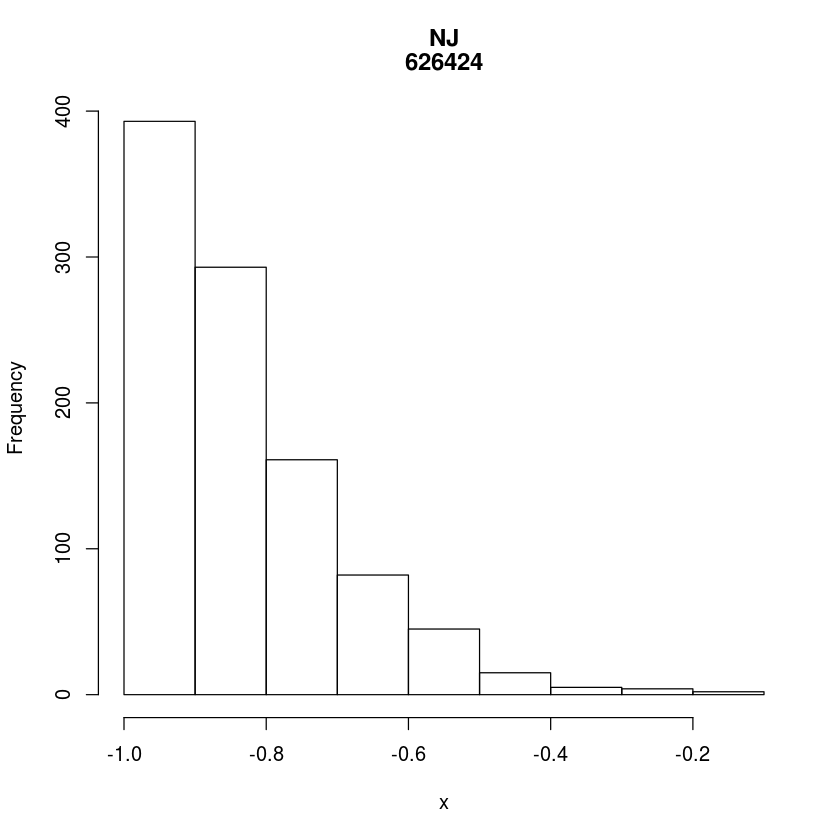

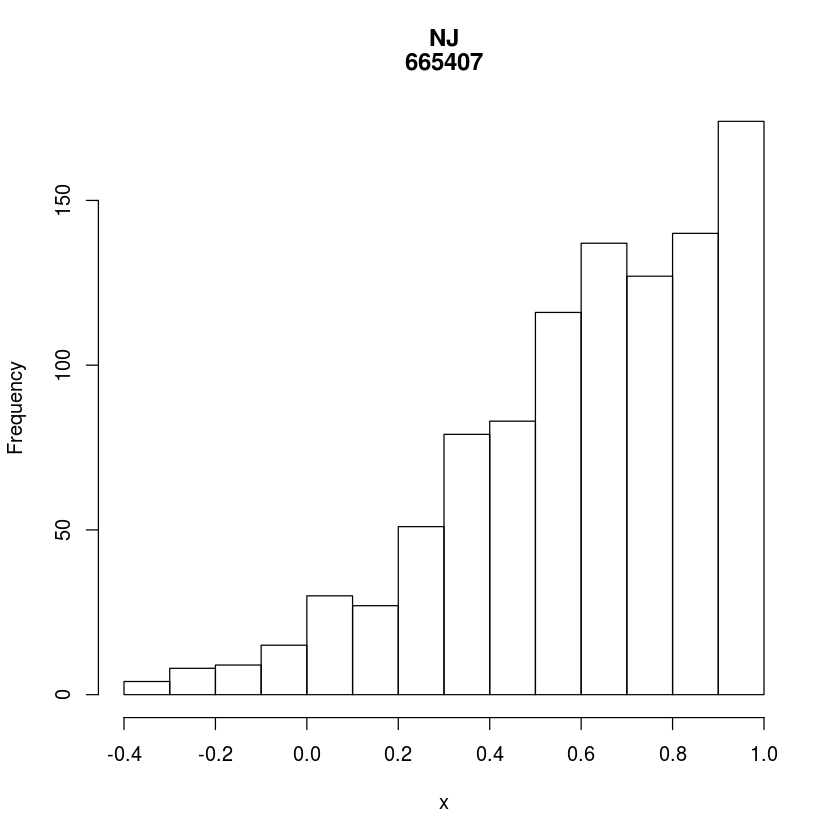

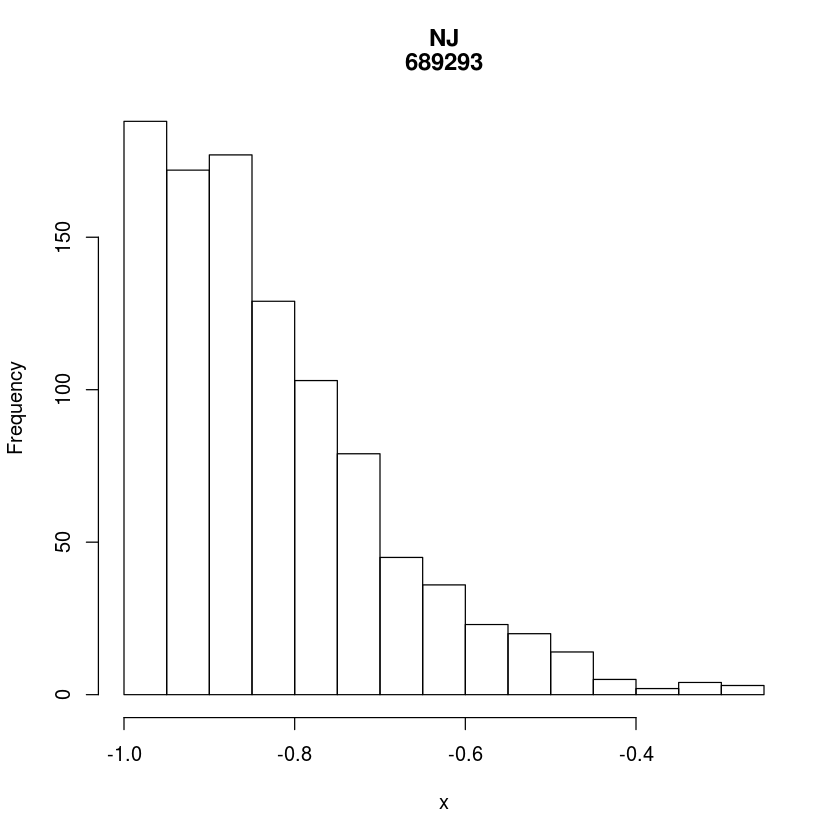

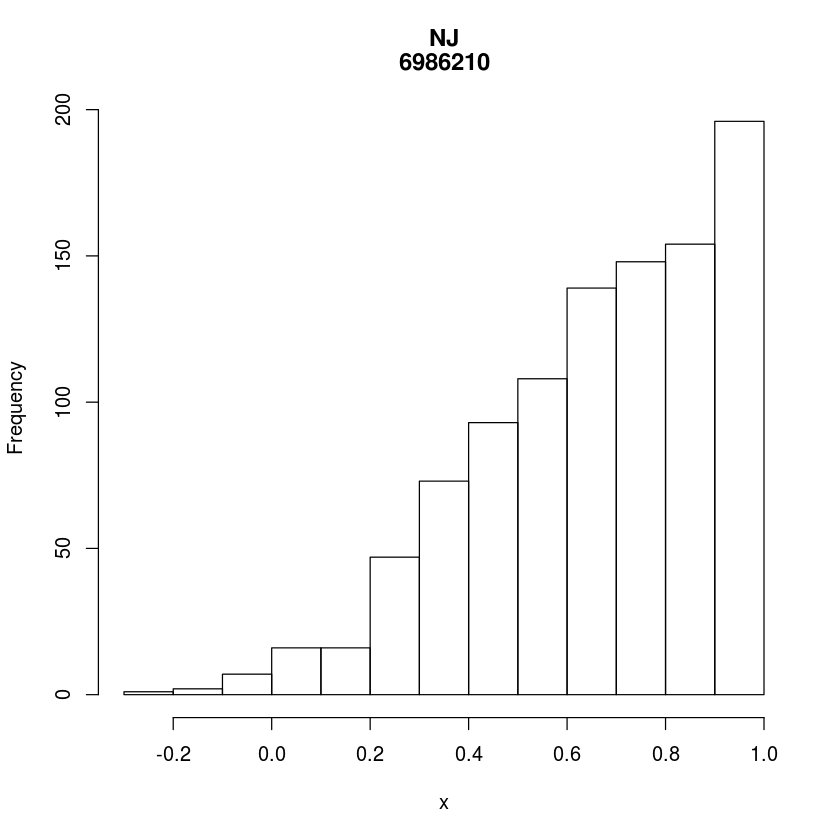

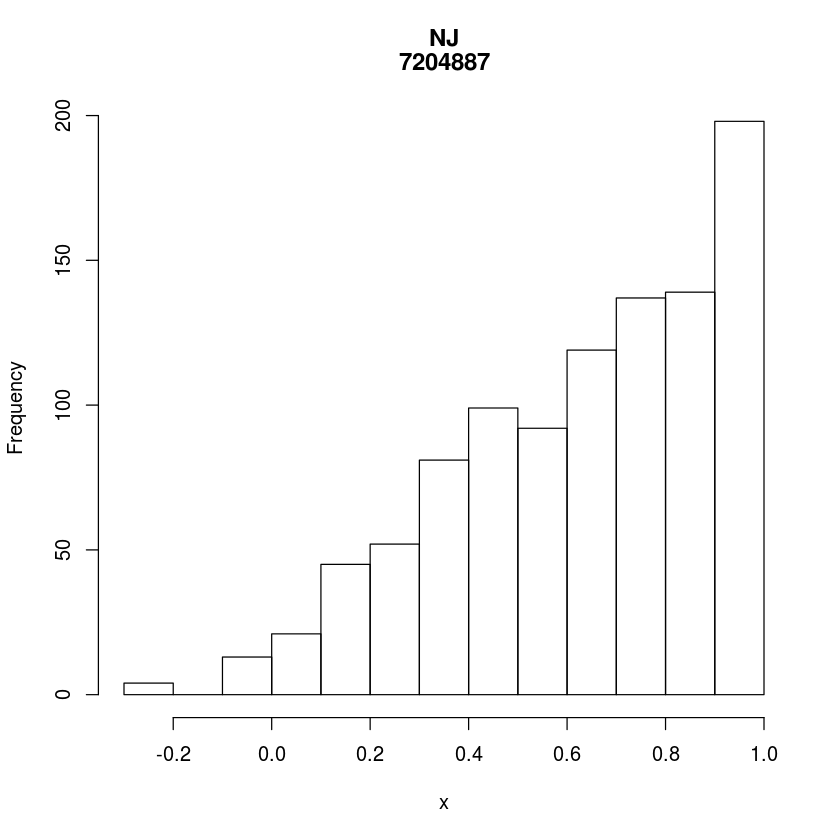

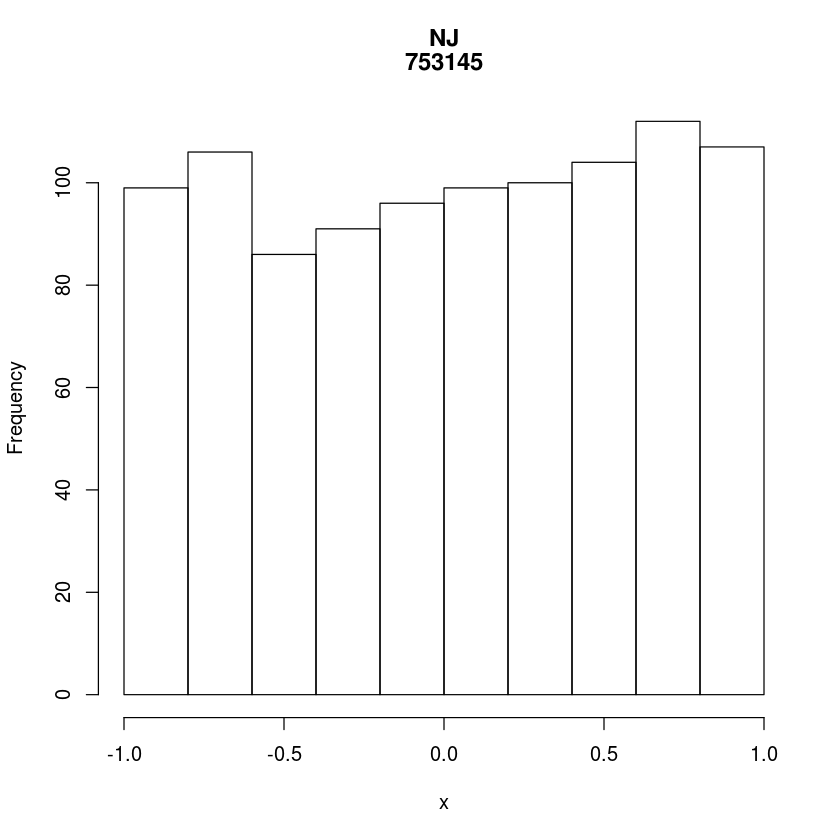

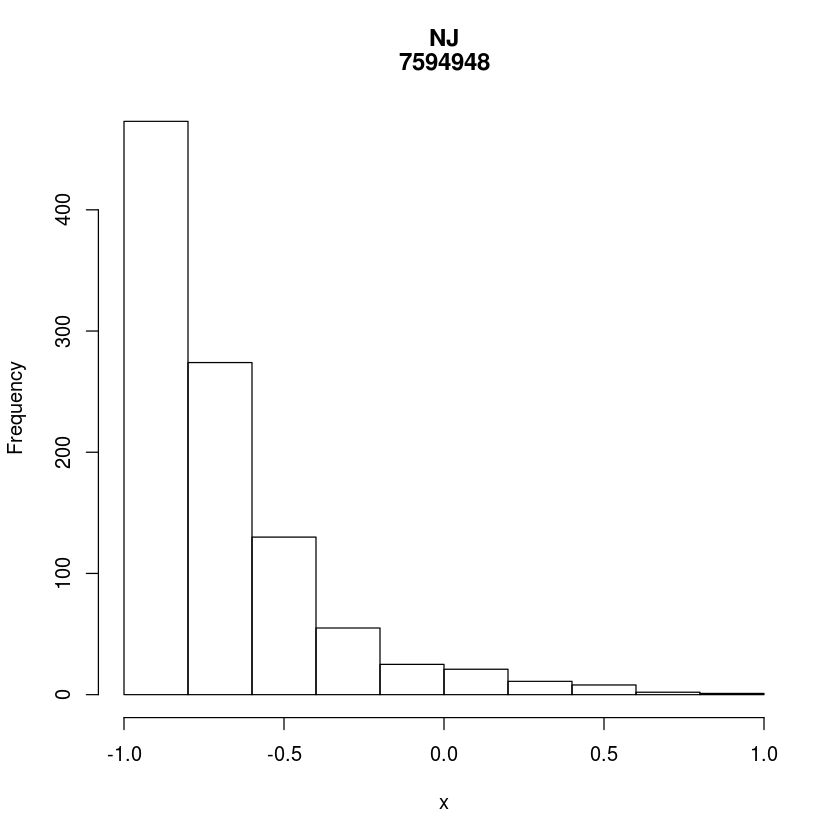

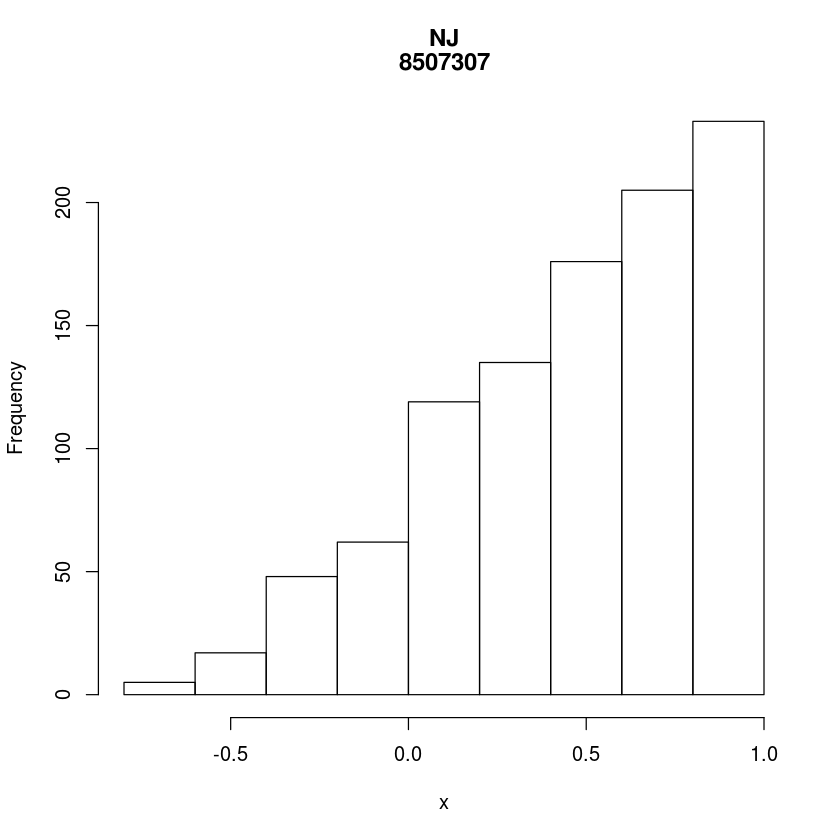

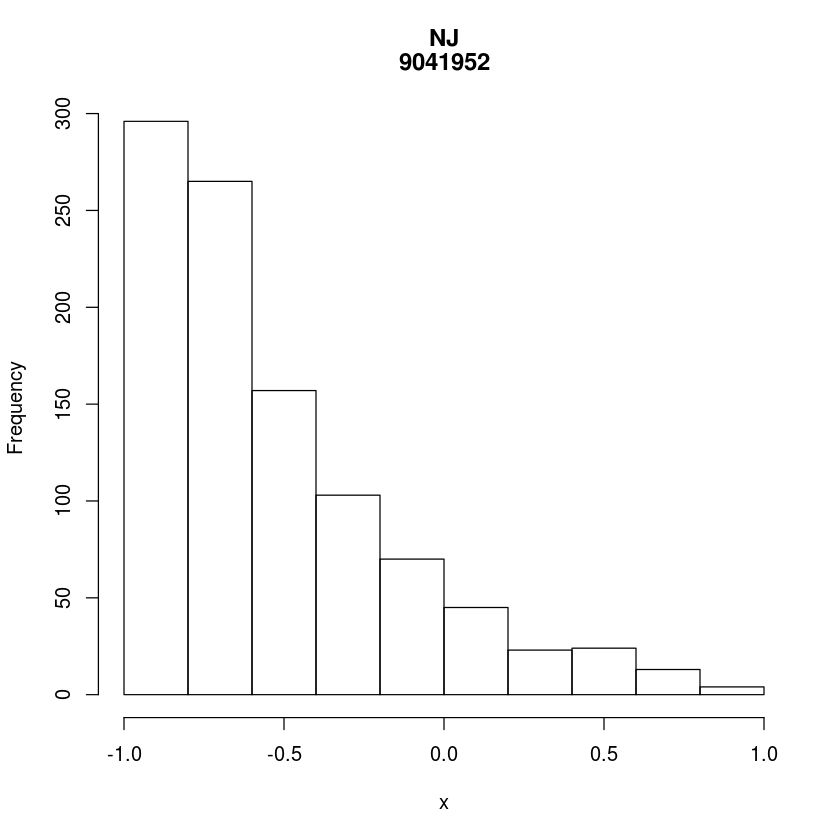

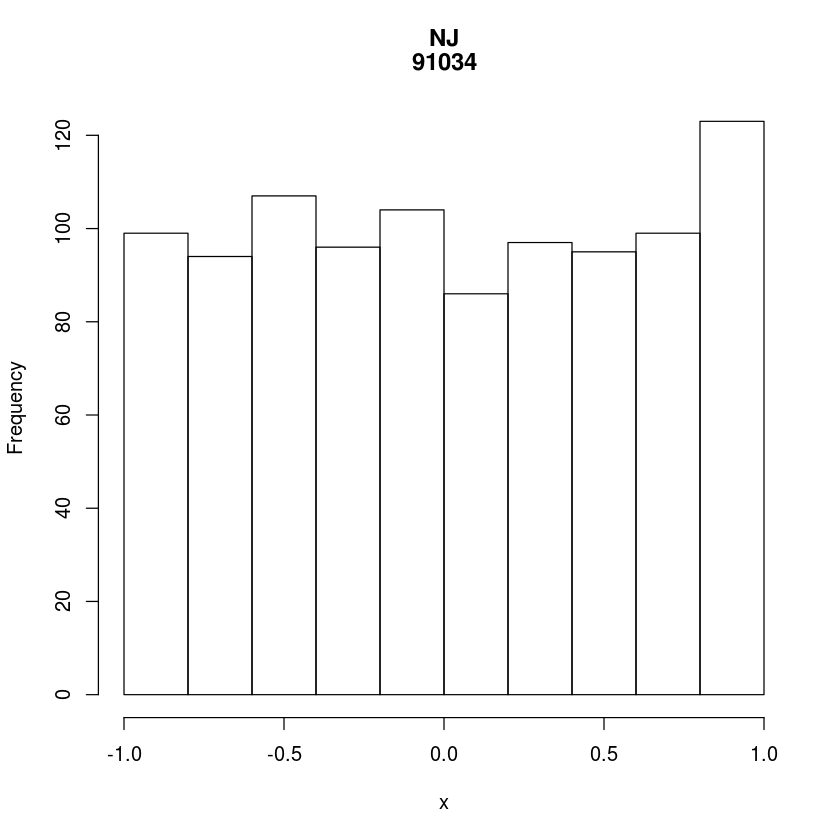

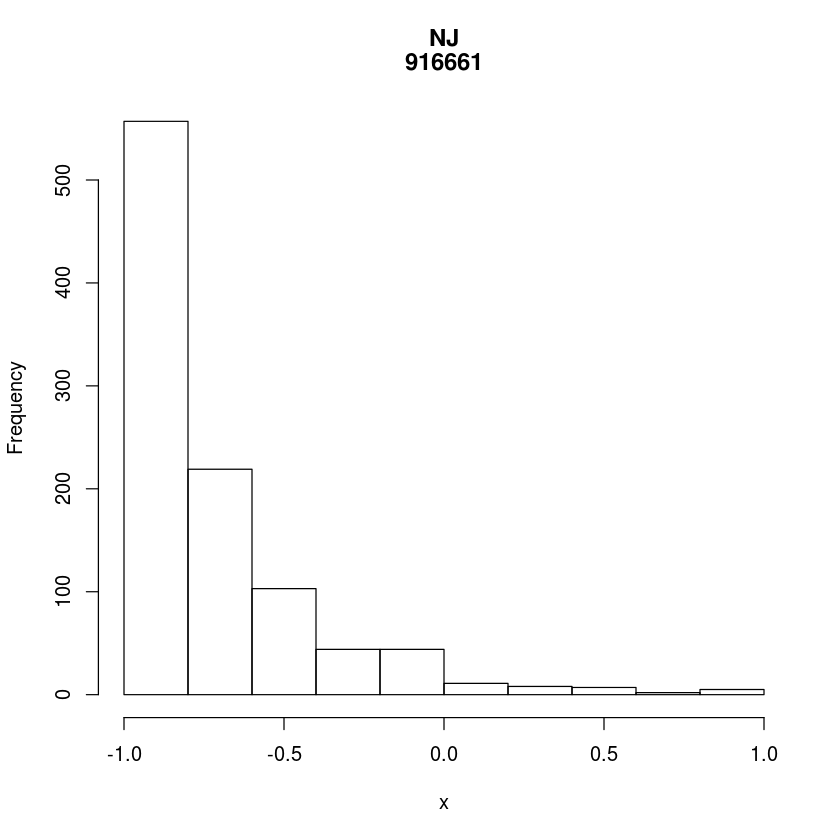

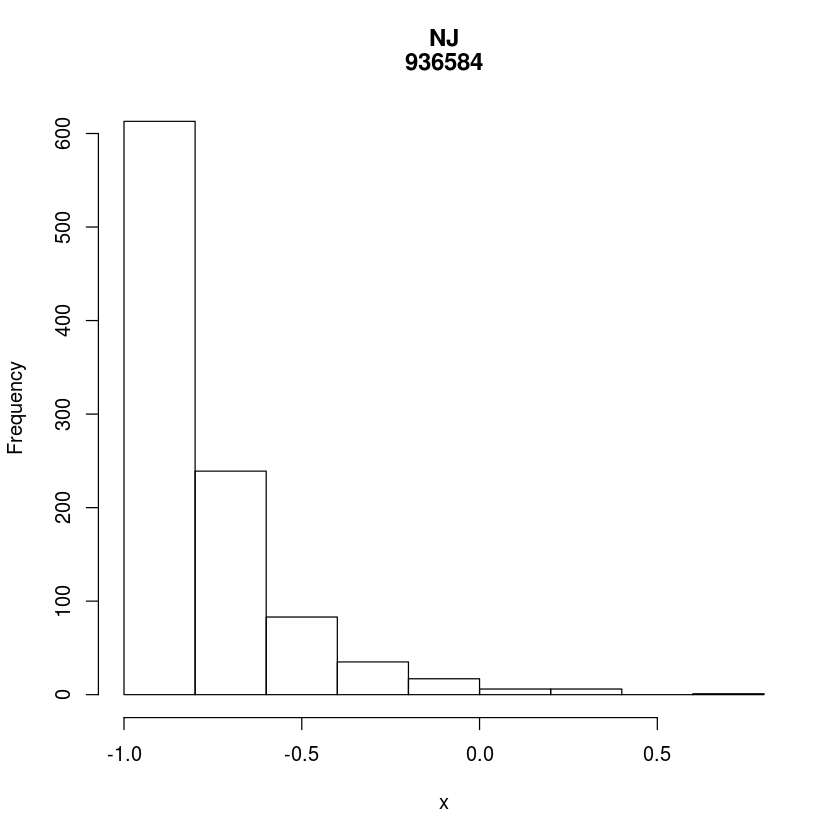

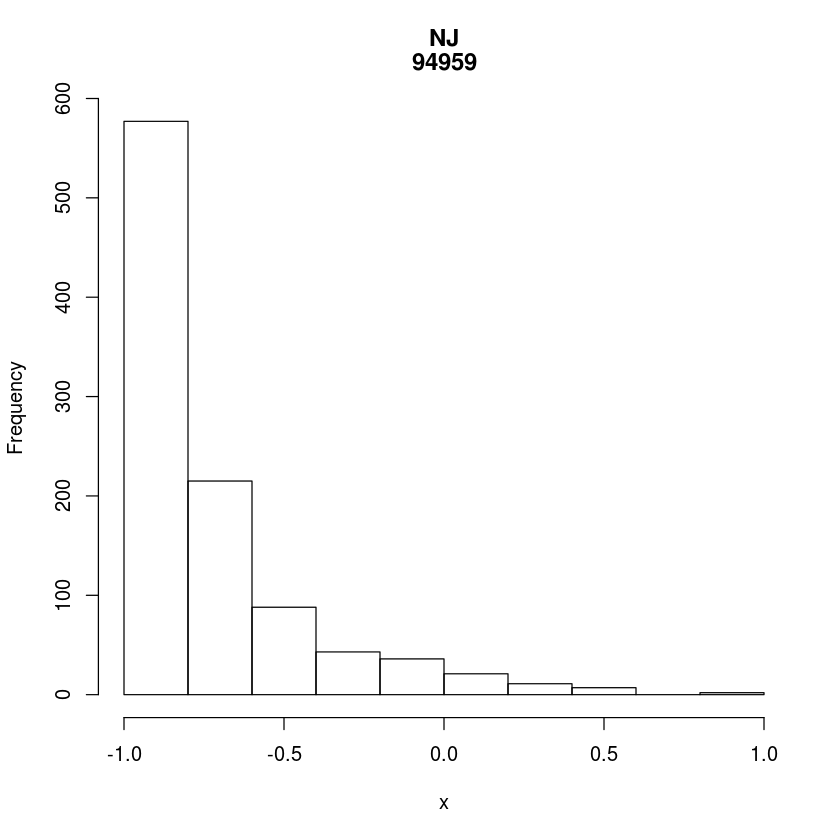

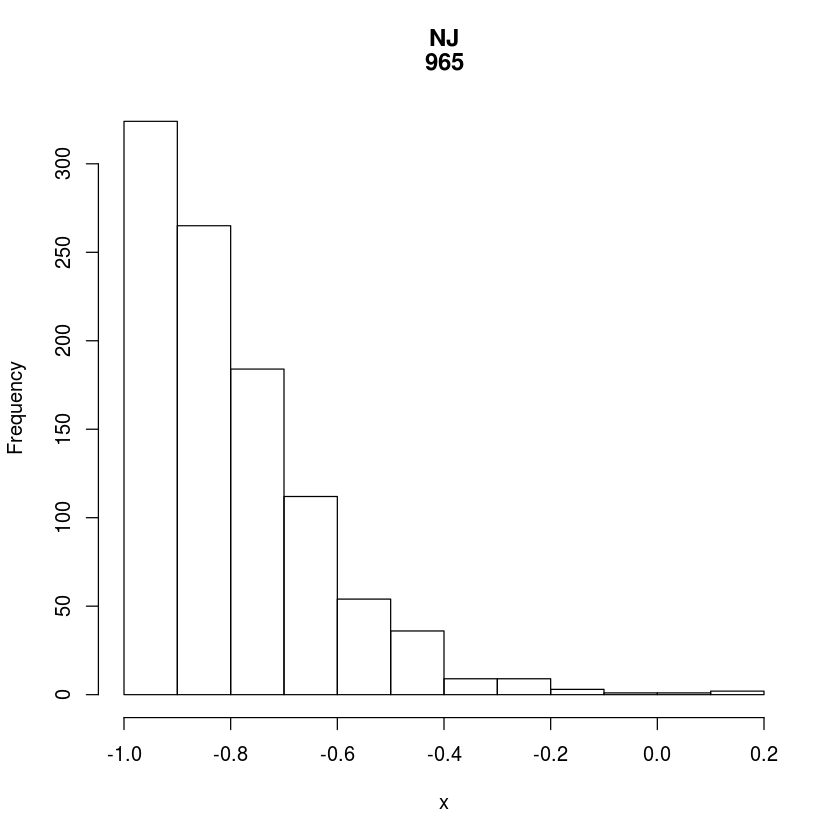

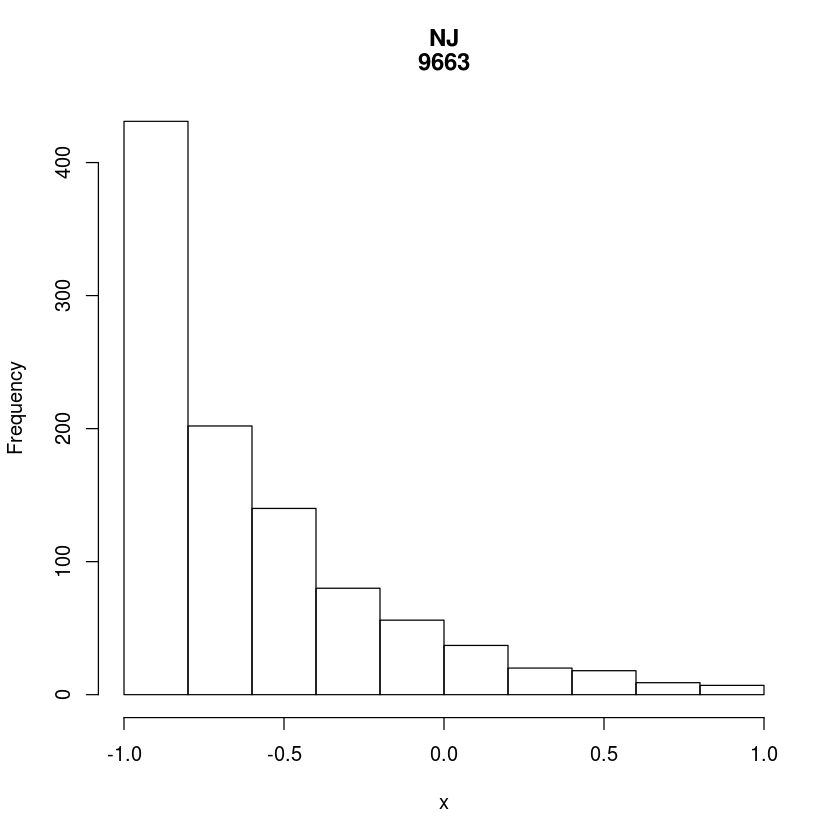

breaks,"-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8","-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0",⋯,"-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8"
counts,"100, 111, 98, 97, 104, 90, 113, 92, 94, 101","1, 2, 6, 16, 31, 38, 44, 60, 70, 81, 100, 135, 127, 148, 141","435, 275, 138, 87, 42, 13, 6, 4","321, 241, 170, 100, 69, 43, 15, 8, 7, 6, 7, 5, 4, 2, 2","646, 230, 81, 28, 10, 2, 1, 1, 1","2, 15, 13, 31, 42, 48, 55, 77, 83, 103, 126, 118, 143, 144","394, 249, 149, 101, 43, 34, 9, 11, 5, 3, 2","424, 288, 166, 71, 26, 13, 6, 5, 0, 0, 1","404, 246, 139, 76, 47, 28, 28, 16, 5, 4, 2, 2, 0, 3","585, 234, 103, 36, 20, 12, 7, 0, 2, 1",⋯,"473, 274, 130, 55, 25, 21, 11, 8, 2, 1","5, 17, 48, 62, 119, 135, 176, 205, 233","296, 265, 157, 103, 70, 45, 23, 24, 13, 4","99, 94, 107, 96, 104, 86, 97, 95, 99, 123","557, 219, 103, 44, 44, 11, 8, 7, 2, 5","613, 239, 83, 35, 17, 6, 6, 0, 1","577, 215, 88, 43, 36, 21, 11, 7, 0, 2","324, 265, 184, 112, 54, 36, 9, 9, 3, 1, 1, 2","431, 202, 140, 80, 56, 37, 20, 18, 9, 7","480, 236, 145, 66, 39, 18, 8, 4, 4"
density,"0.500, 0.555, 0.490, 0.485, 0.520, 0.450, 0.565, 0.460, 0.470, 0.505","0.01, 0.02, 0.06, 0.16, 0.31, 0.38, 0.44, 0.60, 0.70, 0.81, 1.00, 1.35, 1.27, 1.48, 1.41","4.35, 2.75, 1.38, 0.87, 0.42, 0.13, 0.06, 0.04","3.21, 2.41, 1.70, 1.00, 0.69, 0.43, 0.15, 0.08, 0.07, 0.06, 0.07, 0.05, 0.04, 0.02, 0.02","3.230, 1.150, 0.405, 0.140, 0.050, 0.010, 0.005, 0.005, 0.005","0.02, 0.15, 0.13, 0.31, 0.42, 0.48, 0.55, 0.77, 0.83, 1.03, 1.26, 1.18, 1.43, 1.44","3.94, 2.49, 1.49, 1.01, 0.43, 0.34, 0.09, 0.11, 0.05, 0.03, 0.02","4.24, 2.88, 1.66, 0.71, 0.26, 0.13, 0.06, 0.05, 0.00, 0.00, 0.01","4.04, 2.46, 1.39, 0.76, 0.47, 0.28, 0.28, 0.16, 0.05, 0.04, 0.02, 0.02, 0.00, 0.03","2.925, 1.170, 0.515, 0.180, 0.100, 0.060, 0.035, 0.000, 0.010, 0.005",⋯,"2.365, 1.370, 0.650, 0.275, 0.125, 0.105, 0.055, 0.040, 0.010, 0.005","0.025, 0.085, 0.240, 0.310, 0.595, 0.675, 0.880, 1.025, 1.165","1.480, 1.325, 0.785, 0.515, 0.350, 0.225, 0.115, 0.120, 0.065, 0.020","0.495, 0.470, 0.535, 0.480, 0.520, 0.430, 0.485, 0.475, 0.495, 0.615","2.785, 1.095, 0.515, 0.220, 0.220, 0.055, 0.040, 0.035, 0.010, 0.025","3.065, 1.195, 0.415, 0.175, 0.085, 0.030, 0.030, 0.000, 0.005","2.885, 1.075, 0.440, 0.215, 0.180, 0.105, 0.055, 0.035, 0.000, 0.010","3.24, 2.65, 1.84, 1.12, 0.54, 0.36, 0.09, 0.09, 0.03, 0.01, 0.01, 0.02","2.155, 1.010, 0.700, 0.400, 0.280, 0.185, 0.100, 0.090, 0.045, 0.035","2.400, 1.180, 0.725, 0.330, 0.195, 0.090, 0.040, 0.020, 0.020"
mids,"-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9","-0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95","-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25","-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45","-0.9, -0

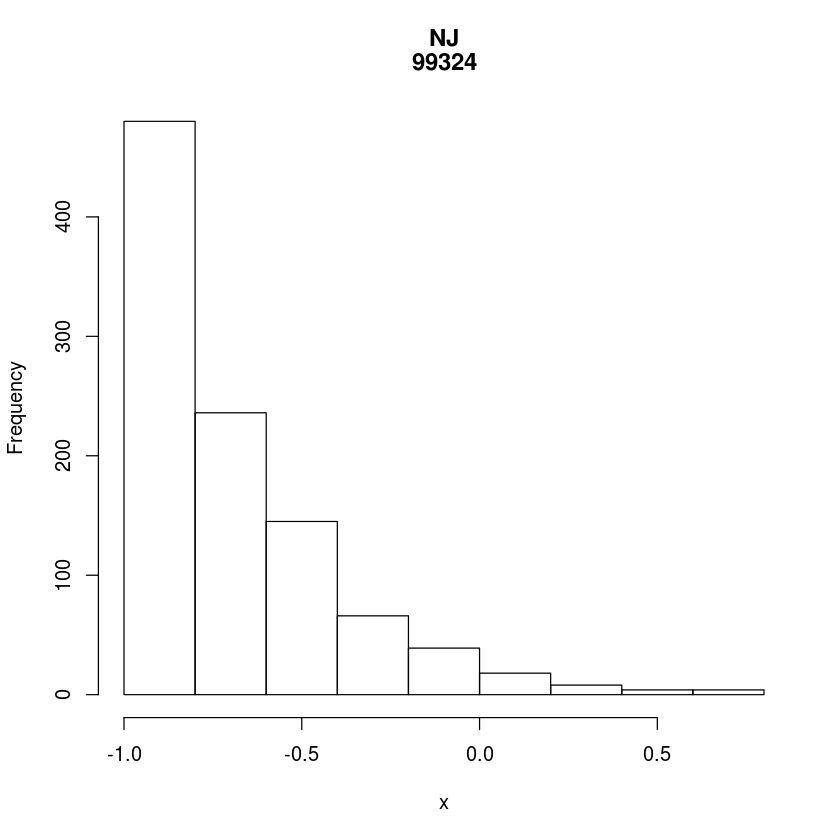

In [18]:
mapply(function(x, y) {
hist(x, main=c("NJ", y[1,3]))}, sNJ, NJ_f2scount)